In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/nicol/OneDrive/Escritorio/Proyectos/Proyecto 2/superstore_2016.xlsx")

In [3]:
df.shape

(51290, 24)

In [4]:
df.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'], dtype=object)

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [7]:
# Identificamos tipos de variables

cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
date_cols = df.select_dtypes(include='datetime').columns

print("Columnas categóricas:", len(cat_cols), "\n", cat_cols.tolist())
print("Columnas numéricas:", len(num_cols), "\n", num_cols.tolist())
print("Columnas de fecha:", len(date_cols), "\n", date_cols.tolist())

Columnas categóricas: 15 
 ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Order Priority']
Columnas numéricas: 7 
 ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
Columnas de fecha: 2 
 ['Order Date', 'Ship Date']


In [8]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25728,4,17415,796,3,3650,1102,165,23,5,3788,3,17,3788,4
top,CA-2015-SV20365140-42268,Standard Class,SV-203651406,Muhammed Yedwab,Consumer,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples,Medium
freq,14,30775,26,108,26518,915,2001,9994,5883,14302,227,31289,6146,227,29433


### El dataset contiene 51,290 registros y 24 columnas, combinando información de ventas, clientes, productos y tiempos de envío.

### Vemos que el dataset esta casi completo y casi no tiene valores nulos. Unicamente le faltan datos en la columna de "Postal Code" donde solo hay 9.994 datos de 51.290.

#### Vamos a analizar los valores de 'Postal Code' para ver como conviene solucionar la falta de datos.

In [9]:
df['Postal Code'].isnull().sum()

41296

In [10]:
df['Postal Code'].unique()

array([73120.,    nan, 98103., 76017., 12180., 94122., 90004., 10035.,
       39503., 94109., 19134., 28540., 78745., 94110., 97756., 91104.,
       22204., 98105., 10009., 22980., 46142.,  3301., 98198., 19143.,
        2920., 10011., 90036., 89015., 19013., 37918., 30318., 92646.,
       43229., 65807., 22901., 92037., 75061., 60653., 48205., 77581.,
       42420., 46203., 97206., 85023., 77041., 61701., 97301., 85705.,
       77036., 40214., 60505., 75217., 98002., 10701., 11561., 75007.,
       75220., 74133., 90045., 37087., 43615., 90712., 62521., 80027.,
       98006., 59405.,  6824., 19120., 33319., 18018., 60623., 10024.,
       92804., 94513., 37211., 36116., 84604., 80501., 33614., 90049.,
       19140., 22153., 44105., 90278., 88220., 75023., 44052., 39212.,
       90008., 68104.,  1841., 84084., 46060., 60067., 75081.,  2038.,
       89115., 78664., 55407., 85204., 77095., 95207., 28205., 77070.,
       90032., 75051.,  2908., 91730., 45231., 39401., 48183.,  6450.,
      

In [11]:
print(df[df['Postal Code'].isnull()]['Country'].unique())

['Australia' 'Germany' 'Senegal' 'New Zealand' 'Afghanistan'
 'Saudi Arabia' 'Brazil' 'China' 'France' 'Italy' 'Tanzania' 'Poland'
 'United Kingdom' 'Mexico' 'El Salvador' 'Taiwan' 'India'
 'Dominican Republic' 'Democratic Republic of the Congo' 'Indonesia'
 'Uruguay' 'Iran' 'Mozambique' 'Bangladesh' 'Spain' 'Ukraine' 'Nicaragua'
 'Morocco' 'Philippines' 'Austria' 'Colombia' 'Netherlands' 'Malaysia'
 'Ecuador' 'Thailand' 'Somalia' 'Guatemala' 'Belarus' 'Cambodia'
 'South Africa' 'Canada' 'Japan' 'Russia' 'Egypt' 'Azerbaijan' 'Lithuania'
 'Argentina' 'Lesotho' 'Vietnam' 'Cuba' 'Romania' 'Turkey' 'Cameroon'
 'Hungary' 'Singapore' 'Angola' 'Belgium' 'Pakistan' 'Finland' 'Ghana'
 'Zambia' 'Iraq' 'Liberia' 'Georgia' 'Switzerland' 'Albania' 'Chad'
 'Montenegro' 'Namibia' 'Portugal' 'Madagascar' 'Sweden' 'Myanmar (Burma)'
 'Jamaica' 'Greece' 'Qatar' 'Republic of the Congo' 'Norway' 'Algeria'
 'South Korea' 'Nigeria' 'Estonia' "Cote d'Ivoire" 'Honduras' 'Paraguay'
 'Czech Republic' 'Central Af

### El 80% de los registros carece de código postal, pero al no ser un campo relevante para el análisis financiero o logístico global, se mantiene sin imputar.

In [12]:
duplicados_cantidad = df.duplicated().sum()
print(f"\n ANÁLISIS DE DUPLICADOS: {duplicados_cantidad} registros duplicados encontrados.")


 ANÁLISIS DE DUPLICADOS: 0 registros duplicados encontrados.


In [13]:
# Analisamos la presencia de outliers e incosistencias en las variables numericas:

print("Ventas negativas:", df[df['Sales'] < 0].shape[0])
print("Cantidades negativas:", df[df['Quantity'] < 0].shape[0])

print("Descuentos fuera de rango [0,1]:", df[(df['Discount'] < 0) | (df['Discount'] > 1)].shape[0])

Ventas negativas: 0
Cantidades negativas: 0
Descuentos fuera de rango [0,1]: 0


In [14]:
# Verificar si hay descuentos negativos

descuentos_negativos = df[df['Discount'] < 0]

print(f"Número de descuentos negativos: {len(descuentos_negativos)}")
if not descuentos_negativos.empty:
    display(descuentos_negativos)

Número de descuentos negativos: 0


In [15]:
df_limpio = df.copy()

In [16]:
df_limpio.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'], dtype=object)

In [17]:
df_limpio['Net Profit'] = df_limpio['Profit'] - df_limpio['Shipping Cost']

In [18]:
# Calculamos el margen de ganancia:

df_limpio['Profit Margin'] = (df_limpio['Net Profit'] / df_limpio['Sales']) * 100

In [19]:
df_limpio['Profit Margin'].head(10)

0     9.633480
1   -32.684440
2     0.086587
3   -34.803683
4   -20.879928
5    -4.683556
6   -18.107328
7     2.251737
8     8.610247
9   -11.598579
Name: Profit Margin, dtype: float64

In [20]:
print("Ventas con Margen Negativo:", df_limpio[df_limpio['Profit Margin'] < 0].shape[0])

Ventas con Margen Negativo: 21695


In [21]:
ordenes_total = len(df_limpio)
ordenes_margen_negativo = df_limpio[df_limpio['Profit Margin'] < 0]
cant_margen_negativo = len(ordenes_margen_negativo)
porcentaje_negativo = (cant_margen_negativo / ordenes_total) * 100

print(f"Órdenes totales en el dataset: {ordenes_total:,}")
print(f"Órdenes con margen negativo: {cant_margen_negativo:,} ({porcentaje_negativo:.2f}%)")

Órdenes totales en el dataset: 51,290
Órdenes con margen negativo: 21,695 (42.30%)


## EL 42,30% de las órdenes tiene un margen de ganancia negativo, esto indica problemas importantes en:
####    - Estrategia de precios

####    - Estructura de costos

####    - Políticas de descuento

In [22]:
df_margenes_negativos = df_limpio.groupby('Sub-Category')['Profit Margin'].mean().reset_index().sort_values('Profit Margin', ascending=True)

print(df_margenes_negativos)

   Sub-Category  Profit Margin
16       Tables     -34.822802
3       Binders     -15.705276
11     Machines     -15.205090
1    Appliances     -12.002781
14      Storage     -10.048621
4     Bookcases      -9.462105
5        Chairs      -8.388556
15     Supplies      -7.085831
13       Phones      -6.806841
8     Fasteners      -6.393105
2           Art      -6.309656
9   Furnishings      -6.193149
7     Envelopes      -3.850505
6       Copiers      -3.657308
10       Labels      -3.077341
0   Accessories      -2.608838
12        Paper       7.152134


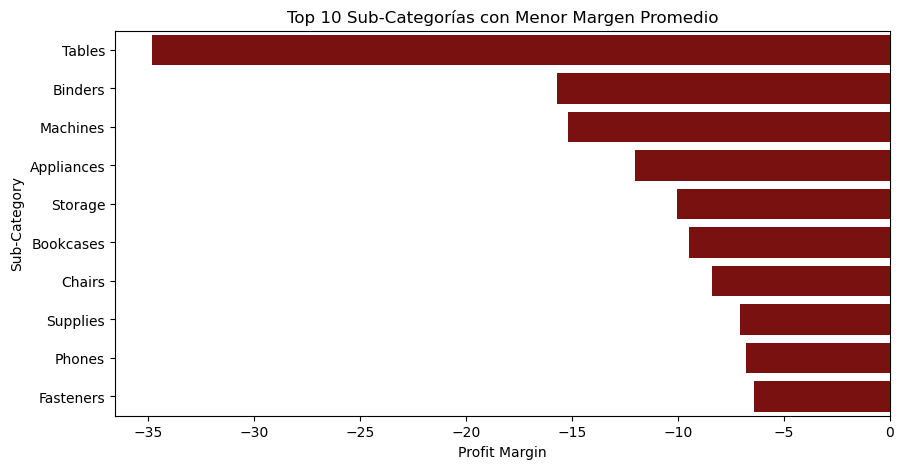

In [23]:
top_loss = df_margenes_negativos.head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_loss, x='Profit Margin', y='Sub-Category', color='darkred')
plt.title("Top 10 Sub-Categorías con Menor Margen Promedio")
plt.show()

In [24]:
top_10_negativos = df_limpio.nsmallest(10, 'Profit Margin')[['Product Name', 'Category', 'Sub-Category', 'Country','Profit Margin', 'Discount']]

print(top_10_negativos.to_string(index=False))

                                                              Product Name        Category Sub-Category        Country  Profit Margin  Discount
                                  Chromcraft Coffee Table, Fully Assembled       Furniture       Tables        Germany    -483.027174      0.85
Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum Office Supplies   Appliances  United States    -477.477477      0.80
                                                    Deflect-O Clock, Black       Furniture  Furnishings United Kingdom    -400.340745      0.80
                                         Hon Coffee Table, Fully Assembled       Furniture       Tables       Pakistan    -396.786086      0.80
                                         Hon Coffee Table, Fully Assembled       Furniture       Tables       Pakistan    -394.580458      0.80
                                   Lesro Training Table, Adjustable Height       Furniture       Tables       Pakistan    -368.910292   

In [25]:
ordenes_rentables_sin_shipping = df_limpio[df_limpio['Profit'] >= 0]
ordenes_no_rentables_con_shipping = ordenes_rentables_sin_shipping[ordenes_rentables_sin_shipping['Net Profit'] < 0]

print("IMPACTO DIRECTO DEL SHIPPING COST:")
print(f"Órdenes que eran rentables sin shipping: {len(ordenes_rentables_sin_shipping):,}")
print(f"Órdenes que se volvieron no rentables POR EL SHIPPING: {len(ordenes_no_rentables_con_shipping):,}")
print(f"Porcentaje afectado: {len(ordenes_no_rentables_con_shipping)/len(ordenes_rentables_sin_shipping)*100:.1f}%")

IMPACTO DIRECTO DEL SHIPPING COST:
Órdenes que eran rentables sin shipping: 38,746
Órdenes que se volvieron no rentables POR EL SHIPPING: 9,151
Porcentaje afectado: 23.6%


In [26]:
print(f"Ganancia promedio SIN shipping: ${df_limpio['Profit'].mean():.2f}")
print(f"Ganancia promedio CON shipping: ${df_limpio['Net Profit'].mean():.2f}") 
print(f"El shipping cost reduce la ganancia en ${abs(df_limpio['Net Profit'].mean() - df_limpio['Profit'].mean()):.2f} por orden")

Ganancia promedio SIN shipping: $28.61
Ganancia promedio CON shipping: $2.13
El shipping cost reduce la ganancia en $26.48 por orden


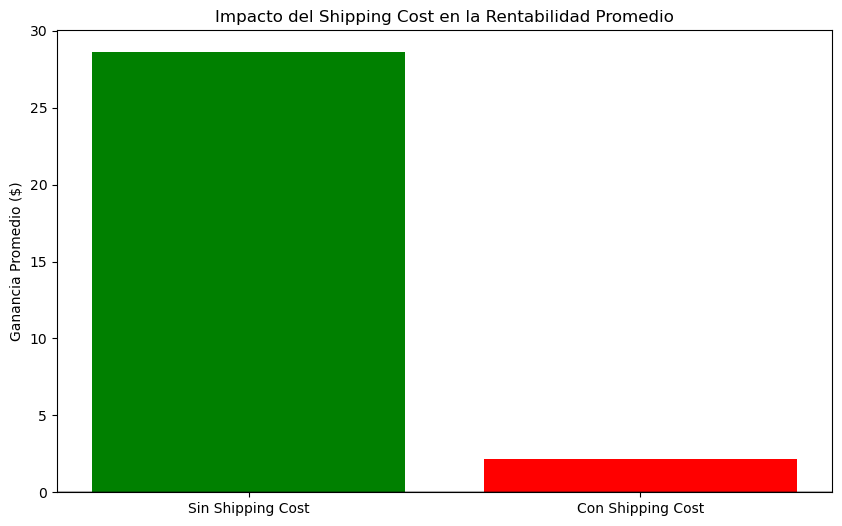

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(['Sin Shipping Cost', 'Con Shipping Cost'], 
        [df_limpio['Profit'].mean(), df_limpio['Net Profit'].mean()],
        color=['green', 'red'])
plt.ylabel('Ganancia Promedio ($)')
plt.title('Impacto del Shipping Cost en la Rentabilidad Promedio')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.show()

# Impacto del Costo de Envío (Shipping Cost) 

El análisis del impacto del costo de envío revela una **reducción drástica** en la rentabilidad. Tieneo un impacto negativo crítico.

## Puntos Clave:

### - Pérdida Masiva de Rentabilidad
* **23.6%** de las órdenes que inicialmente eran rentables (**38,746** órdenes con `Profit >= 0`) se vuelven **no rentables** al considerar el costo de envío.
* Esto representa **9,151 órdenes** que se están procesando con pérdidas.

### - Margen de Ganancia Mínimo
* La ganancia promedio por orden se reduce en **\$26.48**.
    * Ganancia Promedio **SIN Shipping:** **\$28.61**
    * Ganancia Promedio **CON Shipping:** **\$2.13**
* El margen real (\$2.13) es **críticamente bajo**, haciendo que el negocio sea extremadamente vulnerable a cualquier aumento futuro de costos.

---

## El costo de envío es un **factor limitante** de la rentabilidad. La estructura de precios actual no es sostenible, ya que el *Net Profit* es casi insignificante o negativo para una gran parte de las transacciones.

In [28]:
# Calculamos métricas de tiempo:

df_limpio['Shipping Time (days)'] = (df_limpio['Ship Date'] - df_limpio['Order Date']).dt.days

In [29]:
# Verificamos que no haya erroes en las fechas de envios (ej: fecha de envio anterior a fecha de órden).

print("Tiempos de envío negativos:", df_limpio[df_limpio['Shipping Time (days)'] < 0].shape[0])

Tiempos de envío negativos: 0


In [30]:
df_limpio['Order Year'] = df_limpio['Order Date'].dt.year
df_limpio['Order Month'] = df_limpio['Order Date'].dt.month

In [31]:
# Verificar si hay descuentos negativos
descuentos_negativos = df[df['Discount'] < 0]

print(f"Número de descuentos negativos: {len(descuentos_negativos)}")
if not descuentos_negativos.empty:
    display(descuentos_negativos)

Número de descuentos negativos: 0


In [32]:
# Análisis Estadístico Descriptivo:

df_limpio[['Sales', 'Profit', 'Net Profit', 'Profit Margin', 'Discount', 'Shipping Time (days)']].describe()

,Sales,Profit,Net Profit,Profit Margin,Discount,Shipping Time (days)
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,28.610982,2.132415,-7.555001,0.142908,3.969370
std,487.565361,174.340972,163.086829,48.539850,0.212280,1.729437
min,0.444000,-6599.978000,-7051.608000,-483.027174,0.000000,0.000000
25%,30.758625,0.000000,-10.533250,-14.534668,0.000000,3.000000
50%,85.053000,9.240000,2.361800,5.173748,0.000000,4.000000
75%,251.053200,36.810000,18.554800,21.723270,0.200000,5.000000
max,22638.480000,8399.976000,8050.906000,49.530735,0.850000,7.000000


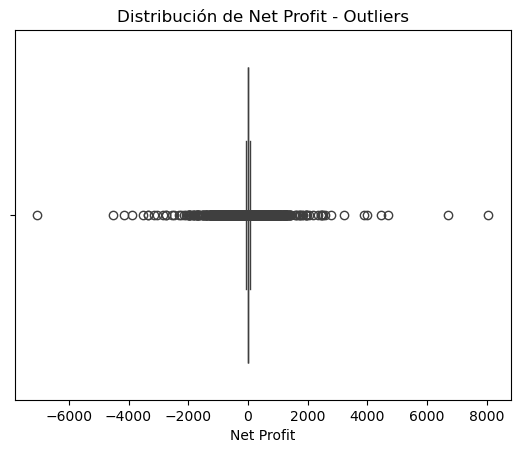

In [33]:
sns.boxplot(x=df_limpio['Net Profit'])
plt.title('Distribución de Net Profit - Outliers')
plt.xlabel('Net Profit')
plt.show()

# Análisis de la Distribución del Beneficio Neto

La distribución del **Beneficio Neto** (`Net Profit`) muestra una **alta variabilidad** con la presencia de numerosos valores atípicos (outliers).

## Observaciones Clave:

* **Variabilidad y Outliers:** Se observan múltiples valores atípicos, tanto en el extremo positivo como en el negativo del gráfico de distribución (e.g., boxplot).
* **Impacto de Productos:** Esta distribución sugiere que algunos productos o transacciones puntuales están generando **beneficios o pérdidas muy superiores** al promedio general.

# Se realizara un **Análisis Detallado** para obtener una comprensión más precisa y detallada de esta variabilidad, es fundamental analizar la rentabilidad **segmentada por Categoría y Producto**.

## Vamos a realizar un Análisis Exploratorio de Datos (EDA).

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df_limpio.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Net Profit,Profit Margin,Shipping Time (days),Order Year,Order Month
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.1544,40.77,High,21.3844,9.633480,2,2014,11
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.7650,923.63,Critical,-1212.3950,-32.684440,2,2014,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.9710,915.49,Medium,4.4810,0.086587,1,2014,10
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-96.5400,910.16,Medium,-1006.7000,-34.803683,2,2014,1
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.5200,903.04,Critical,-591.5200,-20.879928,1,2014,11


In [36]:
df_limpio['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [37]:
df_limpio.isna().sum()

Row ID                      0
Order ID                    0
Order Date                  0
Ship Date                   0
Ship Mode                   0
Customer ID                 0
Customer Name               0
Segment                     0
Postal Code             41296
City                        0
State                       0
Country                     0
Region                      0
Market                      0
Product ID                  0
Category                    0
Sub-Category                0
Product Name                0
Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Shipping Cost               0
Order Priority              0
Net Profit                  0
Profit Margin               0
Shipping Time (days)        0
Order Year                  0
Order Month                 0
dtype: int64

In [38]:
# Calculamos rentabilidad de las Categorias.

profit_category = df_limpio.groupby('Category').agg(
    total_profit=('Net Profit', 'sum'),
    total_sales=('Sales', 'sum')
).reset_index()

profit_category['Profit_Margin'] = ((profit_category['total_profit'] / profit_category['total_sales']) * 100).round(2)
profit_category['%_part_total_sales'] = ((profit_category['total_sales'] / profit_category['total_sales'].sum()) * 100).round(2)

profit_category

,Category,total_profit,total_sales,Profit_Margin,%_part_total_sales
0,Furniture,-155503.63880,4.110452e+06,-3.78,32.51
1,Office Supplies,108293.37290,3.787493e+06,2.86,29.96
2,Technology,156581.85378,4.744557e+06,3.30,37.53


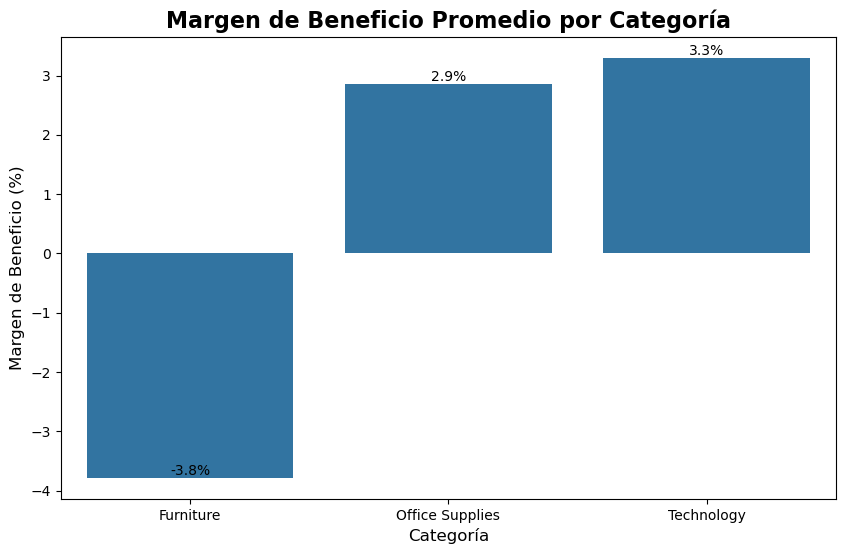

In [39]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=profit_category['Category'], y=profit_category['Profit_Margin'])
plt.title('Margen de Beneficio Promedio por Categoría', fontsize=16, fontweight='bold')
plt.ylabel('Margen de Beneficio (%)', fontsize=12)
plt.xlabel('Categoría', fontsize=12)

for i, v in enumerate(profit_category['Profit_Margin']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()
    

# Análisis de Rentabilidad por Categoría

El desempeño de la rentabilidad del negocio está fuertemente polarizado por las tres categorías principales: Furniture, Office Supplies y Technology.

## Furniture (32.5% de las Ventas)

* **Margen de Beneficio:** **-3.8%** (Negativo)
* **Impacto:** Es la **única categoría que genera pérdidas** y el principal factor que reduce la rentabilidad global del negocio.
* **Acción Requerida:** A pesar de representar un tercio de las ventas, su contribución al resultado operativo es negativa y requiere una **intervención urgente** para revertir las pérdidas.

## Technology (37.5% de las Ventas)

* **Margen de Beneficio:** **+3.3%**
* **Impacto:** Es la categoría **más rentable y eficiente** del portafolio. Lidera tanto en margen como en participación de ventas.
* **Rol Estratégico:** Su fuerte comportamiento la consolida como el **eje estratégico** para el crecimiento y la estabilidad del negocio.

## Office Supplies (30.0% de las Ventas)

* **Margen de Beneficio:** **+2.9%**
* **Impacto:** Su desempeño es estable y registra un margen positivo.
* **Oportunidad:** Aunque no es el principal generador de rentabilidad, existe **margen para mejorar su eficiencia comercial** e impulsar su margen.

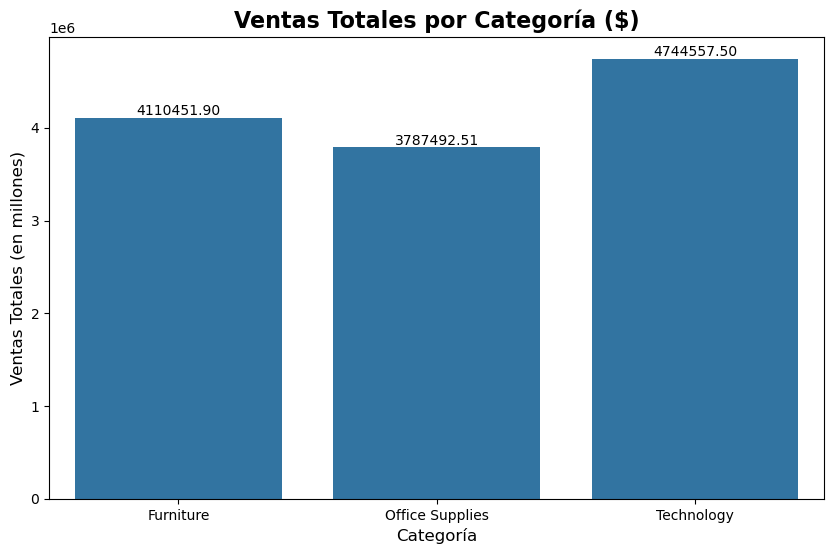

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=profit_category['Category'], y=profit_category['total_sales'])
plt.title('Ventas Totales por Categoría ($)', fontsize=16, fontweight='bold')
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.xlabel('Categoría', fontsize=12)

for i, v in enumerate(profit_category['total_sales']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

Category
Office Supplies    108244
Technology          35176
Furniture           34892
Name: Quantity, dtype: int64


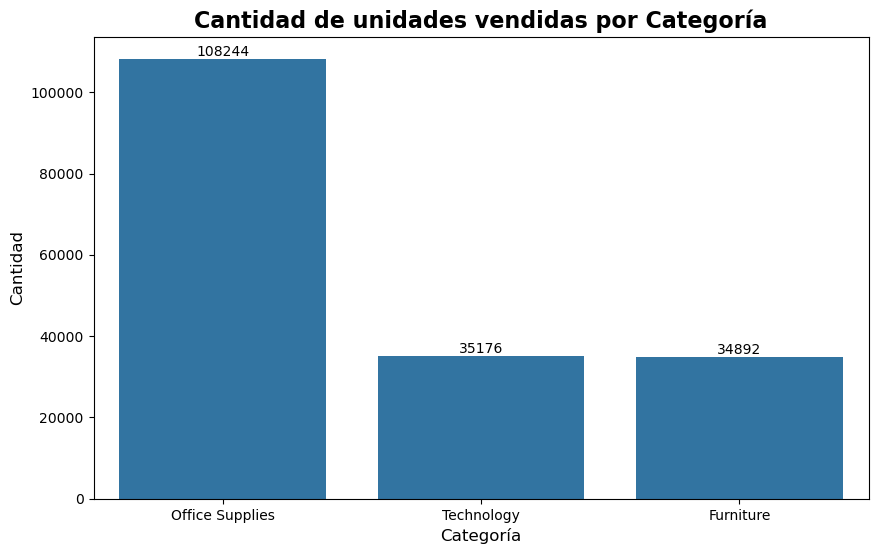

In [41]:
category_quantity = df_limpio.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

print(category_quantity)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_quantity.index, y=category_quantity.values)
plt.title('Cantidad de unidades vendidas por Categoría', fontsize=16, fontweight='bold')
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Categoría', fontsize=12)

for i, v in enumerate(category_quantity):
    plt.text(i, v, f'{v}', ha='center', va='bottom')

plt.show()

In [42]:
# Calculaos precio promedio por unidad

category_price = df_limpio.groupby('Category').agg(
           total_profit=('Net Profit', 'sum'),
           total_sales=('Sales', 'sum'),
           total_quantity=('Quantity','sum')
).round(2).reset_index()

category_price['avg_price_per_unit'] = category_price['total_sales'] / category_price['total_quantity']

category_price['profit_per_unit'] = category_price['total_profit'] / category_price['total_quantity']

category_price

,Category,total_profit,total_sales,total_quantity,avg_price_per_unit,profit_per_unit
0,Furniture,-155503.64,4110451.90,34892,117.804995,-4.456713
1,Office Supplies,108293.37,3787492.51,108244,34.990323,1.000456
2,Technology,156581.85,4744557.50,35176,134.880529,4.451383


# Análisis de Rentabilidad **Por Unidad**

El detalle por unidad vendida confirma las tendencias observadas y focaliza la causa de la baja rentabilidad global.

## Furniture

* **Precio Promedio por Unidad:** €117.80
* **Beneficio por Unidad:** **–€4.46**
* **Conclusión:** A pesar de ser productos de **alto valor**, cada unidad vendida genera una **pérdida**. Esto confirma que el problema de rentabilidad está en la estructura de **costes asociados o en los descuentos aplicados**, no necesariamente en el precio base. Es la única categoría con rentabilidad unitaria negativa.

## Technology

* **Precio Promedio por Unidad:** €134.88
* **Beneficio por Unidad:** **€4.45**
* **Conclusión:** Es la categoría **más eficiente**. Combina el **mayor valor por unidad** con el **mayor beneficio por unidad**. Cada venta individual contribuye significativamente al resultado económico.

## Office Supplies

* **Precio Promedio por Unidad:** €34.99
* **Beneficio por Unidad:** **€1.00**
* **Conclusión:** Se trata de productos de **bajo valor unitario** con una rentabilidad positiva, pero baja. Su eficiencia económica es estable, pero requiere un **alto volumen de ventas** para generar un impacto financiero considerable en el resultado global.

In [43]:
# Filtramos para quedarnos sólo con las Subcategorías.

df_limpio['Sub-Category'].unique()

array(['Phones', 'Chairs', 'Copiers', 'Tables', 'Bookcases', 'Art',
       'Appliances', 'Storage', 'Fasteners', 'Machines', 'Accessories',
       'Furnishings', 'Binders', 'Labels', 'Paper', 'Supplies',
       'Envelopes'], dtype=object)

In [44]:
# Analizamos las Subcategorías.

subcategory = df_limpio.groupby('Sub-Category').agg(
    category=('Category', 'first'),
    total_profit=('Net Profit', 'sum'),
    total_sales=('Sales', 'sum'),
    total_quantity=('Quantity', 'sum')
).round(2).reset_index()

subcategory['Profit_Margin'] = ((subcategory['total_profit'] / subcategory['total_sales']) * 100).round(2)

subcategory['avg_price_per_unit'] = (subcategory['total_sales'] / subcategory['total_quantity']).round(2)


subcategory['profit_per_unit'] = (subcategory['total_profit'] / subcategory['total_quantity']).round(2)


df_subcategory = subcategory.sort_values('Profit_Margin', ascending=False)

df_subcategory

,Sub-Category,category,total_profit,total_sales,total_quantity,Profit_Margin,avg_price_per_unit,profit_per_unit
12,Paper,Office Supplies,31247.57,241787.53,12672,12.92,19.08,2.47
10,Labels,Office Supplies,6148.20,73350.28,9301,8.38,7.89,0.66
6,Copiers,Technology,99066.34,1509436.27,7454,6.56,202.50,13.29
0,Accessories,Technology,46033.97,749237.02,10946,6.14,68.45,4.21
7,Envelopes,Office Supplies,10266.52,169217.49,8210,6.07,20.61,1.25
3,Binders,Office Supplies,22660.05,461869.39,21403,4.91,21.58,1.06
2,Art,Office Supplies,15940.78,371613.15,16215,4.29,22.92,0.98
8,Fasteners,Office Supplies,3544.22,89495.05,9051,3.96,9.89,0.39
1,Appliances,Office Supplies,33254.84,1010535.52,6026,3.29,167.70,5.52
13,Phones,Technology,31763.51,1706824.14,11870,1.86,143.79,2.68


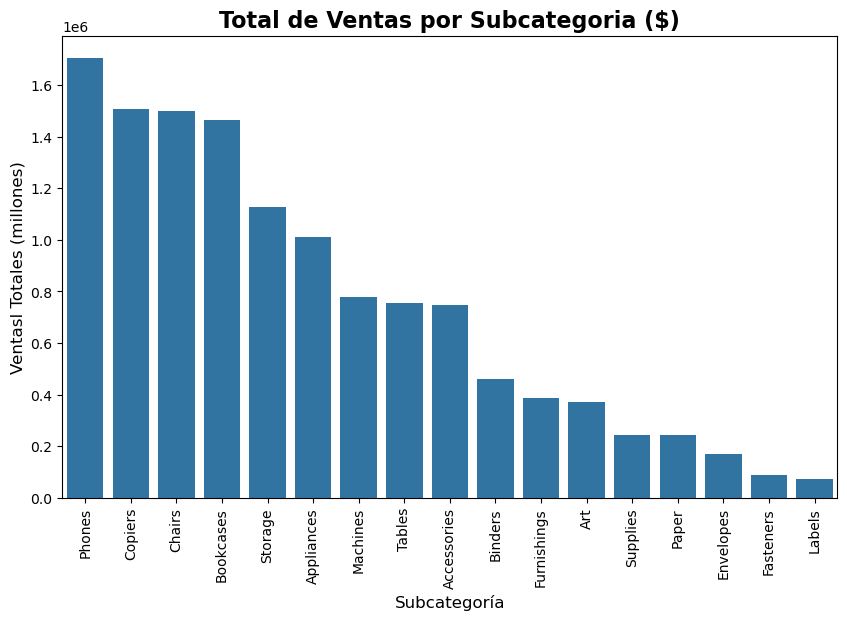

In [45]:
subcategory_sales = subcategory.sort_values('total_sales', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=subcategory_sales['Sub-Category'], y=subcategory_sales['total_sales'])
plt.title('Total de Ventas por Subcategoria ($)', fontsize=16, fontweight='bold')
plt.ylabel('Ventasl Totales (millones)', fontsize=12)
plt.xlabel('Subcategoría', fontsize=12)
plt.xticks(rotation=90)
plt.show()

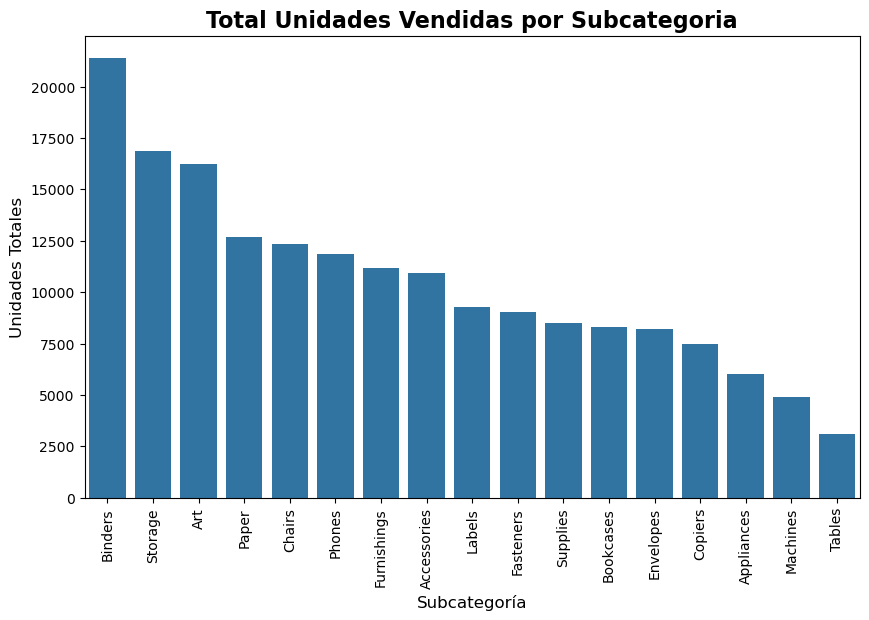

In [46]:
subcategory_quantity = subcategory.sort_values('total_quantity', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=subcategory_quantity['Sub-Category'], y=subcategory_quantity['total_quantity'])
plt.title('Total Unidades Vendidas por Subcategoria', fontsize=16, fontweight='bold')
plt.ylabel('Unidades Totales', fontsize=12)
plt.xlabel('Subcategoría', fontsize=12)
plt.xticks(rotation=90)
plt.show()

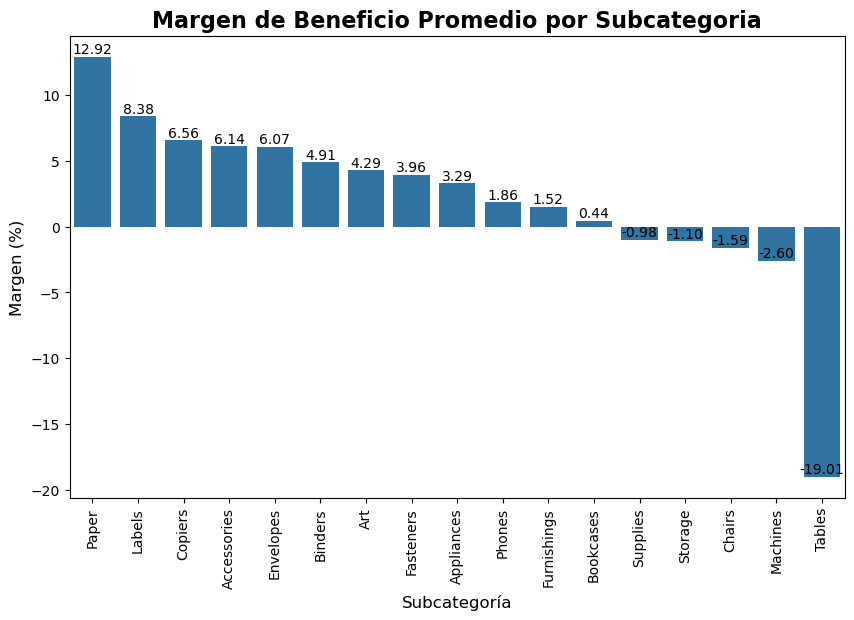

In [47]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_subcategory['Sub-Category'], y=df_subcategory['Profit_Margin'])
plt.title('Margen de Beneficio Promedio por Subcategoria', fontsize=16, fontweight='bold')
plt.ylabel('Margen (%)', fontsize=12)
plt.xlabel('Subcategoría', fontsize=12)
plt.xticks(rotation=90)

for i, v in enumerate(df_subcategory['Profit_Margin']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    
plt.show()

In [48]:
# Porcetaje de participacion de cada Sub-Categoria en las ventas totales

df_subcategory['%_part_total_sales'] = ((df_subcategory['total_sales'] / df_subcategory['total_sales'].sum()) * 100).round(2)

df_subcategory

,Sub-Category,category,total_profit,total_sales,total_quantity,Profit_Margin,avg_price_per_unit,profit_per_unit,%_part_total_sales
12,Paper,Office Supplies,31247.57,241787.53,12672,12.92,19.08,2.47,1.91
10,Labels,Office Supplies,6148.20,73350.28,9301,8.38,7.89,0.66,0.58
6,Copiers,Technology,99066.34,1509436.27,7454,6.56,202.50,13.29,11.94
0,Accessories,Technology,46033.97,749237.02,10946,6.14,68.45,4.21,5.93
7,Envelopes,Office Supplies,10266.52,169217.49,8210,6.07,20.61,1.25,1.34
3,Binders,Office Supplies,22660.05,461869.39,21403,4.91,21.58,1.06,3.65
2,Art,Office Supplies,15940.78,371613.15,16215,4.29,22.92,0.98,2.94
8,Fasteners,Office Supplies,3544.22,89495.05,9051,3.96,9.89,0.39,0.71
1,Appliances,Office Supplies,33254.84,1010535.52,6026,3.29,167.70,5.52,7.99
13,Phones,Technology,31763.51,1706824.14,11870,1.86,143.79,2.68,13.50


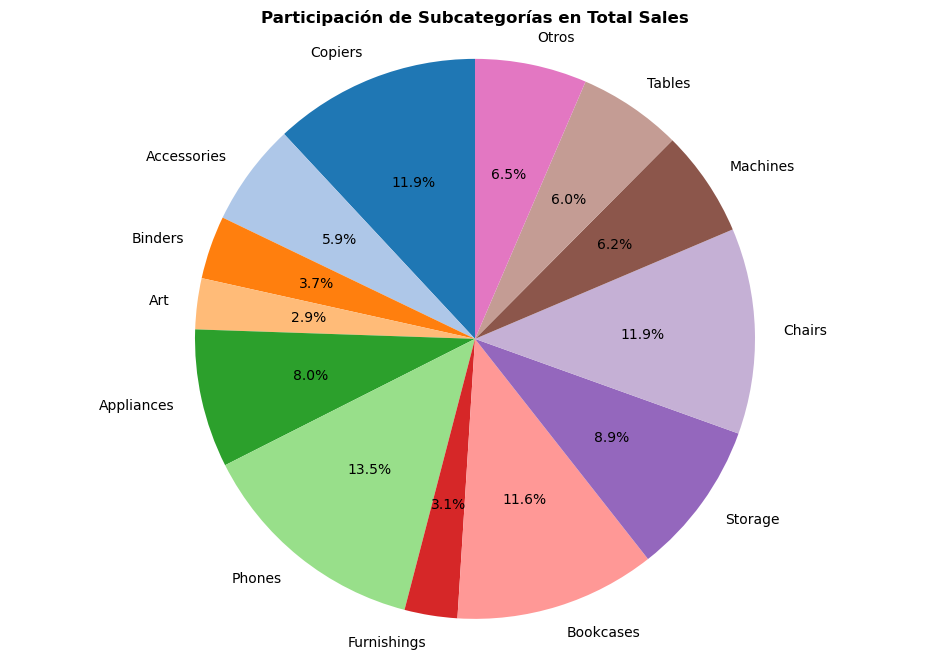

In [49]:
# Para la visualización agrupamos las Subcategorías menores a 2% de participación en "Otros".

plt.figure(figsize=(12,8))

umbral = 2
df_principales = df_subcategory[df_subcategory['%_part_total_sales'] >= umbral]
otros_porcentaje = df_subcategory[df_subcategory['%_part_total_sales'] < umbral]['%_part_total_sales'].sum()

nueva_fila_otros = pd.Series({'Sub-Category': 'Otros', '%_part_total_sales': otros_porcentaje})

df_final_pie = pd.concat(
    [df_principales, pd.DataFrame([nueva_fila_otros])], 
    ignore_index=True
)

plt.pie(
    df_final_pie['%_part_total_sales'],
    labels=df_final_pie['Sub-Category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors 
)
plt.title('Participación de Subcategorías en Total Sales', fontweight='bold')
plt.axis('equal')
plt.show()

# Análisis de Rentabilidad Detallada por Subcategoría

El análisis a nivel de subcategoría permite identificar los focos de pérdida y los motores de crecimiento del negocio.

## Focos Críticos de Pérdida (Revisión Urgente)

| Subcategoría | Margen | Pérdida por Unidad | Precio Promedio | Participación Ventas |
| :--- | :---: | :---: | :---: | :---: |
| **Tables** | **–19.01%** | **–€46.69** | €245.55 | 5.99% |

* **Tables** es el **mayor foco de pérdida** del portafolio. A pesar de su alto precio promedio, su baja eficiencia y margen extremadamente negativo demandan una **revisión urgente** de costes, precios, o despriorización.

## Subcategorías que Erosionan el Beneficio (Alto Riesgo)

* **Chairs, Machines y Storage** presentan **márgenes negativos** (entre –1.10% y –2.60%) y **pérdidas por unidad** (entre –€0.73 y –€4.13).
* A pesar de su alta participación en ventas (6%–12%), son subcategorías de **alto volumen y baja eficiencia**, lo que representa un **riesgo financiero** significativo por el volumen de pérdidas que generan.

## Motores de Rentabilidad (Foco Estratégico)

| Subcategoría | Margen | Beneficio por Unidad | Participación Ventas |
| :--- | :---: | :---: | :---: |
| **Copiers** | **6.56%** | **€13.29** | 11.94% |
| **Paper** | **12.92%** (Más Alto) | **€2.47** | N/A |

* **Copiers** es el producto **más eficiente**, mostrando un excelente balance entre alto valor, margen sólido y contribución de ventas. Es un motor económico claro.
* **Paper** destaca por ser el producto con el **margen más alto** (12.92%). Es ideal para escalar por volumen, ya que combina un precio bajo (€19.08) con una muy buena rentabilidad unitaria.

## Subcategorías Basadas en Volumen

* **Phones** (Participación: 13.50% - la más alta) y **Bookcases** (Participación: 11.60%).
* Ambos tienen un impacto que depende del volumen, no de la alta eficiencia.
    * **Phones:** Margen 1.86% y Beneficio €2.68. Es rentable pero no destacada.
    * **Bookcases:** Margen marginal de 0.44% y Beneficio de €0.77. Mucho movimiento con poco aporte económico.

---

# Conclusiones y Recomendaciones de Priorización

| Acciones | Subcategorías Prioritarias | Justificación |
| :--- | :--- | :--- |
| **Priorizar/Escalar** | **Copiers, Paper, Accessories, Appliances** | Eficiencia económica y altos márgenes/beneficio por unidad. |
| **Revisar/Despriorizar** | **Tables, Machines, Chairs, Storage** | Impacto negativo y erosión del beneficio total. |
| **Optimizar Margen** | **Phones, Bookcases** | Alto volumen de ventas, pero baja o marginal rentabilidad. |

In [50]:
# Vamos a realizar un análisis de rentabilidad por producto.
# Para asegurar que los resultados sean representativos, primero exploramos la distribución de unidades vendidas.
# Esto nos permitirá establecer un umbral mínimo de ventas por producto y filtrar aquellos casos con bajo volumen, evitando que distorsionen el análisis de rentabilidad.

product_quantity = df_limpio.groupby('Product Name')['Quantity'].sum().reset_index()

product_quantity.head()

,Product Name,Quantity
0,"""While you Were Out"" Message Book, One Form pe...",8
1,"#10 Gummed Flap White Envelopes, 100/Box",11
2,#10 Self-Seal White Envelopes,10
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",32
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37


In [51]:
product_quantity['Quantity'].describe()

count    3788.000000
mean       47.072862
std        40.672009
min         1.000000
25%        18.000000
50%        35.000000
75%        67.000000
max       876.000000
Name: Quantity, dtype: float64

Text(0.5, 1.0, 'Distribución de Unidades Vendidas por Producto')

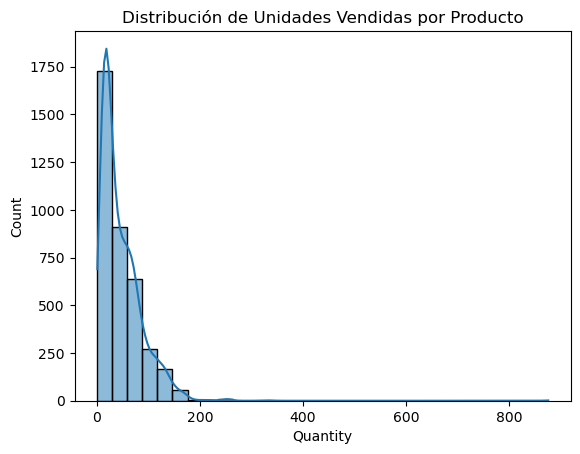

In [52]:
sns.histplot(product_quantity['Quantity'], bins=30, kde=True)
plt.title('Distribución de Unidades Vendidas por Producto')

### Elejimos como umbral de unidades minimas para filtrar el valor correspondiente a la media, es decir, 35 unidades.

In [53]:
# Queremos buscar los 10 productos mas rentables y los 10 menos rentables:

product_profit = df_limpio.groupby('Product Name').agg(
    category=('Category', 'first'),
    total_profit=('Net Profit', 'sum'),
    total_sales=('Sales', 'sum'),
    total_quantity=('Quantity', 'sum')
)

product_profit['Profit_Margin'] = ((product_profit['total_profit'] / product_profit['total_sales']) * 100).round(2)

product_profit_filtrado = product_profit[product_profit['total_quantity'] >= 35]

product_profit_filtrado = product_profit_filtrado.sort_values('Profit_Margin', ascending=False)

top_10_product_profit = product_profit_filtrado.head(10)
tail_10_product_profit = product_profit_filtrado.tail(10)

print("TOP 10 Productos mas rentables:")
top_10_product_profit

TOP 10 Productos mas rentables:


,category,total_profit,total_sales,total_quantity,Profit_Margin
Product Name,,,,,
Xerox 1919,Office Supplies,595.1520,1565.818,40,38.01
Xerox 1881,Office Supplies,169.9308,454.360,38,37.40
"Wirebound Message Book, 4 per Page",Office Supplies,69.0145,184.620,35,37.38
Alphabetical Labels for Top Tab Filing,Office Supplies,192.5000,518.000,37,37.16
"Dot Matrix Printer Tape Reel Labels, White, 5000/Box",Office Supplies,1226.2764,3322.878,36,36.90
"REDIFORM Incoming/Outgoing Call Register, 11"" X 8 1/2"", 100 Messages",Office Supplies,103.8920,281.892,37,36.86
Self-Adhesive Removable Labels,Office Supplies,40.2900,110.250,35,36.54
Advantus Plastic Paper Clips,Office Supplies,80.5300,225.000,47,35.79
Xerox 191,Office Supplies,269.5554,767.232,39,35.13


In [54]:
# TOP 10 productos menos rentables.

print("TOP 10 Productos menos rentables:")
tail_10_product_profit

TOP 10 Productos menos rentables:


,category,total_profit,total_sales,total_quantity,Profit_Margin
Product Name,,,,,
"Bush Library with Doors, Pine",Furniture,-3301.1317,9028.3923,41,-36.56
"Bevis Computer Table, Fully Assembled",Furniture,-4403.5818,11177.8962,43,-39.40
"Acco Pressboard Covers with Storage Hooks, 14 7/8"" x 11"", Executive Red",Office Supplies,-25.4765,63.6270,37,-40.04
"Samsung Audio Dock, with Caller ID",Technology,-3123.0342,7661.9458,67,-40.76
"Xerox Note Cards, 8.5 x 11",Office Supplies,-570.1450,1303.7940,58,-43.73
O'Sullivan 4-Shelf Bookcase in Odessa Pine,Furniture,-1229.0688,2740.1970,37,-44.85
"Tenex Door Stop, Durable",Furniture,-647.9892,1429.7448,56,-45.32
"Premier Elliptical Ring Binder, Black",Office Supplies,-253.4328,526.6120,46,-48.13
"Jiffy Manila Envelope, Recycled",Office Supplies,-338.5452,680.1248,45,-49.78


In [55]:
# TOP 10 productos con mayores ventas ($).

product_sales = product_profit_filtrado.sort_values('total_sales', ascending=False)

top_10_sales = product_sales.head(10)

top_10_sales

,category,total_profit,total_sales,total_quantity,Profit_Margin
Product Name,,,,,
"Apple Smart Phone, Full Size",Technology,-2106.1364,86935.7786,171,-2.42
"Cisco Smart Phone, Full Size",Technology,10173.3546,76441.5306,139,13.31
"Motorola Smart Phone, Full Size",Technology,8209.7820,73156.3030,134,11.22
"Nokia Smart Phone, Full Size",Technology,2085.5325,71904.5555,147,2.90
"Hon Executive Leather Armchair, Adjustable",Furniture,245.7131,58193.4841,169,0.42
"Office Star Executive Leather Armchair, Adjustable",Furniture,-430.7500,50661.6840,141,-0.85
"Harbour Creations Executive Leather Armchair, Adjustable",Furniture,3879.1610,50121.5160,142,7.74
"Samsung Smart Phone, Cordless",Technology,-6090.1640,48653.4600,108,-12.52
"Nokia Smart Phone, with Caller ID",Technology,4144.2157,47877.7857,96,8.66


In [56]:
# TOP 10 productos con menores ventas ($).

tail_10_sales = product_sales.tail(10)

tail_10_sales

,category,total_profit,total_sales,total_quantity,Profit_Margin
Product Name,,,,,
"Redi-Strip #10 Envelopes, 4 1/8 x 9 1/2",Office Supplies,25.2300,93.220,35,27.07
Avery Durable Slant Ring Binders With Label Holder,Office Supplies,-6.7736,90.706,36,-7.47
"Avery Durable Slant Ring Binders, No Labels",Office Supplies,-3.1984,89.550,36,-3.57
Avery Durable Binders,Office Supplies,-3.7260,87.264,50,-4.27
Zipper Ring Binder Pockets,Office Supplies,-6.2388,81.744,44,-7.63
Poly String Tie Envelopes,Office Supplies,12.8540,68.136,35,18.87
"Acco Pressboard Covers with Storage Hooks, 14 7/8"" x 11"", Executive Red",Office Supplies,-25.4765,63.627,37,-40.04
"Crayola Anti Dust Chalk, 12/Pack",Office Supplies,13.5610,59.696,35,22.72
Wilson Jones Easy Flow II Sheet Lifters,Office Supplies,-10.6840,51.480,49,-20.75


In [57]:
# TOP 10 productos con mayor cantidades vendidas.

quantity_products = product_profit_filtrado.sort_values('total_quantity', ascending=False)

top_10_products = quantity_products.sort_values('total_quantity', ascending=False).head(10)

top_10_products

,category,total_profit,total_sales,total_quantity,Profit_Margin
Product Name,,,,,
Staples,Office Supplies,1811.6394,7008.2000,876,25.85
"Cardinal Index Tab, Clear",Office Supplies,314.0252,1922.8302,337,16.33
"Eldon File Cart, Single Width",Office Supplies,267.0477,34387.7287,321,0.78
"Rogers File Cart, Single Width",Office Supplies,-742.3847,29466.3053,262,-2.52
"Sanford Pencil Sharpener, Water Color",Office Supplies,25.5711,5581.9741,259,0.46
"Stockwell Paper Clips, Assorted Sizes",Office Supplies,-31.9232,2395.4378,253,-1.33
"Avery Index Tab, Clear",Office Supplies,48.0338,1312.9488,252,3.66
"Ibico Index Tab, Clear",Office Supplies,-95.6069,1807.1811,251,-5.29
"Smead File Cart, Single Width",Office Supplies,-3274.1232,25397.1708,250,-12.89


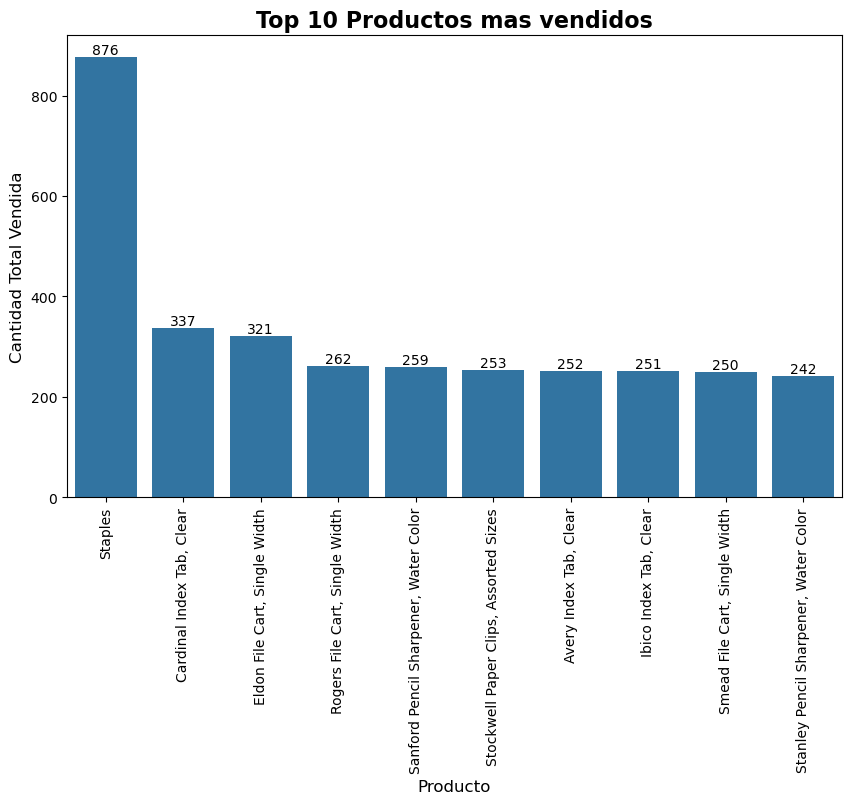

In [58]:
top_10_products = top_10_products.reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_products['Product Name'], y=top_10_products['total_quantity'])
plt.title('Top 10 Productos mas vendidos', fontsize=16, fontweight='bold')
plt.ylabel('Cantidad Total Vendida', fontsize=12)
plt.xlabel('Producto', fontsize=12)
plt.xticks(rotation=90)

for i, v in enumerate(top_10_products['total_quantity']):
    plt.text(i, v, f'{v}', ha='center', va='bottom')

plt.show()


# Analisis de Estrategia Basada en Representatividad y Desempeño

El análisis de rentabilidad se realizó estableciendo un **umbral mínimo de 35 unidades vendidas por producto**. Esta medida asegura la **representatividad estadística**, excluyendo casos de bajo volumen que podrían distorsionar los indicadores de margen, y garantiza que los resultados reflejen **patrones comerciales sostenibles**.

---

## Productos de Alta Rentabilidad y Sostenibilidad

* **Rentabilidad Superior:** Los productos con el mayor margen de beneficio alcanzan una rentabilidad **superior al 40%**.
* **Eficiencia Comprobada:** Esto evidencia una estructura de costos eficiente o una estrategia de *pricing* acertada.
* **Sostenibilidad:** Al cumplir con el umbral mínimo de volumen, su desempeño no es circunstancial, sino **sostenido en el tiempo**.
* **Recomendación:** Se debe **priorizar** estos productos en campañas de marketing, *bundles* o reposición de inventario, ya que combinan una alta rentabilidad con un volumen suficiente para impactar positivamente el margen global.

---

## Productos Tractores de Facturación (Alto Valor Monetario)

* **Categorías Dominantes:** Los productos con el mayor volumen de ventas en términos monetarios se concentran principalmente en las categorías de **Technology y Furniture**.
* **Impacto Financiero:** Funcionan como **tractores de facturación**. Aunque sus márgenes unitarios son moderados, su impacto financiero total es alto debido al valor transaccionado.
* **Recomendación:** Podrían beneficiarse de estrategias de **optimización de costos** o mejoras en la eficiencia logística para aumentar su rentabilidad sin comprometer su competitividad o volumen.

---

## Productos Clave para Volumen y Fidelización (Alta Rotación)

* **Concentración:** Los productos con la mayor cantidad de unidades vendidas se concentran en categorías como **Office Supplies y Binders**.
* **Rol Estratégico:** Su **alta rotación** y bajo precio unitario los convierten en piezas clave para la **fidelización de clientes** y la generación de volumen.
* **Recomendación:** Se recomienda mantener estos productos en **stock constante** y evaluar su inclusión en estrategias de *cross-selling* o programas de fidelización.

---

## Disociación entre Volumen y Rentabilidad

* **El Problema:** Se observa una clara **disociación** donde los productos más vendidos en cantidad no figuran entre los más rentables.
* **Implicación:** Este patrón sugiere que el **volumen no garantiza la eficiencia económica**.
* **Recomendación:** Es crucial **revisar la estructura de costos y precios** en productos de alta rotación para maximizar su contribución al margen global sin sacrificar la demanda.

In [59]:
# Vamos a buscar los países más rentables. Utilizaremos aquellos que tengan mas de 100 ordenes para filtrar outliers:

paises_stats = df_limpio.groupby('Country').agg(
    total_profit=('Net Profit', 'sum'),
    total_sales=('Sales', 'sum'),
    Cant_Ordenes=('Row ID', 'count')
).reset_index()


paises_stats['Profit_Margin'] = ((paises_stats['total_profit'] / paises_stats['total_sales']) * 100).round(2)
paises_stats['%_part_total_sales'] = ((paises_stats['total_sales'] / paises_stats['total_sales'].sum()) * 100).round(2)

In [60]:
paises_stats.head()

,Country,total_profit,total_sales,Cant_Ordenes,Profit_Margin,%_part_total_sales
0,Afghanistan,3160.07000,21673.32000,55,14.58,0.17
1,Albania,8.75000,3888.12000,16,0.23,0.03
2,Algeria,5362.09000,36091.59000,196,14.86,0.29
3,Angola,4064.57000,25554.00000,122,15.91,0.20
4,Argentina,-25120.15872,57511.78328,390,-43.68,0.45


In [61]:
# Cantidad total de paises

cantidad_paises = paises_stats['Country'].count()

cantidad_paises

165

In [62]:
top_10_margen = paises_stats.nlargest(10, 'Profit_Margin')

top_10_margen

,Country,total_profit,total_sales,Cant_Ordenes,Profit_Margin,%_part_total_sales
146,The Gambia,8.220,19.98,1,41.14,0.00
109,Oman,28.740,76.65,2,37.50,0.00
46,Eritrea,67.650,187.74,2,36.03,0.00
5,Armenia,55.590,156.75,3,35.46,0.00
61,Guyana,322.902,933.86,3,34.58,0.01
161,Western Sahara,227.900,666.36,2,34.20,0.01
23,Burundi,84.570,267.72,2,31.59,0.00
125,Serbia,225.210,731.91,2,30.77,0.01
93,Mauritania,1232.800,4020.93,10,30.66,0.03
14,Belize,21.361,75.12,2,28.44,0.00


In [63]:
top_10_participacion = paises_stats.nlargest(10, '%_part_total_sales')

top_10_participacion

,Country,total_profit,total_sales,Cant_Ordenes,Profit_Margin,%_part_total_sales
156,United States,46385.23130,2.297201e+06,9994,2.02,18.17
6,Australia,3402.41300,9.252359e+05,2837,0.37,7.32
50,France,13543.19300,8.589311e+05,2827,1.58,6.79
30,China,71671.06500,7.005620e+05,1880,10.23,5.54
54,Germany,43247.23550,6.281362e+05,2063,6.89,4.97
94,Mexico,34722.42552,6.215526e+05,2635,5.59,4.92
66,India,67210.16500,5.894860e+05,1554,11.40,4.66
155,United Kingdom,58251.87600,5.285763e+05,1633,11.02,4.18
67,Indonesia,-28437.94610,4.048875e+05,1390,-7.02,3.20
20,Brazil,-8534.37904,3.599249e+05,1593,-2.37,2.85


In [64]:
paises_stats['Cant_Ordenes'].describe()

count     165.000000
mean      310.848485
std       911.049486
min         1.000000
25%        12.000000
50%        50.000000
75%       249.000000
max      9994.000000
Name: Cant_Ordenes, dtype: float64

Text(0.5, 1.0, 'Distribución de Cantidad de Ordenes por País')

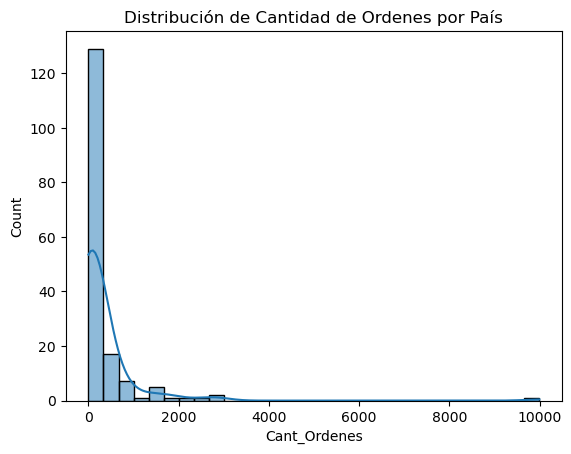

In [65]:
sns.histplot(paises_stats['Cant_Ordenes'], bins=30, kde=True)
plt.title('Distribución de Cantidad de Ordenes por País')

### Se estableció un umbral mínimo de 249 órdenes por país (percentil 75) para garantizar que el análisis se enfoque en los mercados con actividad comercial significativa. Esta decisión permite excluir casos marginales y asegurar que los indicadores de rentabilidad y ventas reflejen patrones sostenibles y relevantes para la toma de decisiones.

In [66]:
# TOP 10 países con MAYOR Margen de Gancia

paises_stats_filtrado = paises_stats[paises_stats['Cant_Ordenes'] >= 249]
top_10_paises = paises_stats_filtrado.sort_values('Profit_Margin', ascending=False).head(10)
tail_10_paises = paises_stats_filtrado.sort_values('Profit_Margin', ascending=False).tail(10)

top_10_paises

,Country,total_profit,total_sales,Cant_Ordenes,Profit_Margin,%_part_total_sales
7,Austria,14631.47000,92539.05000,331,15.81,0.73
69,Iraq,11058.41000,70714.80000,388,15.64,0.56
121,Russia,12863.30000,82913.88000,384,15.51,0.66
26,Canada,10371.76000,66928.17000,384,15.50,0.53
98,Morocco,13369.54000,87077.94000,451,15.35,0.69
74,Japan,14451.81700,100787.51700,250,14.34,0.80
35,Cuba,22063.89948,158854.93548,724,13.89,1.26
38,Democratic Republic of the Congo,11893.34000,87416.58000,379,13.61,0.69
153,Ukraine,11670.18000,86857.17000,381,13.44,0.69
116,Poland,5932.28000,44228.85000,252,13.41,0.35


In [67]:
# TOP 10 países con MENOR Margen de Gancia

tail_10_paises

,Country,total_profit,total_sales,Cant_Ordenes,Profit_Margin,%_part_total_sales
41,Dominican Republic,-22277.56572,126140.58128,742,-17.66,1.00
115,Philippines,-34061.73500,183420.16500,681,-18.57,1.45
145,Thailand,-15066.72500,77051.95500,295,-19.55,0.61
63,Honduras,-39252.85840,90125.64860,713,-43.55,0.71
4,Argentina,-25120.15872,57511.78328,390,-43.68,0.45
111,Panama,-23187.48748,51539.92752,388,-44.99,0.41
110,Pakistan,-28301.73800,58872.61200,249,-48.07,0.47
103,Netherlands,-50117.82500,77514.94500,435,-64.66,0.61
150,Turkey,-110507.39200,108507.94800,1378,-101.84,0.86
107,Nigeria,-87248.82800,54350.35200,905,-160.53,0.43


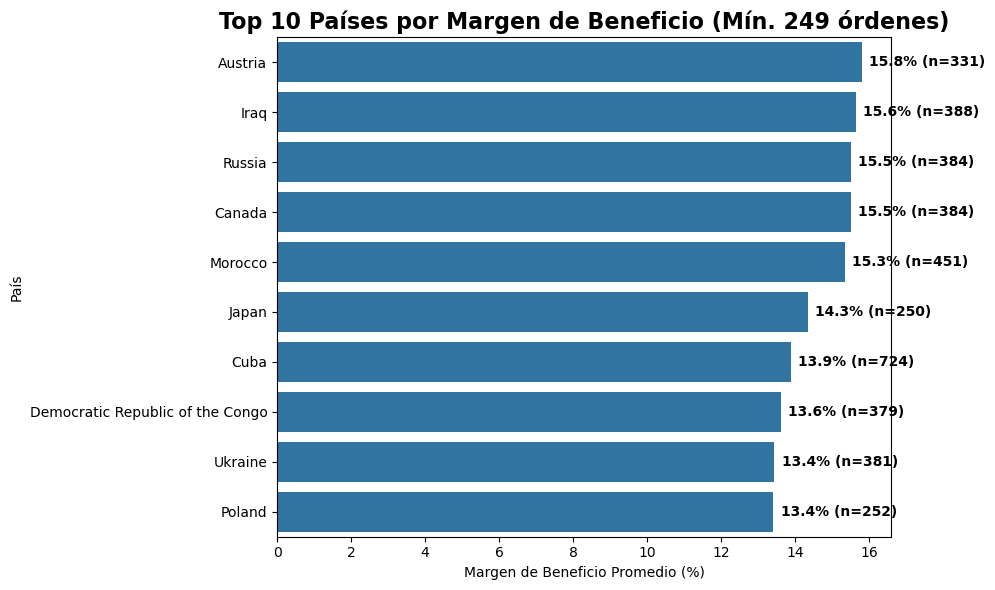

In [68]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_paises['Profit_Margin'], y=top_10_paises['Country'])
plt.title('Top 10 Países por Margen de Beneficio (Mín. 249 órdenes)', fontsize=16, fontweight='bold')
plt.xlabel('Margen de Beneficio Promedio (%)')
plt.ylabel('País')

for i, (margin, count) in enumerate(zip(top_10_paises['Profit_Margin'], top_10_paises['Cant_Ordenes'])):
    ax.text(margin + 0.2, i, f'{margin:.1f}% (n={count})', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [69]:
# TOP 10 Paises con mayor porcentaje de participación en ventas.

paises_participacion = paises_stats_filtrado.sort_values('%_part_total_sales', ascending=False).head(10)

paises_participacion

,Country,total_profit,total_sales,Cant_Ordenes,Profit_Margin,%_part_total_sales
156,United States,46385.23130,2.297201e+06,9994,2.02,18.17
6,Australia,3402.41300,9.252359e+05,2837,0.37,7.32
50,France,13543.19300,8.589311e+05,2827,1.58,6.79
30,China,71671.06500,7.005620e+05,1880,10.23,5.54
54,Germany,43247.23550,6.281362e+05,2063,6.89,4.97
94,Mexico,34722.42552,6.215526e+05,2635,5.59,4.92
66,India,67210.16500,5.894860e+05,1554,11.40,4.66
155,United Kingdom,58251.87600,5.285763e+05,1633,11.02,4.18
67,Indonesia,-28437.94610,4.048875e+05,1390,-7.02,3.20
20,Brazil,-8534.37904,3.599249e+05,1593,-2.37,2.85


# Analisis de Rentabilidad y Estrategia Geográfica por País

El análisis por país revela mercados de alto valor y zonas de riesgo, distinguiendo entre el volumen de ventas y la eficiencia económica.

---

## Mercados Estratégicos de Alta Rentabilidad y Escala

* **Países Clave:** **Austria, Iraq, Rusia y Canadá** lideran en eficiencia económica.
* **Desempeño Sostenido:** Estos mercados presentan rentabilidades **superiores al 15%** y mantienen un **volumen de órdenes significativo ($\ge 250$)**.
* **Implicación:** Su alto desempeño no es circunstancial, sino **sostenido** al combinar eficiencia económica con escala operativa.
* **Recomendación:** Priorizar estos mercados en **estrategias de expansión**, reposición de inventario y campañas comerciales para maximizar su contribución al margen global.

---

## Mercados con Problemas Estructurales (Márgenes Negativos)

* **Países con Pérdidas:** **República Dominicana, Filipinas, Tailandia y Honduras**.
* **Causa del Problema:** A pesar de superar el umbral de órdenes (volumen), muestran **márgenes negativos**. Esto indica que las pérdidas no se deben a la baja rotación, sino a **problemas estructurales** como *pricing* deficiente, altos costos logísticos o demanda ineficiente.
* **Recomendación:** Se requiere una **revisión urgente de la estrategia comercial** en estos mercados, evaluar ajustes de precios y analizar la viabilidad a largo plazo de mantener operaciones activas.

---

## Pilares del Negocio por Volumen de Ventas

* **Líderes de Ventas:** **Estados Unidos** lidera ampliamente en participación de ventas totales, seguido por **Australia, Francia y Alemania**.
* **Rol:** Estos países concentran una proporción significativa del volumen global, consolidándose como los **pilares de la facturación** del negocio.
* **Recomendación:** Requieren **monitoreo constante** y una **optimización continua** en su cadena de suministro, *pricing* y estrategias de marketing para sostener el negocio.

---

## Oportunidades en Mercados Secundarios y Disociación

* **Disociación Volumen-Rentabilidad:** La alta participación de ventas en algunos países **no se traduce en alta rentabilidad**, evidenciando una disociación entre el volumen transaccionado y la eficiencia económica. Se recomienda un **análisis cruzado** para detectar oportunidades de mejora.
* **Mercados de Escalabilidad:** Países como **Japón, Cuba, Ucrania y Polonia** aparecen en el ranking de rentabilidad con volúmenes moderados. Esto sugiere que son **mercados secundarios** con un buen desempeño económico que podrían escalar si se les asignan recursos estratégicos.

# ANALISIS TEMPORAL

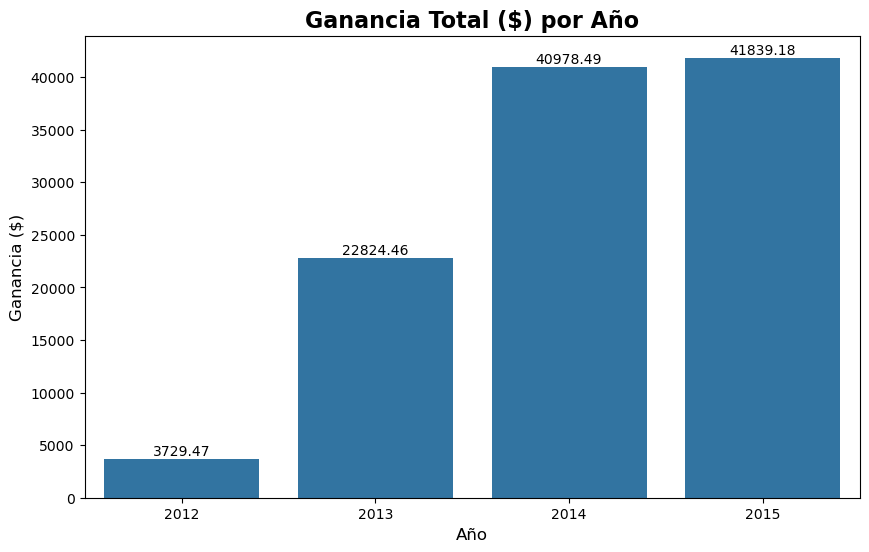

In [70]:
# calcumaos Ganacia Total por Año.

year_profit = df_limpio.groupby('Order Year').agg(
        total_sales=('Sales', 'sum'),
        total_profit=('Net Profit', 'sum')
).round(2)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=year_profit.index, y=year_profit['total_profit'])
plt.title('Ganancia Total ($) por Año', fontsize=16, fontweight='bold')
plt.ylabel('Ganancia ($)', fontsize=12)
plt.xlabel('Año', fontsize=12)

for i, v in enumerate(year_profit['total_profit']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

In [71]:
# Calculamos Margen de Ganancia por Año.

year_profit_sales = year_profit.reset_index()

year_profit_sales['Profit Margin'] = ((year_profit_sales['total_profit'] / year_profit_sales['total_sales']) * 100).round(2)

year_profit_sales.head()

,Order Year,total_sales,total_profit,Profit Margin
0,2012,2259450.90,3729.47,0.17
1,2013,2677438.69,22824.46,0.85
2,2014,3405746.45,40978.49,1.20
3,2015,4299865.87,41839.18,0.97


In [72]:
crecimiento_anual = (year_profit_sales['Profit Margin'].pct_change() * 100).reset_index()

print("Crecimiento interanual del margen:")
crecimiento_anual

Crecimiento interanual del margen:


,index,Profit Margin
0,0,NaN
1,1,400.000000
2,2,41.176471
3,3,-19.166667


In [73]:
# Analizamos la tendencia del margen de beneficio a lo largo del tiempo:

df_limpio['Year-Month'] = df_limpio['Order Date'].dt.to_period('M').astype(str)

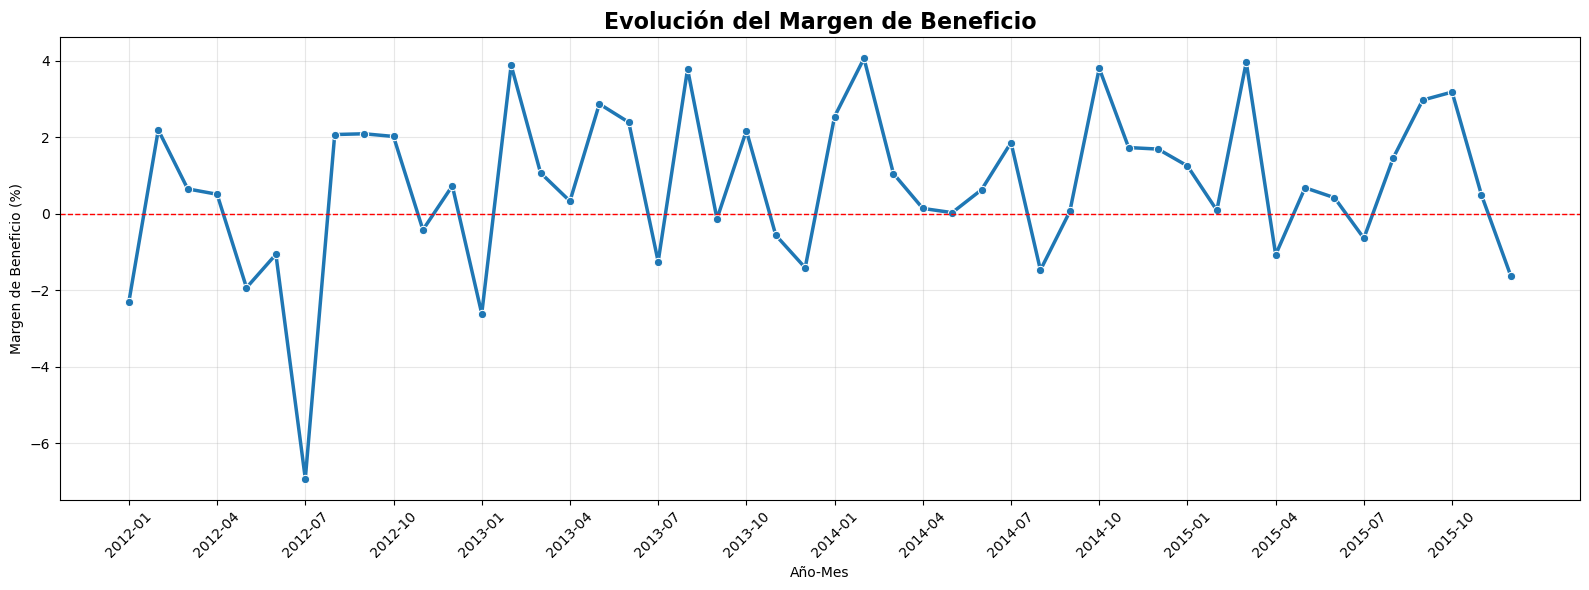

In [74]:
tendencia_year_month = df_limpio.groupby('Year-Month').agg(
             total_sales=('Sales', 'sum'),
             total_profit=('Net Profit', 'sum')
).round(2)

tendencia_year_month['Profit Margin'] = ((tendencia_year_month['total_profit'] / tendencia_year_month['total_sales']) * 100).round(2)

plt.figure(figsize=(16, 6))
sns.lineplot(data=tendencia_year_month, x='Year-Month', y='Profit Margin', marker='o', linewidth=2.5)
plt.title('Evolución del Margen de Beneficio', fontsize=16, fontweight='bold')
plt.ylabel('Margen de Beneficio (%)')
plt.xlabel('Año-Mes')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xticks(rotation=45, ticks=range(0, len(tendencia_year_month), 3))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [75]:
# TOP 10 meses como mayor Margen de Ganancia.

top_10_rentabilidad = tendencia_year_month.sort_values(by='Profit Margin', ascending=False).head(10)

top_10_rentabilidad

,total_sales,total_profit,Profit Margin
Year-Month,,,
2014-02,167239.65,6789.65,4.06
2015-03,263100.77,10424.62,3.96
2013-02,98854.96,3833.71,3.88
2014-10,293406.64,11160.54,3.80
2013-08,303142.94,11445.15,3.78
2015-10,422766.63,13429.42,3.18
2015-09,481157.24,14267.02,2.97
2013-05,208364.89,5988.09,2.87
2014-01,199185.91,5064.13,2.54


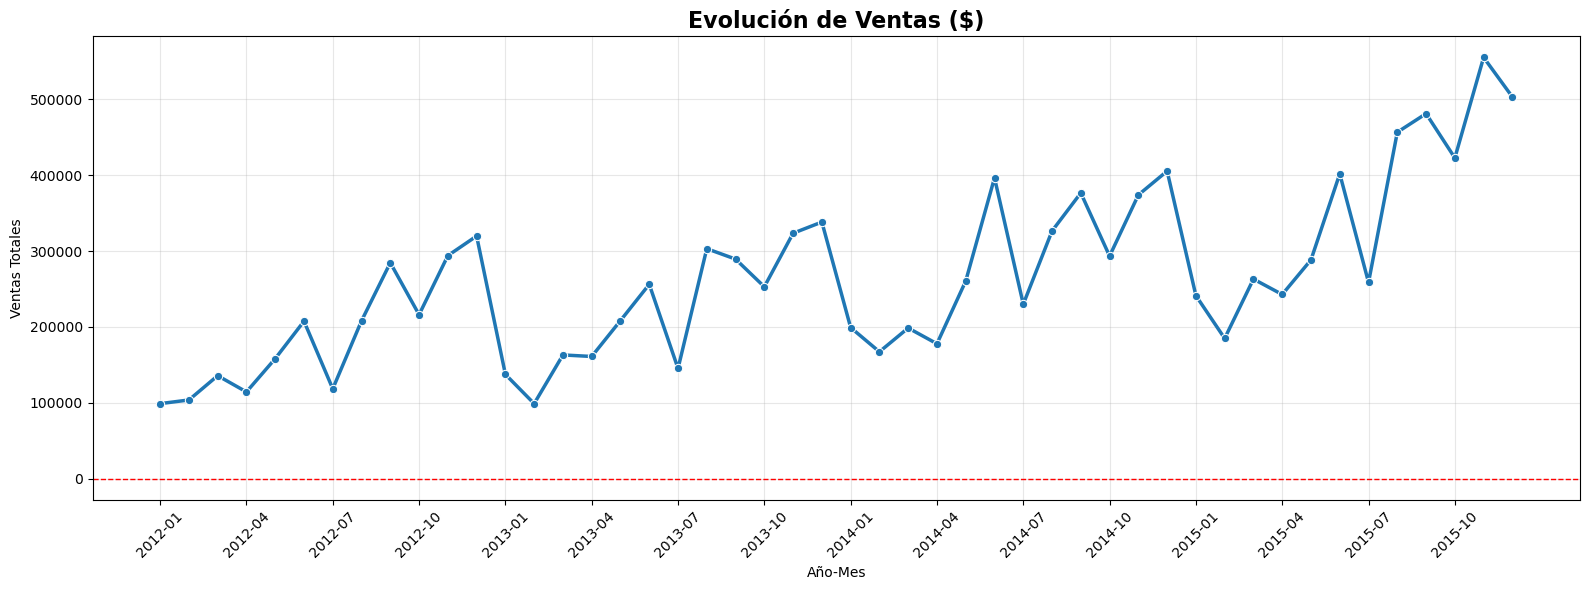

In [76]:
ventas_mensuales = df_limpio.groupby('Year-Month')['Sales'].sum().reset_index()

plt.figure(figsize=(16,6))
sns.lineplot(data=ventas_mensuales, x='Year-Month', y='Sales', marker='o', linewidth=2.5)
plt.title('Evolución de Ventas ($)', fontsize=16, fontweight='bold')
plt.ylabel('Ventas Totales')
plt.xlabel('Año-Mes')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xticks(rotation=45, ticks=range(0, len(ventas_mensuales), 3))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


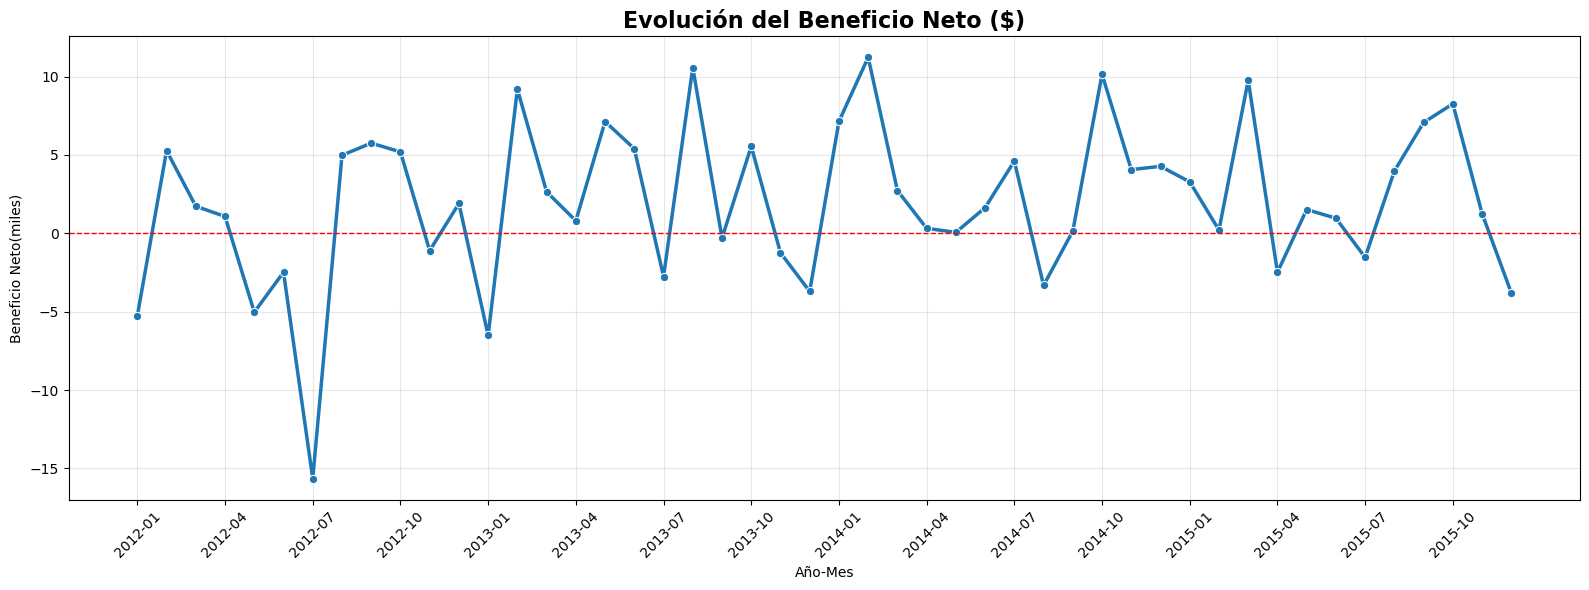

In [77]:
profit_mensual = df_limpio.groupby('Year-Month')['Net Profit'].mean().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=profit_mensual, x='Year-Month', y='Net Profit', marker='o', linewidth=2.5)
plt.title('Evolución del Beneficio Neto ($)', fontsize=16, fontweight='bold')
plt.ylabel('Beneficio Neto(miles)')
plt.xlabel('Año-Mes')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xticks(rotation=45, ticks=range(0, len(profit_mensual), 3))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

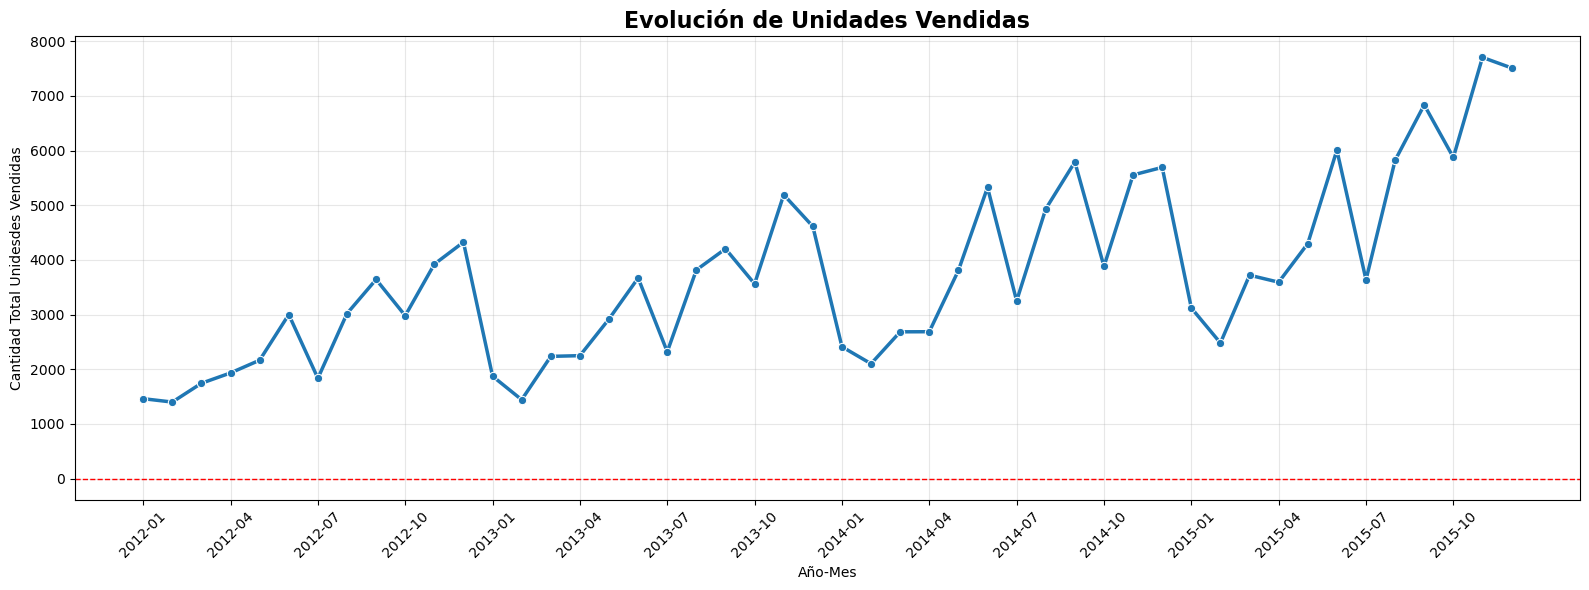

In [78]:
ventas_mensuales_cantidad = df_limpio.groupby('Year-Month')['Quantity'].sum().reset_index()

plt.figure(figsize=(16,6))
sns.lineplot(data=ventas_mensuales_cantidad, x='Year-Month', y='Quantity', marker='o', linewidth=2.5)
plt.title('Evolución de Unidades Vendidas', fontsize=16, fontweight='bold')
plt.ylabel('Cantidad Total Unidesdes Vendidas')
plt.xlabel('Año-Mes')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xticks(rotation=45, ticks=range(0, len(ventas_mensuales_cantidad), 3))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [79]:
df_mensual_analisis = tendencia_year_month.copy().reset_index()

df_mensual_analisis['Año'] = df_mensual_analisis['Year-Month'].str.split('-').str[0].astype(int)
df_mensual_analisis['Mes'] = df_mensual_analisis['Year-Month'].str.split('-').str[1].astype(int)

df_mensual_analisis.head()

,Year-Month,total_sales,total_profit,Profit Margin,Año,Mes
0,2012-01,98898.49,-2274.99,-2.30,2012,1
1,2012-02,103717.92,2271.74,2.19,2012,2
2,2012-03,135746.40,882.13,0.65,2012,3
3,2012-04,114332.96,580.06,0.51,2012,4
4,2012-05,158228.33,-3047.68,-1.93,2012,5


In [80]:
df_limpio['Quarter'] = df_limpio['Order Date'].dt.quarter
df_limpio['Year-Quarter'] = df_limpio['Order Year'].astype(str) + '-Q' + df_limpio['Quarter'].astype(str)

In [81]:
ventas_trimestrales = df_limpio.groupby('Year-Quarter')['Sales'].sum().reset_index()

ventas_trimestrales.head()

,Year-Quarter,Sales
0,2012-Q1,338362.81420
1,2012-Q2,480132.83550
2,2012-Q3,611085.91680
3,2012-Q4,829869.32904
4,2013-Q1,399367.70838


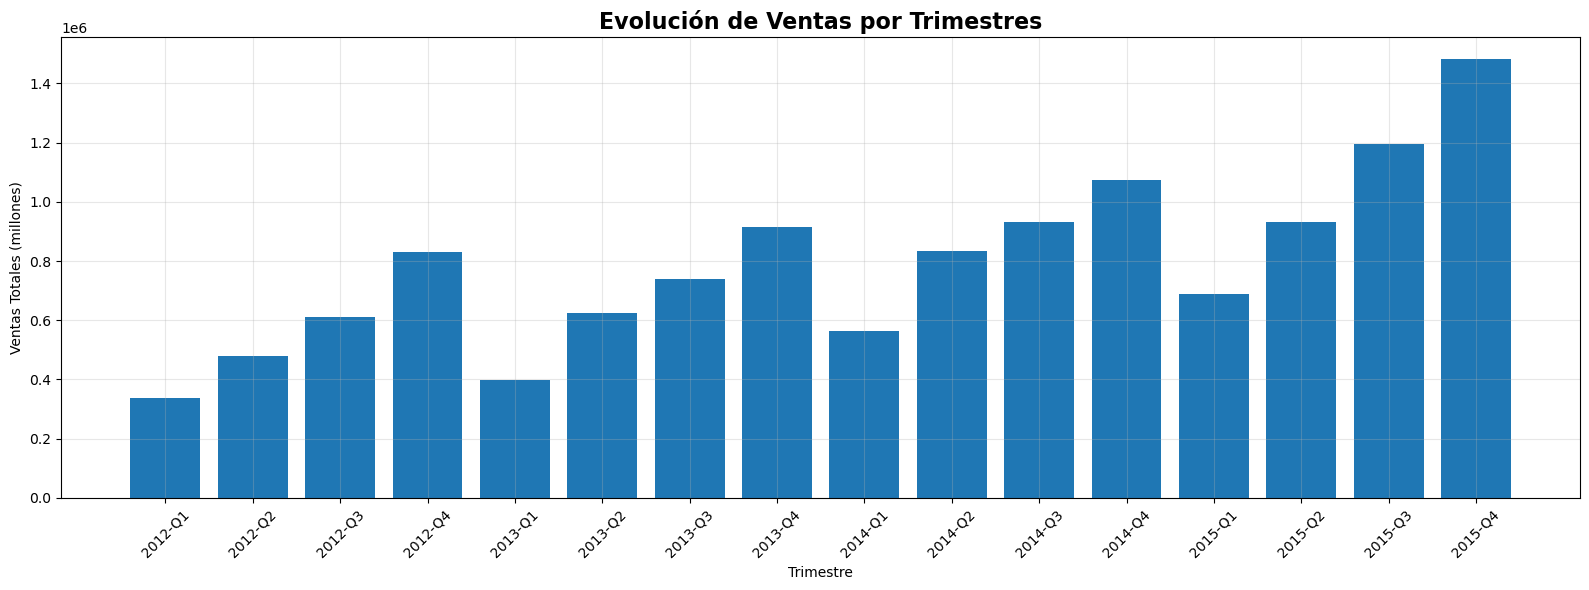

In [82]:
plt.figure(figsize=(16, 6))
plt.bar(ventas_trimestrales['Year-Quarter'], ventas_trimestrales['Sales'])
plt.title('Evolución de Ventas por Trimestres', fontsize=16, fontweight='bold')
plt.ylabel('Ventas Totales (millones)')
plt.xlabel('Trimestre')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [83]:
profit_trimestrales = df_limpio.groupby('Year-Quarter').agg(
        total_sales=('Sales', 'sum'),
        total_profit=('Net Profit', 'sum')
).reset_index()

profit_trimestrales['profit_margin'] = ((profit_trimestrales['total_profit'] / profit_trimestrales['total_sales']) * 100).round(2)

profit_trimestrales

,Year-Quarter,total_sales,total_profit,profit_margin
0,2012-Q1,3.383628e+05,878.88430,0.26
1,2012-Q2,4.801328e+05,-4671.17930,-0.97
2,2012-Q3,6.110859e+05,2062.32010,0.34
3,2012-Q4,8.298693e+05,5459.44094,0.66
4,2013-Q1,3.993677e+05,1998.39138,0.50
5,2013-Q2,6.255929e+05,12646.44558,2.02
6,2013-Q3,7.377689e+05,9258.10434,1.25
7,2013-Q4,9.147092e+05,-1078.48620,-0.12
8,2014-Q1,5.650196e+05,13944.53840,2.47
9,2014-Q2,8.348395e+05,2825.67494,0.34


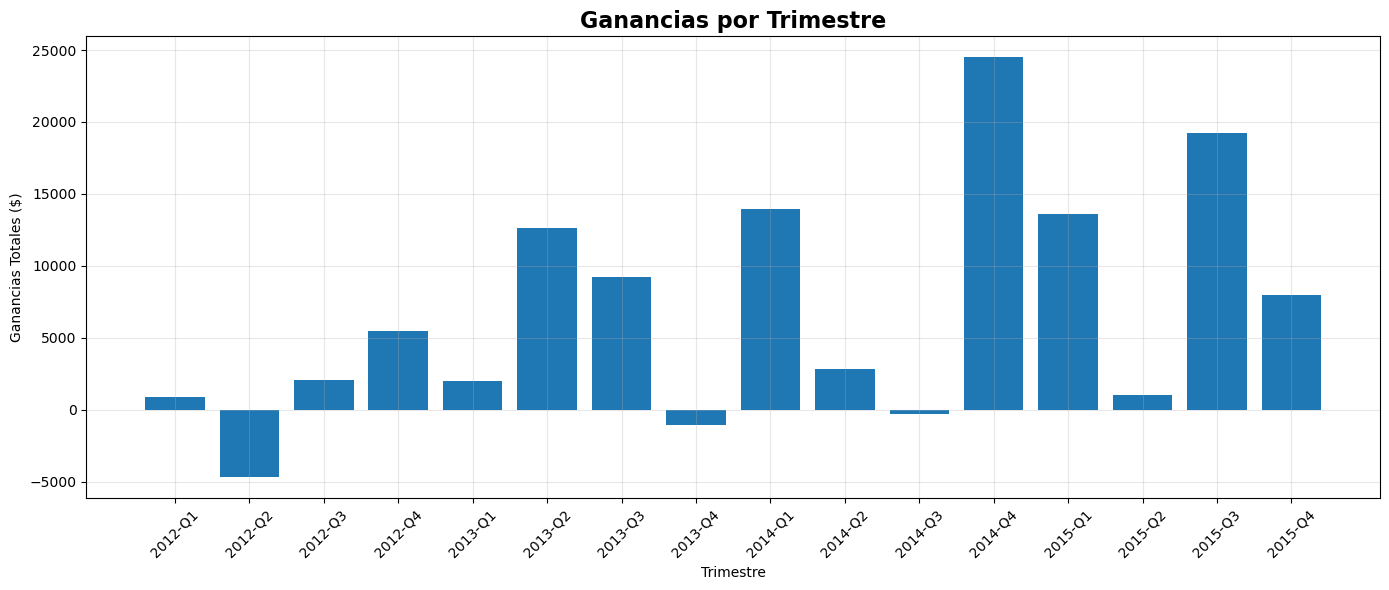

In [84]:
plt.figure(figsize=(14, 6))
plt.bar(profit_trimestrales['Year-Quarter'], profit_trimestrales['total_profit'])
plt.title('Ganancias por Trimestre', fontsize=16, fontweight='bold')
plt.ylabel('Ganancias Totales ($)')
plt.xlabel('Trimestre')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [85]:
comparar_trimestres = profit_trimestrales.copy()

comparar_trimestres['Year'] = comparar_trimestres['Year-Quarter'].str[:4]
comparar_trimestres['Quarter'] = comparar_trimestres['Year-Quarter'].str[-2:]

comparar_trimestres = comparar_trimestres.drop(columns='Year-Quarter', axis=1)

comparar_trimestres

,total_sales,total_profit,profit_margin,Year,Quarter
0,3.383628e+05,878.88430,0.26,2012,Q1
1,4.801328e+05,-4671.17930,-0.97,2012,Q2
2,6.110859e+05,2062.32010,0.34,2012,Q3
3,8.298693e+05,5459.44094,0.66,2012,Q4
4,3.993677e+05,1998.39138,0.50,2013,Q1
5,6.255929e+05,12646.44558,2.02,2013,Q2
6,7.377689e+05,9258.10434,1.25,2013,Q3
7,9.147092e+05,-1078.48620,-0.12,2013,Q4
8,5.650196e+05,13944.53840,2.47,2014,Q1
9,8.348395e+05,2825.67494,0.34,2014,Q2


In [86]:
# Pivotear para tener años como columnas y trimestres como índice

pivot_trimestres = comparar_trimestres.pivot(index='Quarter', columns='Year', values='profit_margin').sort_index()

pivot_trimestres

Year,2012,2013,2014,2015
Quarter,,,,
Q1,0.26,0.50,2.47,1.97
Q2,-0.97,2.02,0.34,0.11
Q3,0.34,1.25,-0.03,1.61
Q4,0.66,-0.12,2.28,0.54


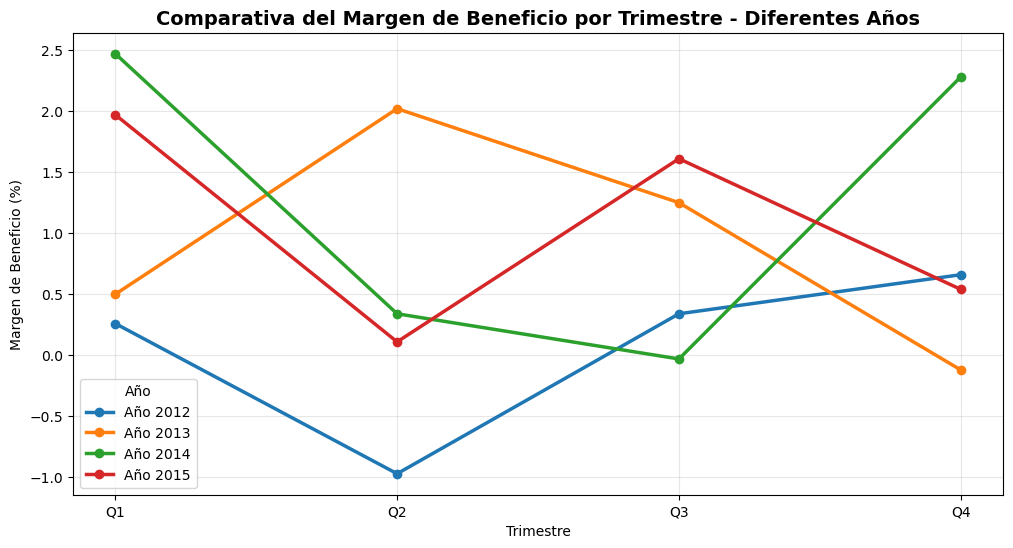

In [87]:
plt.figure(figsize=(12, 6))
for year in pivot_trimestres.columns:
    plt.plot(pivot_trimestres.index, pivot_trimestres[year], marker='o', label=f'Año {year}', linewidth=2.5)

plt.title('Comparativa del Margen de Beneficio por Trimestre - Diferentes Años', fontsize=14, fontweight='bold')
plt.xlabel('Trimestre')
plt.ylabel('Margen de Beneficio (%)')
plt.legend(title='Año')
plt.grid(True, alpha=0.3)
plt.show()

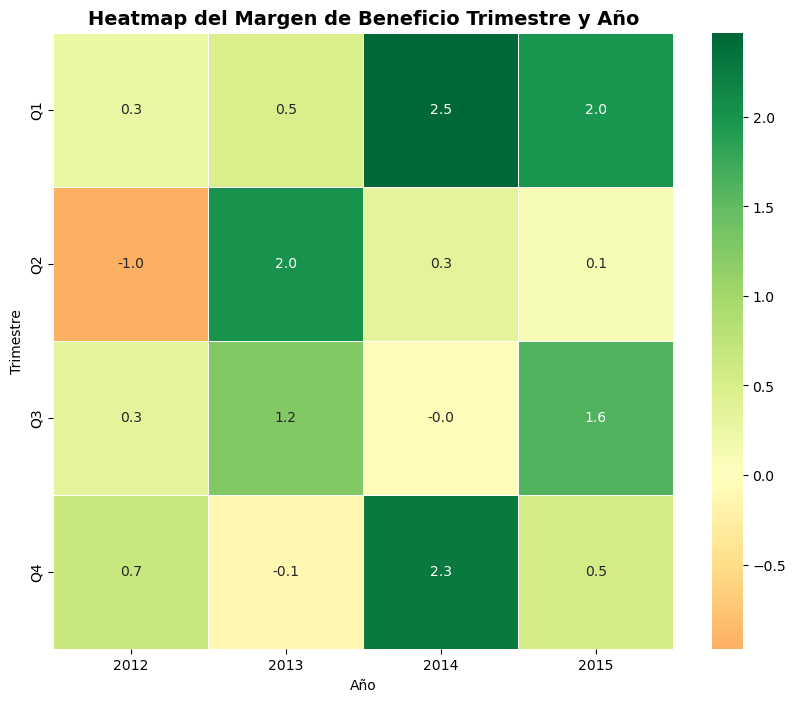

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_trimestres, annot=True, cmap='RdYlGn', center=0, 
            fmt='.1f', linewidths=0.5)
plt.title('Heatmap del Margen de Beneficio Trimestre y Año', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Trimestre')
plt.show()

In [89]:
margen_mensual_total = df_limpio.groupby('Order Month').agg(
           total_sales=('Sales', 'sum'),
           total_profit=('Net Profit', 'sum')
).round(2).reset_index()

margen_mensual_total['Profit Margin'] = ((margen_mensual_total['total_profit'] / margen_mensual_total['total_sales']) * 100).round(2)


margen_mensual_total

,Order Month,total_sales,total_profit,Profit Margin
0,1,676788.93,2215.27,0.33
1,2,554649.89,13054.00,2.35
2,3,760517.98,15149.66,1.99
3,4,695978.41,-1250.45,-0.18
4,5,915492.83,4954.86,0.54
5,6,1262080.92,8120.61,0.64
6,7,752306.30,-7420.86,-0.99
7,8,1294314.96,17612.70,1.36
8,9,1431753.40,20096.11,1.40
9,10,1185227.69,34445.93,2.91


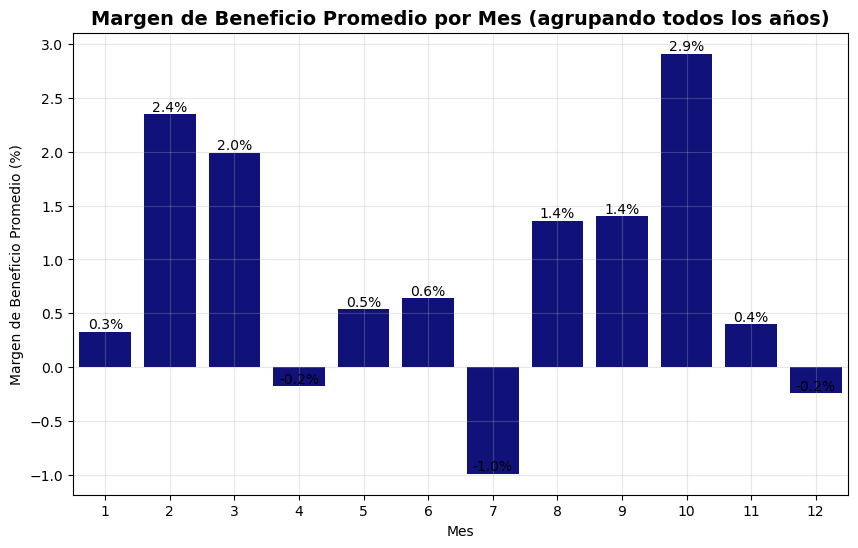

In [90]:
# Promedio de margen por mes (agrupando todos los años)

margen_mensual_total = df_limpio.groupby('Order Month').agg(
           total_sales=('Sales', 'sum'),
           total_profit=('Net Profit', 'sum')
).round(2).reset_index()

margen_mensual_total['Profit Margin'] = ((margen_mensual_total['total_profit'] / margen_mensual_total['total_sales']) * 100).round(2)

plt.figure(figsize=(10, 6))
ax= sns.barplot(x=margen_mensual_total['Order Month'], y=margen_mensual_total['Profit Margin'], color='darkblue')
plt.title('Margen de Beneficio Promedio por Mes (agrupando todos los años)', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Margen de Beneficio Promedio (%)')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

for i, v in enumerate(margen_mensual_total['Profit Margin']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
    
plt.show()

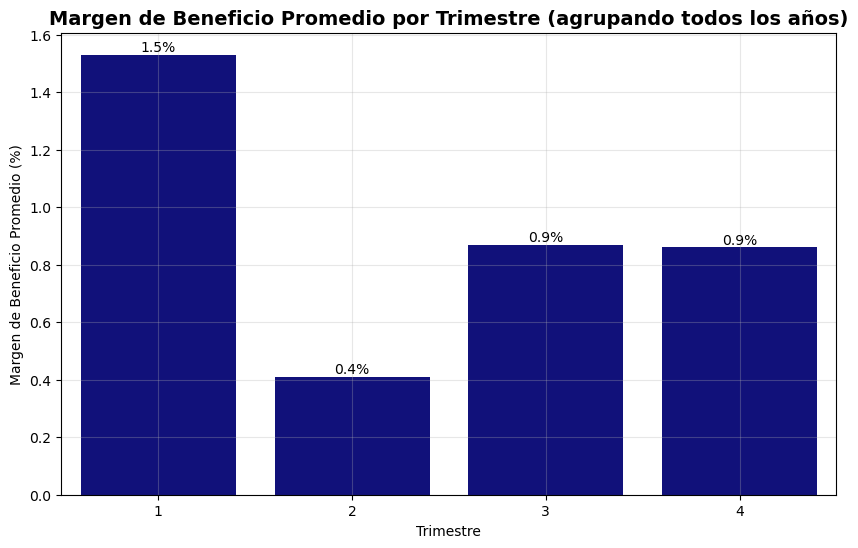

In [91]:
# Promedio de margen por Trimestre (agrupando todos los años)

margen_trimestre_total = df_limpio.groupby('Quarter').agg(
           total_sales=('Sales', 'sum'),
           total_profit=('Net Profit', 'sum')
).round(2).reset_index()

margen_trimestre_total['Profit Margin'] = ((margen_trimestre_total['total_profit'] / margen_trimestre_total['total_sales']) * 100).round(2)


plt.figure(figsize=(10, 6))
ax= sns.barplot(x=margen_trimestre_total['Quarter'], y=margen_trimestre_total['Profit Margin'], color='darkblue')
plt.title('Margen de Beneficio Promedio por Trimestre (agrupando todos los años)', fontsize=14, fontweight='bold')
plt.xlabel('Trimestre')
plt.ylabel('Margen de Beneficio Promedio (%)')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

for i, v in enumerate(margen_trimestre_total['Profit Margin']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
    
plt.show()

# Analisis de Tendencias Temporales y Estacionalidad

El desempeño financiero del negocio muestra una tendencia de crecimiento en ventas, pero con una rentabilidad inconsistente y altamente influenciada por factores estacionales y tácticos.

---

## Tendencia General de Ventas y Beneficio

* **Crecimiento de Ventas:** Las ventas totales muestran una **tendencia ascendente clara** entre 2014 y 2018, con picos destacados de volumen en el **Q4 (cuarto trimestre)** de cada año.
* **Volatilidad del Beneficio:** El beneficio neto acompaña este crecimiento, aunque presenta una **mayor volatilidad**.

---

## Evolución y Desaceleración del Margen Anual

* **Crecimiento Inicial:** El margen de beneficio anual creció de 0.17% en 2012 a 1.54% en 2014.
* **Saturación:** Sin embargo, cayó a 1.02% en 2015. El crecimiento interanual muestra una **desaceleración drástica** (pasando de +400% a -19%).
* **Conclusión:** El modelo comercial parece haber alcanzado un **punto de saturación**. Se requiere **innovación en *pricing***, *mix* de productos o estructura de costos para sostener la mejora del margen.

---

## Fluctuaciones de Rentabilidad Mensual y Estacionalidad

* **Alta Volatilidad Mensual:** El margen mensual presenta **fluctuaciones significativas**, con meses por debajo de 0% (ej., julio y diciembre) y picos superiores al 4% (ej., febrero, octubre).
* **Dependencia Táctica:** La rentabilidad está **altamente influenciada por estacionalidad y decisiones tácticas** (promociones, descuentos).
* **Recomendación:** Se recomienda **revisar campañas, descuentos y logística** en meses críticos para mitigar las caídas de margen.

---

## Desempeño por Trimestre y Heatmap

* **Margen Trimestral Promedio:**
    * **Q1:** Mayor margen promedio (**1.5%**).
    * **Q3 y Q4:** Margen moderado (**0.9%**).
    * **Q2:** El más débil (**0.4%**).
* **Prioridad Estratégica:** Las decisiones deben priorizar **Q1 y Q4** para maximizar la rentabilidad. **Q2** requiere una revisión urgente de las condiciones comerciales.
* **Riesgos Históricos (Heatmap):** El *heatmap* revela márgenes negativos en **Q2 de 2012** y **Q4 de 2013**. Estas caídas coinciden con trimestres de baja eficiencia operativa. Es vital identificar las causas específicas (costos, promociones, *mix* de productos) para **evitar repetir pérdidas** en ciclos futuros.

---

## Disociación Volumen vs. Beneficio

* **Desalineación:** La evolución de las unidades vendidas no siempre coincide con los picos de beneficio; algunos meses con alto volumen presentan **márgenes negativos**.
* **Foco Necesario:** Se debe **priorizar productos con mayor margen unitario** y revisar aquellos que están erosionando la rentabilidad a pesar de su alta rotación.

---

## Variabilidad en la Estrategia Anual

* **Inconsistencia Anual:** La evolución por trimestre muestra que 2014 fue el año más rentable en Q4 (2.8%), mientras que 2013 tuvo su pico en Q2 (2.0%).
* **Recomendación:** Parece que cada año se ha ejecutado una estrategia comercial diferente. Sería más eficiente **adaptar la estrategia anual según el comportamiento histórico y la rentabilidad por trimestre** en lugar de seguir un patrón fijo.

# REALIZAMOS UN ANALISIS DE LOS DESCUENTOS

In [92]:
# Vamos a analisar el impacto que el tipo de descuento (%) tiene sobre el margen de beneficio. Creamos bins según tipo de descuento para anlizar por segmentos:

bins = np.arange(0, 1.05, 0.05)

labels = [f"{int(i*100)}-{int(j*100)}%" for i, j in zip(bins[:-1], bins[1:])]

df_limpio['Discount Group'] = pd.cut(
                                df_limpio['Discount'],
                                bins=bins,
                                labels=labels,
                                include_lowest=True
)

In [93]:
descuento_analisis = df_limpio.groupby('Discount Group').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Net Profit', 'sum')
    ).round(2).reset_index()

descuento_analisis['Profit Margin'] = ((descuento_analisis['total_profit'] / descuento_analisis['total_sales']) * 100).round(2)

descuento_analisis.head(20)

C:\Users\nicol\AppData\Local\Temp\ipykernel_9196\640556759.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descuento_analisis = df_limpio.groupby('Discount Group').agg(


,Discount Group,total_sales,total_profit,Profit Margin
0,0-5%,7253806.57,1053073.94,14.52
1,5-10%,1701223.22,95608.48,5.62
2,10-15%,306029.84,-7295.78,-2.38
3,15-20%,1451231.49,-11370.98,-0.78
4,20-25%,104270.99,-10102.55,-9.69
5,25-30%,278283.69,-51719.21,-18.59
6,30-35%,110199.95,-26852.49,-24.37
7,35-40%,591143.18,-213319.68,-36.09
8,40-45%,67125.00,-31495.91,-46.92
9,45-50%,407563.31,-232982.88,-57.16


In [94]:
descuento_analisis['Profit Margin'].isna().sum()

4

In [95]:
descuento_analisis['Profit Margin'] = descuento_analisis['Profit Margin'].fillna(0)

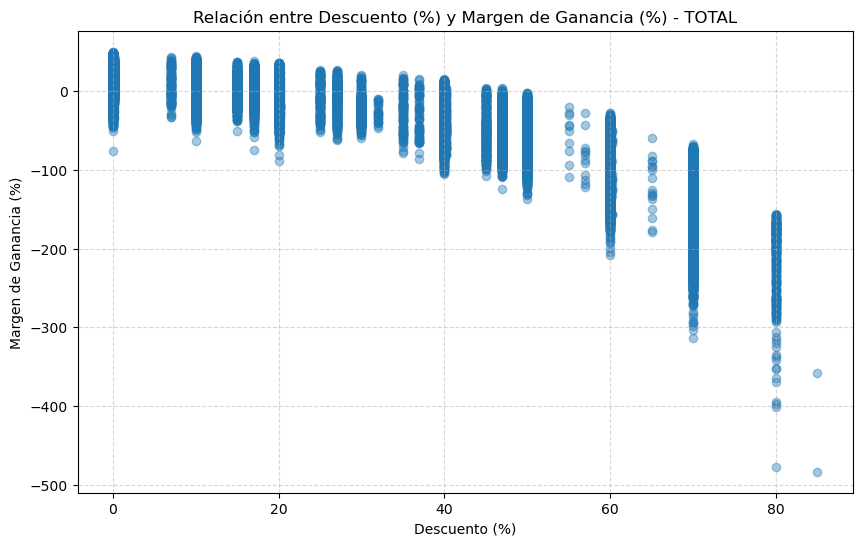

In [96]:
plt.figure(figsize=(10,6))
plt.scatter(
    df_limpio['Discount']*100,
    df_limpio['Profit Margin'],
    alpha=0.4
)
plt.title('Relación entre Descuento (%) y Margen de Ganancia (%) - TOTAL')
plt.xlabel('Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [97]:
df_limpio['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [98]:
descuento_analisis['Discount Group'] = pd.Categorical(
    descuento_analisis['Discount Group'],
    categories=descuento_analisis['Discount Group'].tolist(),
    ordered=True
)

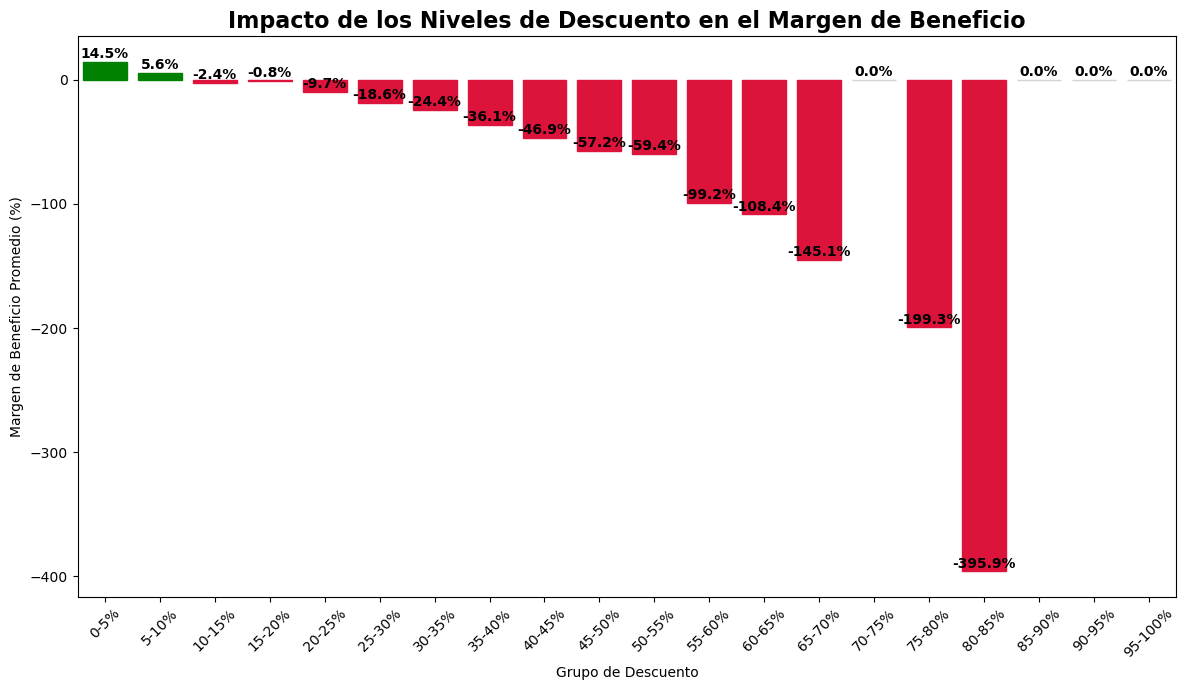

In [99]:
plt.figure(figsize=(12, 7))

colors = ['green' if v > 0 else 'crimson' if v < 0 else 'lightgray' for v in descuento_analisis['Profit Margin']]

ax = sns.barplot(data=descuento_analisis, x='Discount Group', y='Profit Margin', color='lightgray')
plt.title('Impacto de los Niveles de Descuento en el Margen de Beneficio', fontsize=16, fontweight='bold')
plt.ylabel('Margen de Beneficio Promedio (%)')
plt.xlabel('Grupo de Descuento')

for bar, color in zip(ax.patches, colors):
    bar.set_color(color)

for i, v in enumerate(descuento_analisis['Profit Margin']):
    if pd.notna(v): 
        ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Correlación entre los descuentos y el margen de ganancia

correlation = df_limpio[['Discount', 'Profit Margin']].corr()
print(f"Correlación Descuento vs Margen: {correlation.iloc[0,1]:.3f}")

correlation

Correlación Descuento vs Margen: -0.840


,Discount,Profit Margin
Discount,1.000000,-0.840413
Profit Margin,-0.840413,1.000000


# Analisis del Impacto de la Política de Descuentos en el Margen

El nivel de descuento aplicado a las órdenes es el **factor más crítico** que determina la rentabilidad, con un impacto negativo que se vuelve exponencial a partir del umbral del 10%.

---

## Rangos de Descuento Rentables (Prioridad)

* **Descuentos 0% – 10%:** El margen promedio es consistentemente **positivo** (entre +5% y +14%).
* **Recomendación:** Este rango debe ser **priorizado en campañas y estrategias de *pricing***, ya que genera volumen y sostiene la rentabilidad.

## Umbral Crítico y Pérdida Exponencial

* **Punto de Inflexión:** A partir de descuentos del **10% – 15%**, el margen promedio se vuelve **negativo** y empeora de forma exponencial conforme el descuento aumenta.
* **Recomendación:** Se debe **limitar el uso de descuentos por encima del 10%**, salvo en contextos promocionales muy controlados y estratégicos.

## Rangos de Descuento Catastróficos (Eliminación)

* **Descuentos Altos (>50%):** Los márgenes son **catastróficos** (entre -60% y -400%), evidenciando pérdidas netas por cada venta realizada.
* **Descuentos Extremos (>70%):** Estos niveles registran bajas transacciones, pero con márgenes negativos extremos (hasta -395%), resultando en un **impacto devastador** en el beneficio.
* **Acción Urgente:** Estos niveles de descuento deben ser **eliminados de la política comercial**, ya que no aportan valor al negocio y generan pérdidas estructurales.


In [100]:
df_limpio['Year-Month'] = df_limpio['Year-Month'].astype(str)

In [101]:
df_limpio['Discount'].isnull().sum()

0

In [102]:
df_limpio['Discount'].describe()

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64

In [103]:
df_descuentos = df_limpio[df_limpio['Discount'] > 0]

In [104]:
df_descuentos.shape

(22281, 33)

In [105]:
df_descuentos.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Order Priority,Net Profit,Profit Margin,Shipping Time (days),Order Year,Order Month,Year-Month,Quarter,Year-Quarter,Discount Group
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Critical,-1212.3950,-32.684440,2,2014,2,2014-02,1,2014-Q1,5-10%
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Medium,4.4810,0.086587,1,2014,10,2014-10,4,2014-Q4,5-10%
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Medium,-1006.7000,-34.803683,2,2014,1,2014-01,1,2014-Q1,5-10%
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,Critical,-134.0750,-4.683556,3,2014,6,2014-06,2,2014-Q2,5-10%
9,36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,High,-5.6499,-11.598579,1,2012,3,2012-03,1,2012-Q1,15-20%


In [106]:
# Calculamos la cantidad de transacciones con descuento y el promedio de los descuentos por mes.

descuentos_mensual = df_limpio.groupby('Year-Month').agg(
    total_transacciones = ('Discount', 'size'),
    transacciones_con_descuento = ('Discount', lambda x: (x > 0).sum()),
    promedio_descuento_mensual = ('Discount', lambda x: (x[x > 0].mean() * 100).round(2))
)

descuentos_mensual['%_transacciones_con_descuento'] = ((descuentos_mensual['transacciones_con_descuento'] / descuentos_mensual['total_transacciones']) * 100).round(2)

descuentos_mensual = descuentos_mensual.reset_index()

descuentos_mensual.head()

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento
0,2012-01,433,177,38.85,40.88
1,2012-02,431,163,35.70,37.82
2,2012-03,511,240,30.95,46.97
3,2012-04,539,213,35.11,39.52
4,2012-05,606,259,33.77,42.74


In [107]:
# Agregar métricas de ventas, ganancias y cantidad

metricas_mensuales = df_limpio.groupby('Year-Month').agg(
    ventas_totales_mes=('Sales', 'sum'),
    ganancia_total_mes=('Net Profit', 'sum'),
    cantidad_total_mes=('Quantity', 'sum')
).round(2).reset_index()

# Unir con tu tabla de descuentos
analisis_mensual = descuentos_mensual.merge(metricas_mensuales, on='Year-Month', how='left')

# Calcular margen sobre ventas (%)

analisis_mensual['Profit Margin'] = (analisis_mensual['ganancia_total_mes'] / analisis_mensual['ventas_totales_mes'] * 100).round(2)

analisis_mensual.head()



,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin
0,2012-01,433,177,38.85,40.88,98898.49,-2274.99,1463,-2.30
1,2012-02,431,163,35.70,37.82,103717.92,2271.74,1401,2.19
2,2012-03,511,240,30.95,46.97,135746.40,882.13,1745,0.65
3,2012-04,539,213,35.11,39.52,114332.96,580.06,1934,0.51
4,2012-05,606,259,33.77,42.74,158228.33,-3047.68,2167,-1.93


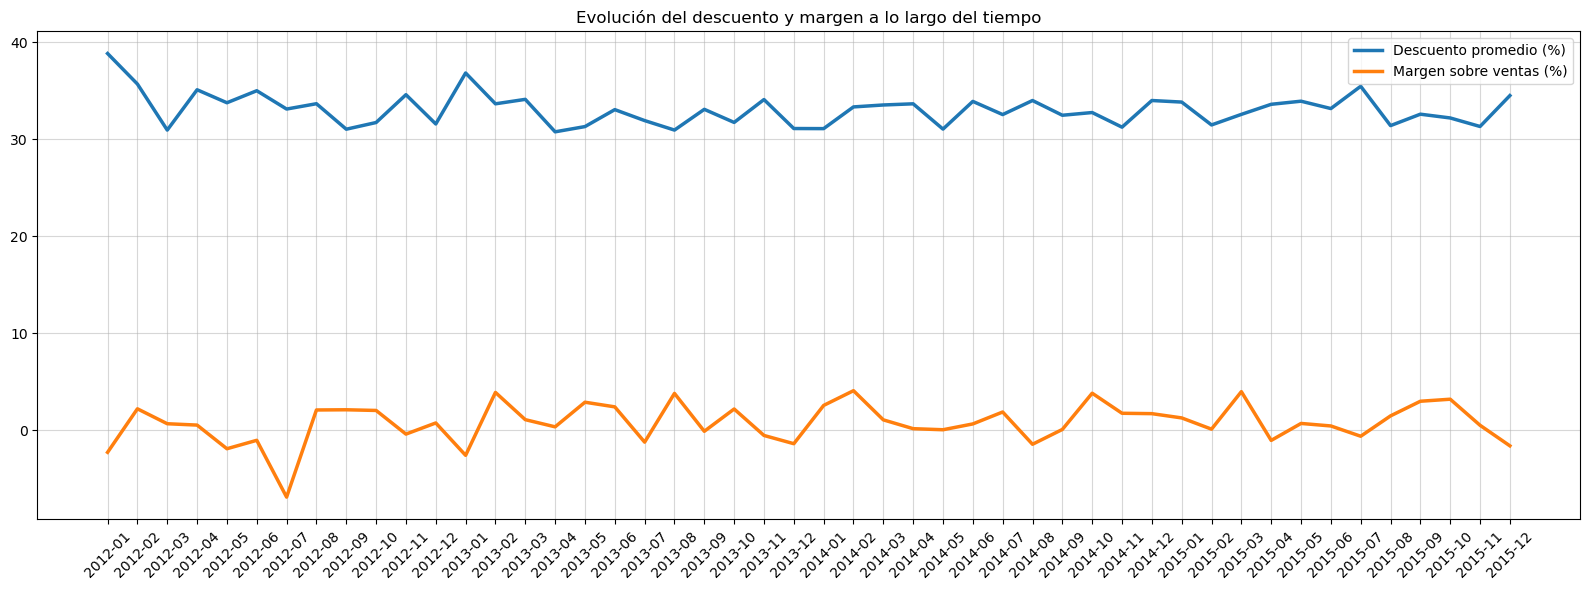

In [108]:
plt.figure(figsize=(16,6))
plt.plot(analisis_mensual['Year-Month'], analisis_mensual['promedio_descuento_mensual'], label='Descuento promedio (%)', linewidth=2.5)
plt.plot(analisis_mensual['Year-Month'], analisis_mensual['Profit Margin'], label='Margen sobre ventas (%)', linewidth=2.5)
plt.xticks(rotation=45)
plt.title("Evolución del descuento y margen a lo largo del tiempo")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()



# Analisis de Tendencia Histórica de Descuento y Margen

El análisis de la evolución temporal del descuento y el margen revela una falta de estrategia correctiva, manteniendo un alto nivel de riesgo.

---

## Descuento Promedio Consistente

* **Nivel Alto:** El descuento promedio aplicado se mantiene consistentemente alto, oscilando en el rango del **30% – 35%**, con picos que se acercan al 40%.
* **Implicación:** Dado el análisis previo donde los descuentos superiores al 10% causan pérdidas, este alto promedio sostenido es una causa directa de la baja rentabilidad global.

## Estabilidad y Falta de Mejora

* **Estabilidad Sin Mejora:** No se observa una tendencia clara de mejora ni en la reducción de los descuentos ni en el aumento del margen; ambos permanecen relativamente estables a lo largo del tiempo, con fluctuaciones menores.
* **Conclusión:** La estrategia comercial actual está **estancada**. La falta de acción para reducir el descuento promedio o mejorar el margen indica que el negocio está operando continuamente en un rango de alta vulnerabilidad.

---

**Recomendación:** Es fundamental implementar **políticas agresivas de reducción de descuentos** y optimización de costos para sacar el margen de su zona de estabilidad baja.

# Resumen de Insights: Relación Crítica entre Descuento y Margen

El análisis de la evolución histórica y el impacto directo de los descuentos establecen una relación de causalidad clara con la baja rentabilidad del negocio.

## Conclusiones Clave sobre la Política de Descuentos:

* **Erosión Directa:** Los **altos niveles de descuento sostenidos** en el tiempo son la causa directa de la erosión de la rentabilidad, explicando los márgenes negativos o cercanos a cero.
* **Falta de Control:** La ausencia de una tendencia descendente en el descuento promedio sugiere que **no ha habido políticas efectivas** de control de precios o promociones implementadas.
* **Relación Comprobada:** Los períodos donde el descuento baja ligeramente (ej., entre 2013 y 2014) muestran una **mejora marginal en el margen**, confirmando la relación inversa y directa entre ambos indicadores.
* **Umbral Crítico de Pérdida:** Existe un **umbral crítico de descuento (~10%)** a partir del cual la rentabilidad colapsa y las órdenes comienzan a generar pérdidas.
* **Inviabilidad de Descuentos Agresivos:** Los descuentos agresivos (**>40%**) son completamente insostenibles y deben **eliminarse**, reservándose únicamente para casos de liquidación o descontinuación de inventario.
* **Relación No Lineal:** La curva de rentabilidad es **fuertemente no lineal**, indicando que pequeñas reducciones en el precio de venta generan pérdidas desproporcionadamente grandes en el margen.

# A ANALISIS MENSUAL SE PUEDE AGREGAR:

  ## QUE HACER CON EL SHIPPING COST?
  ## QUE TIPOS DE CLIENTES COMPRAN CON DESCUENTO? CUANTOS PERTENECEN A CADA CATEGORIA?

In [109]:
ventas_descuentos = df_descuentos.groupby('Year-Month')['Sales'].sum().round(2).reset_index()

ventas_descuentos = ventas_descuentos.rename(columns=
                                             {'Sales': 'ventas_con_descuento'})

ventas_descuentos.head()

,Year-Month,ventas_con_descuento
0,2012-01,33343.11
1,2012-02,35181.23
2,2012-03,74767.67
3,2012-04,52093.84
4,2012-05,67409.43


In [110]:
analisis_mensual = pd.merge(analisis_mensual, ventas_descuentos, how='left', on='Year-Month')

analisis_mensual.head()

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento
0,2012-01,433,177,38.85,40.88,98898.49,-2274.99,1463,-2.30,33343.11
1,2012-02,431,163,35.70,37.82,103717.92,2271.74,1401,2.19,35181.23
2,2012-03,511,240,30.95,46.97,135746.40,882.13,1745,0.65,74767.67
3,2012-04,539,213,35.11,39.52,114332.96,580.06,1934,0.51,52093.84
4,2012-05,606,259,33.77,42.74,158228.33,-3047.68,2167,-1.93,67409.43


In [111]:
# Calculamos el porcentaje de participacion de ventas ($) realizadas con descuentos sobre el total de las ventas del mes.

analisis_mensual['%_ventas_con_desuento'] = ((analisis_mensual['ventas_con_descuento'] / analisis_mensual['ventas_totales_mes'])* 100).round(2)

analisis_mensual.head()

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento
0,2012-01,433,177,38.85,40.88,98898.49,-2274.99,1463,-2.30,33343.11,33.71
1,2012-02,431,163,35.70,37.82,103717.92,2271.74,1401,2.19,35181.23,33.92
2,2012-03,511,240,30.95,46.97,135746.40,882.13,1745,0.65,74767.67,55.08
3,2012-04,539,213,35.11,39.52,114332.96,580.06,1934,0.51,52093.84,45.56
4,2012-05,606,259,33.77,42.74,158228.33,-3047.68,2167,-1.93,67409.43,42.60


In [112]:
# TOP 10 meses con mayor participacion de ventas con descuento (a nivel $):

analisis_mensual.sort_values('%_ventas_con_desuento', ascending=False).head(10)

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento
5,2012-06,888,450,35.01,50.68,207571.54,-2203.56,3002,-1.06,118426.88,57.05
2,2012-03,511,240,30.95,46.97,135746.40,882.13,1745,0.65,74767.67,55.08
37,2015-02,756,353,31.48,46.69,184837.36,158.90,2482,0.09,94564.41,51.16
18,2013-07,659,327,31.93,49.62,145236.79,-1819.05,2321,-1.25,74007.45,50.96
6,2012-07,524,264,33.12,50.38,118434.88,-8199.93,1836,-6.92,58808.92,49.66
39,2015-04,1051,488,33.61,46.43,242771.86,-2608.42,3594,-1.07,119727.54,49.32
46,2015-11,2147,972,31.32,45.27,555279.03,2715.23,7706,0.49,266584.99,48.01
11,2012-12,1218,576,31.58,47.29,319807.41,2319.28,4326,0.73,152483.15,47.68
8,2012-09,1035,437,31.04,42.22,284587.75,5954.82,3644,2.09,135213.51,47.51
20,2013-09,1223,511,33.09,41.78,289389.17,-368.00,4205,-0.13,137461.59,47.50


In [113]:
# TOP 10 meses con menor participacion de ventas con descuento (a nivel $):

analisis_mensual.sort_values('%_ventas_con_desuento', ascending=True).head(10)

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento
13,2013-02,417,179,33.66,42.93,98854.96,3833.71,1444,3.88,29795.35,30.14
0,2012-01,433,177,38.85,40.88,98898.49,-2274.99,1463,-2.30,33343.11,33.71
1,2012-02,431,163,35.70,37.82,103717.92,2271.74,1401,2.19,35181.23,33.92
25,2014-02,605,234,33.34,38.68,167239.65,6789.65,2102,4.06,62668.47,37.47
33,2014-10,1100,491,32.76,44.64,293406.64,11160.54,3883,3.80,121004.82,41.24
38,2015-03,1068,436,32.57,40.82,263100.77,10424.62,3722,3.96,108492.70,41.24
44,2015-09,2018,835,32.59,41.38,481157.24,14267.02,6837,2.97,200429.63,41.66
16,2013-05,840,365,31.31,43.45,208364.89,5988.09,2921,2.87,87691.55,42.09
30,2014-07,925,386,32.55,41.73,229928.95,4265.98,3252,1.86,96832.52,42.11
7,2012-08,865,337,33.67,38.96,208063.28,4307.43,3020,2.07,87651.03,42.13


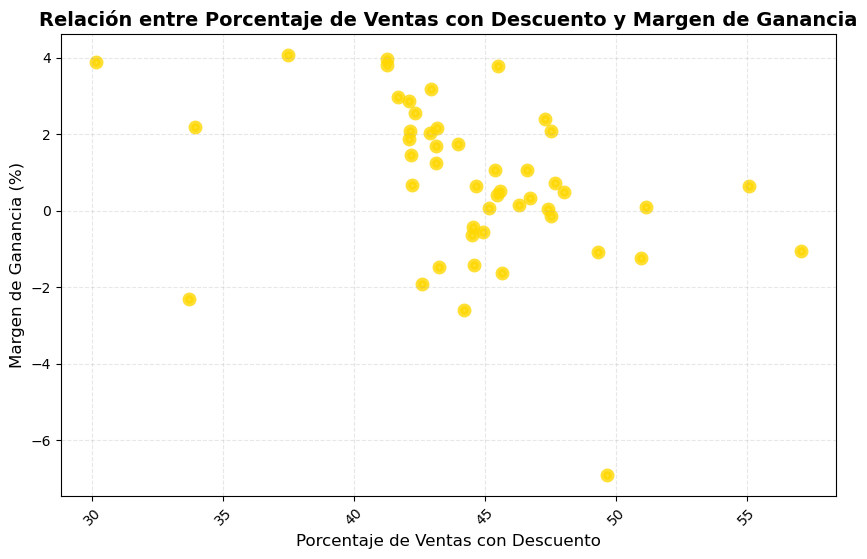

In [114]:
# Relacion entre porcentaje de ventas ($) con desceunto y margen de ganancia.

plt.figure(figsize=(10,6))
plt.scatter(
    analisis_mensual['%_ventas_con_desuento'],
    analisis_mensual['Profit Margin'],
    marker='o',
    linewidth=4,
    color='gold',
    alpha=0.8
)
plt.title('Relación entre Porcentaje de Ventas con Descuento y Margen de Ganancia', 
          fontsize=14, fontweight='bold')
plt.xlabel('Porcentaje de Ventas con Descuento', fontsize=12)
plt.ylabel('Margen de Ganancia (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)

In [115]:
# TOP 10 meses con mayor cantidad absoluta de  transacciones con descuento:

analisis_mensual.sort_values('transacciones_con_descuento', ascending=False).head(10)

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento
46,2015-11,2147,972,31.32,45.27,555279.03,2715.23,7706,0.49,266584.99,48.01
47,2015-12,2153,971,34.51,45.10,503143.69,-8178.37,7513,-1.63,229717.65,45.66
44,2015-09,2018,835,32.59,41.38,481157.24,14267.02,6837,2.97,200429.63,41.66
41,2015-06,1748,758,33.17,43.36,401814.06,1683.53,6009,0.42,182569.34,45.44
32,2014-09,1682,741,32.48,44.05,376619.25,242.27,5793,0.06,170066.79,45.16
45,2015-10,1626,726,32.20,44.65,422766.63,13429.42,5876,3.18,181450.56,42.92
43,2015-08,1675,693,31.41,41.37,456619.94,6652.54,5824,1.46,192537.31,42.17
34,2014-11,1596,689,31.25,43.17,373989.36,6483.83,5556,1.73,164355.33,43.95
35,2014-12,1602,658,34.00,41.07,405454.38,6848.07,5694,1.69,174873.50,43.13
22,2013-11,1460,633,34.10,43.36,323512.42,-1813.02,5193,-0.56,145306.88,44.92


In [116]:
# TOP 10 meses con mayor porcentaje de transacciones con descuentos sobre el total de transacciones:

analisis_mensual.sort_values('%_transacciones_con_descuento', ascending=False).head(10)

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento
5,2012-06,888,450,35.01,50.68,207571.54,-2203.56,3002,-1.06,118426.88,57.05
6,2012-07,524,264,33.12,50.38,118434.88,-8199.93,1836,-6.92,58808.92,49.66
18,2013-07,659,327,31.93,49.62,145236.79,-1819.05,2321,-1.25,74007.45,50.96
11,2012-12,1218,576,31.58,47.29,319807.41,2319.28,4326,0.73,152483.15,47.68
2,2012-03,511,240,30.95,46.97,135746.40,882.13,1745,0.65,74767.67,55.08
37,2015-02,756,353,31.48,46.69,184837.36,158.90,2482,0.09,94564.41,51.16
9,2012-10,840,392,31.73,46.67,216114.57,4363.83,2981,2.02,92662.61,42.88
28,2014-05,1057,493,31.05,46.64,260498.56,65.48,3808,0.03,123462.65,47.39
39,2015-04,1051,488,33.61,46.43,242771.86,-2608.42,3594,-1.07,119727.54,49.32
15,2013-04,657,303,30.77,46.12,161052.27,527.11,2250,0.33,75214.52,46.70


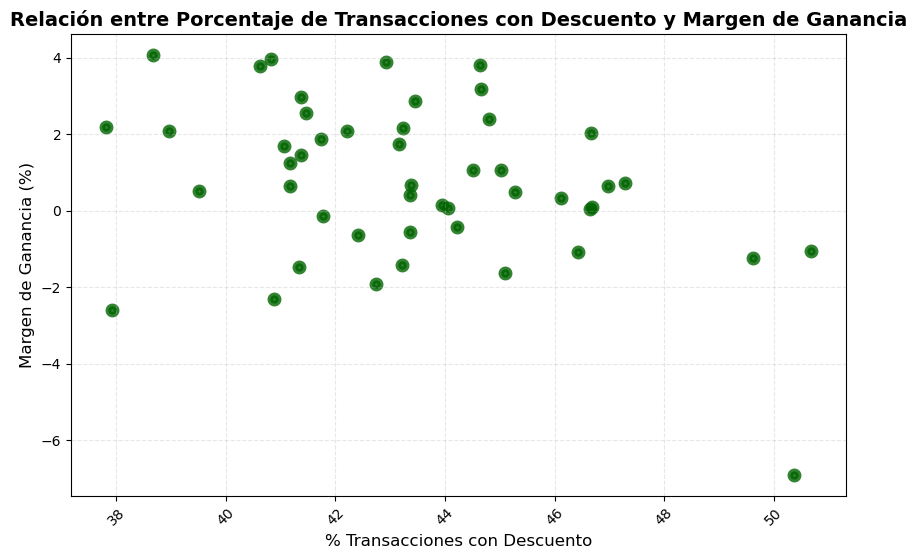

In [117]:
# Relacion entre porcentaje de transacciones con desceunto y margen de ganancia.

plt.figure(figsize=(10,6))
plt.scatter(
    analisis_mensual['%_transacciones_con_descuento'],
    analisis_mensual['Profit Margin'],
    marker='o',
    linewidth=4,
    color='darkgreen',
    alpha=0.8
)
plt.title('Relación entre Porcentaje de Transacciones con Descuento y Margen de Ganancia', 
          fontsize=14, fontweight='bold')
plt.xlabel('% Transacciones con Descuento', fontsize=12)
plt.ylabel('Margen de Ganancia (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)

In [118]:
# TOP 10 meses con mayor promedio de descuento mensual:

analisis_mensual.sort_values('promedio_descuento_mensual', ascending=False).head(10)

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento
0,2012-01,433,177,38.85,40.88,98898.49,-2274.99,1463,-2.30,33343.11,33.71
12,2013-01,551,209,36.84,37.93,137435.98,-3587.46,1874,-2.61,60731.01,44.19
1,2012-02,431,163,35.70,37.82,103717.92,2271.74,1401,2.19,35181.23,33.92
42,2015-07,1087,461,35.47,42.41,258705.68,-1667.86,3637,-0.64,115147.03,44.51
3,2012-04,539,213,35.11,39.52,114332.96,580.06,1934,0.51,52093.84,45.56
5,2012-06,888,450,35.01,50.68,207571.54,-2203.56,3002,-1.06,118426.88,57.05
10,2012-11,1108,490,34.60,44.22,293947.35,-1223.67,3924,-0.42,130911.04,44.54
47,2015-12,2153,971,34.51,45.10,503143.69,-8178.37,7513,-1.63,229717.65,45.66
14,2013-03,662,298,34.12,45.02,163076.77,1752.13,2237,1.07,74019.75,45.39
22,2013-11,1460,633,34.10,43.36,323512.42,-1813.02,5193,-0.56,145306.88,44.92


In [119]:
# TOP 10 meses con mayor promedio de margen de ganancia:

analisis_mensual.sort_values('Profit Margin', ascending=False).head(10)

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento
25,2014-02,605,234,33.34,38.68,167239.65,6789.65,2102,4.06,62668.47,37.47
38,2015-03,1068,436,32.57,40.82,263100.77,10424.62,3722,3.96,108492.70,41.24
13,2013-02,417,179,33.66,42.93,98854.96,3833.71,1444,3.88,29795.35,30.14
33,2014-10,1100,491,32.76,44.64,293406.64,11160.54,3883,3.80,121004.82,41.24
19,2013-08,1083,440,30.95,40.63,303142.94,11445.15,3818,3.78,137974.82,45.51
45,2015-10,1626,726,32.20,44.65,422766.63,13429.42,5876,3.18,181450.56,42.92
44,2015-09,2018,835,32.59,41.38,481157.24,14267.02,6837,2.97,200429.63,41.66
16,2013-05,840,365,31.31,43.45,208364.89,5988.09,2921,2.87,87691.55,42.09
24,2014-01,709,294,31.10,41.47,199185.91,5064.13,2413,2.54,84317.86,42.33
17,2013-06,1136,509,33.06,44.81,256175.70,6131.25,3671,2.39,121112.14,47.28


In [120]:
# TOP 10 meses con menor proemdio de margen de ganancia:

analisis_mensual.sort_values('Profit Margin', ascending=True).head(10)

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento
6,2012-07,524,264,33.12,50.38,118434.88,-8199.93,1836,-6.92,58808.92,49.66
12,2013-01,551,209,36.84,37.93,137435.98,-3587.46,1874,-2.61,60731.01,44.19
0,2012-01,433,177,38.85,40.88,98898.49,-2274.99,1463,-2.30,33343.11,33.71
4,2012-05,606,259,33.77,42.74,158228.33,-3047.68,2167,-1.93,67409.43,42.60
47,2015-12,2153,971,34.51,45.10,503143.69,-8178.37,7513,-1.63,229717.65,45.66
31,2014-08,1442,596,34.00,41.33,326488.79,-4792.42,4934,-1.47,141128.62,43.23
23,2013-12,1284,555,31.11,43.22,338256.97,-4757.61,4614,-1.41,150789.91,44.58
18,2013-07,659,327,31.93,49.62,145236.79,-1819.05,2321,-1.25,74007.45,50.96
39,2015-04,1051,488,33.61,46.43,242771.86,-2608.42,3594,-1.07,119727.54,49.32
5,2012-06,888,450,35.01,50.68,207571.54,-2203.56,3002,-1.06,118426.88,57.05


In [121]:
# TOP 10 meses con mayores ventas ($):

analisis_mensual.sort_values('ventas_totales_mes', ascending=False).head(10)

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento
46,2015-11,2147,972,31.32,45.27,555279.03,2715.23,7706,0.49,266584.99,48.01
47,2015-12,2153,971,34.51,45.10,503143.69,-8178.37,7513,-1.63,229717.65,45.66
44,2015-09,2018,835,32.59,41.38,481157.24,14267.02,6837,2.97,200429.63,41.66
43,2015-08,1675,693,31.41,41.37,456619.94,6652.54,5824,1.46,192537.31,42.17
45,2015-10,1626,726,32.20,44.65,422766.63,13429.42,5876,3.18,181450.56,42.92
35,2014-12,1602,658,34.00,41.07,405454.38,6848.07,5694,1.69,174873.50,43.13
41,2015-06,1748,758,33.17,43.36,401814.06,1683.53,6009,0.42,182569.34,45.44
29,2014-06,1530,630,33.91,41.18,396519.61,2509.39,5327,0.63,177107.99,44.67
32,2014-09,1682,741,32.48,44.05,376619.25,242.27,5793,0.06,170066.79,45.16
34,2014-11,1596,689,31.25,43.17,373989.36,6483.83,5556,1.73,164355.33,43.95


In [122]:
# TOP 10 meses con mayores cantidad de unidades vendidas:

analisis_mensual.sort_values('cantidad_total_mes', ascending=False).head(10)

,Year-Month,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento
46,2015-11,2147,972,31.32,45.27,555279.03,2715.23,7706,0.49,266584.99,48.01
47,2015-12,2153,971,34.51,45.10,503143.69,-8178.37,7513,-1.63,229717.65,45.66
44,2015-09,2018,835,32.59,41.38,481157.24,14267.02,6837,2.97,200429.63,41.66
41,2015-06,1748,758,33.17,43.36,401814.06,1683.53,6009,0.42,182569.34,45.44
45,2015-10,1626,726,32.20,44.65,422766.63,13429.42,5876,3.18,181450.56,42.92
43,2015-08,1675,693,31.41,41.37,456619.94,6652.54,5824,1.46,192537.31,42.17
32,2014-09,1682,741,32.48,44.05,376619.25,242.27,5793,0.06,170066.79,45.16
35,2014-12,1602,658,34.00,41.07,405454.38,6848.07,5694,1.69,174873.50,43.13
34,2014-11,1596,689,31.25,43.17,373989.36,6483.83,5556,1.73,164355.33,43.95
29,2014-06,1530,630,33.91,41.18,396519.61,2509.39,5327,0.63,177107.99,44.67


In [123]:
# Analizamos mas en detalle los descuentos "grandes" ya que vemos son aquellos que afectan negativamente el margen de ganancia. 
# Definimos los grupos de descuento que consideramos "grandes" (> 30%).

descuentos_grandes = [
    '10-15%','15-20%', '20-25%', '25-30%','30-35%', '35-40%', '40-45%',
    '45-50%', '50-55%', '55-60%', '60-65%', '65-70%',
    '70-75%', '75-80%', '80-85%', '85-90%', '90-95%', '95-100%'
]

df_grandes_descuentos = df_limpio[
    df_limpio['Discount Group'].isin(descuentos_grandes)
].copy()


conteo_mensual_grandes = df_grandes_descuentos.groupby('Year-Month').size().reset_index(name='Cantidad Descuentos Grandes')
ventas_mensual_riesgo = df_grandes_descuentos.groupby('Year-Month')['Sales'].sum().round(2).reset_index(name='Ventas con Descuento Grande')

df_descuentos_grandes = pd.merge(conteo_mensual_grandes, analisis_mensual, how='left', on='Year-Month')
df_descuentos_grandes = pd.merge(df_descuentos_grandes, ventas_mensual_riesgo, how='left', on='Year-Month')

df_descuentos_grandes.head()

,Year-Month,Cantidad Descuentos Grandes,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento,Ventas con Descuento Grande
0,2012-01,146,433,177,38.85,40.88,98898.49,-2274.99,1463,-2.30,33343.11,33.71,21919.76
1,2012-02,130,431,163,35.70,37.82,103717.92,2271.74,1401,2.19,35181.23,33.92,22241.48
2,2012-03,190,511,240,30.95,46.97,135746.40,882.13,1745,0.65,74767.67,55.08,59837.10
3,2012-04,176,539,213,35.11,39.52,114332.96,580.06,1934,0.51,52093.84,45.56,33844.15
4,2012-05,211,606,259,33.77,42.74,158228.33,-3047.68,2167,-1.93,67409.43,42.60,48331.92


In [124]:
# Calculamos un indicador de riesgo ('% Venta de Riesgo'): mide la proporción del valor total de las ventas mensuales que provino de transacciones a las que se aplicaron descuentos considerados alto.

df_descuentos_grandes['% Venta de Riesgo'] = ((df_descuentos_grandes['Ventas con Descuento Grande'] / df_descuentos_grandes['ventas_totales_mes']) * 100).round(2)

df_descuentos_grandes.head()

,Year-Month,Cantidad Descuentos Grandes,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento,Ventas con Descuento Grande,% Venta de Riesgo
0,2012-01,146,433,177,38.85,40.88,98898.49,-2274.99,1463,-2.30,33343.11,33.71,21919.76,22.16
1,2012-02,130,431,163,35.70,37.82,103717.92,2271.74,1401,2.19,35181.23,33.92,22241.48,21.44
2,2012-03,190,511,240,30.95,46.97,135746.40,882.13,1745,0.65,74767.67,55.08,59837.10,44.08
3,2012-04,176,539,213,35.11,39.52,114332.96,580.06,1934,0.51,52093.84,45.56,33844.15,29.60
4,2012-05,211,606,259,33.77,42.74,158228.33,-3047.68,2167,-1.93,67409.43,42.60,48331.92,30.55


In [125]:
df_descuentos_grandes.sort_values('% Venta de Riesgo', ascending=False).head(10)

,Year-Month,Cantidad Descuentos Grandes,total_transacciones,transacciones_con_descuento,promedio_descuento_mensual,%_transacciones_con_descuento,ventas_totales_mes,ganancia_total_mes,cantidad_total_mes,Profit Margin,ventas_con_descuento,%_ventas_con_desuento,Ventas con Descuento Grande,% Venta de Riesgo
2,2012-03,190,511,240,30.95,46.97,135746.40,882.13,1745,0.65,74767.67,55.08,59837.10,44.08
6,2012-07,228,524,264,33.12,50.38,118434.88,-8199.93,1836,-6.92,58808.92,49.66,44863.64,37.88
5,2012-06,347,888,450,35.01,50.68,207571.54,-2203.56,3002,-1.06,118426.88,57.05,73137.37,35.23
28,2014-05,389,1057,493,31.05,46.64,260498.56,65.48,3808,0.03,123462.65,47.39,91418.18,35.09
10,2012-11,422,1108,490,34.60,44.22,293947.35,-1223.67,3924,-0.42,130911.04,44.54,100784.67,34.29
37,2015-02,256,756,353,31.48,46.69,184837.36,158.90,2482,0.09,94564.41,51.16,60524.57,32.74
11,2012-12,458,1218,576,31.58,47.29,319807.41,2319.28,4326,0.73,152483.15,47.68,103903.03,32.49
27,2014-04,284,785,345,33.66,43.95,177821.32,250.80,2688,0.14,82345.34,46.31,57724.83,32.46
8,2012-09,340,1035,437,31.04,42.22,284587.75,5954.82,3644,2.09,135213.51,47.51,90589.80,31.83
21,2013-10,349,990,428,31.74,43.23,252939.85,5492.14,3563,2.17,109225.65,43.18,80138.81,31.68


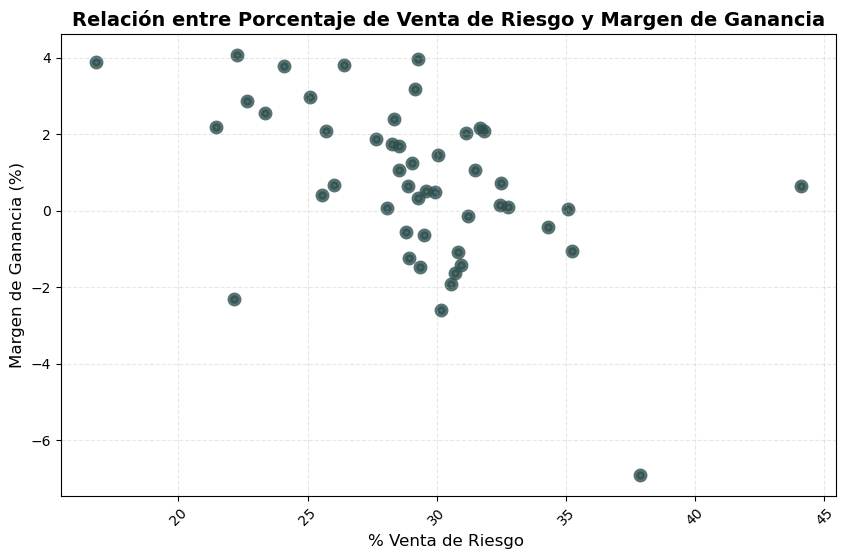

In [126]:
# Relacion entre el indicador Porcentaje de Venta de Riesgo y el Margen de Ganancia.

plt.figure(figsize=(10,6))
plt.scatter(
    df_descuentos_grandes['% Venta de Riesgo'],
    df_descuentos_grandes['Profit Margin'],
    marker='o',
    linewidth=4,
    color='darkslategray',
    alpha=0.8
)
plt.title('Relación entre Porcentaje de Venta de Riesgo y Margen de Ganancia', 
          fontsize=14, fontweight='bold')
plt.xlabel('% Venta de Riesgo ', fontsize=12)
plt.ylabel('Margen de Ganancia (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)

# Análisis de Rentabilidad y Estrategia de Descuentos

El análisis del comportamiento de ventas y transacciones con descuento a nivel mensual revela una **alta sensibilidad de la rentabilidad** ante las políticas de promoción.

---

## **Correlación Negativa y Umbral Crítico**

Existe una clara **correlación inversa** entre la participación de ventas con descuento y el margen de ganancia (*Profit Margin*), sugiriendo que las promociones, en el volumen actual, están erosionando la rentabilidad.

* **Riesgo Monetario (Valor de Venta):** Los meses donde el **Porcentaje de Ventas con Descuento (a nivel $)** supera el **~50%** de las ventas totales se asocian consistentemente con márgenes de ganancia negativos o cercanos a cero.
    * **Ejemplo Clave:** **2012-06** (57.05% Ventas con Descuento) registró un Margen de **-1.06%**.
* **Riesgo de Frecuencia (Cantidad de Transacciones):** El peor mes, **2012-07** (Margen: **-6.92%**), fue el segundo con mayor porcentaje de transacciones con descuento (50.38%), validando que tanto la frecuencia como el valor afectan la rentabilidad.

---

## **Análisis de Casos Extremos (Top & Flop)**

| Categoría | Mes | Indicador Clave | Valor | Margen de Ganancia | Conclusión |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Peor Margen** | **2012-07** | % Ventas con Descuento | 49.66% | **-6.92%** | Alta incidencia de descuento genera máxima pérdida. |
| **Mejor Margen** | **2014-02** | % Ventas con Descuento | 37.47% | **+4.06%** | Baja participación de descuentos favorece la rentabilidad. |
| **Mayor Descuento Promedio** | **2012-01** | Promedio Descuento Mensual | 38.85% | **-2.30%** | Descuentos agresivos (alto promedio) no son sostenibles. |
| **Volumen vs. Margen** | **2015-11** | Transacciones con Descuento (Absoluto) | 972 | **+0.49%** | Alta frecuencia de transacciones con descuento puede ser gestionada para mantener un margen positivo (descuentos menores/productos específicos). |

---

## **Recomendaciones Estratégicas**

1.  **Establecer un Límite Máximo de Descuento (Umbral de Riesgo):** Es imperativo mantener el **Porcentaje de Ventas con Descuento** **por debajo del 40%** para asegurar un margen positivo consistente, tomando como referencia el rendimiento de los meses exitosos (ej. 2013-02 con 30.14% y 3.88% de Margen).
2.  **Investigar la Naturaleza de las Transacciones:** Analizar qué **tipo de producto** y **profundidad de descuento** se aplicó en los meses de *alto volumen* pero *margen aceptable* (e.g., 2015-11). Esto permitirá identificar las promociones "inteligentes" que maximizan el volumen sin sacrificar la rentabilidad.
3.  **Optimización del Descuento Promedio:** Reevaluar la necesidad de aplicar descuentos promedio superiores al 35%, ya que tienden a resultar en pérdidas.

# ANALISIS DE RELACION DESCUENTOS-CATEGORIAS

In [127]:
# Analizamos la relacion entre los descuentos y las categorias.

descuentos_categoria = (
        df_limpio
       .groupby(['Category', 'Discount Group'], observed=True)
       .size()
    .reset_index(name='Transacciones')
)

# Calcular proporción dentro de cada categoría

total_por_categoria = descuentos_categoria.groupby('Category')['Transacciones'].transform('sum')
descuentos_categoria['Porcentaje'] = (descuentos_categoria['Transacciones'] / total_por_categoria * 100).round(2)

descuentos_categoria.head()


,Category,Discount Group,Transacciones,Porcentaje
0,Furniture,0-5%,4489,45.53
1,Furniture,5-10%,1073,10.88
2,Furniture,10-15%,52,0.53
3,Furniture,15-20%,1392,14.12
4,Furniture,20-25%,126,1.28


In [128]:
margen_categoria_desc = (df_limpio.groupby(['Category', 'Discount Group'], observed=True).agg({
          'Net Profit': 'sum',
          'Sales': 'sum',
          'Quantity': 'sum'
      })
      .round(2)
      .reset_index()
)

margen_categoria_desc['Profit Margin'] = ((margen_categoria_desc['Net Profit'] / margen_categoria_desc['Sales']) * 100).round(2)

margen_categoria_desc.head()

,Category,Discount Group,Net Profit,Sales,Quantity,Profit Margin
0,Furniture,0-5%,257637.33,1924884.44,15175,13.38
1,Furniture,5-10%,39096.42,675426.58,4137,5.79
2,Furniture,10-15%,-1904.64,27558.52,198,-6.91
3,Furniture,15-20%,-34559.29,578304.18,5147,-5.98
4,Furniture,20-25%,-3899.38,49157.35,550,-7.93


In [129]:
analisis_categorias_descuentos = pd.merge(descuentos_categoria, margen_categoria_desc, how='left', on=['Category', 'Discount Group'])

analisis_categorias_descuentos.head()

,Category,Discount Group,Transacciones,Porcentaje,Net Profit,Sales,Quantity,Profit Margin
0,Furniture,0-5%,4489,45.53,257637.33,1924884.44,15175,13.38
1,Furniture,5-10%,1073,10.88,39096.42,675426.58,4137,5.79
2,Furniture,10-15%,52,0.53,-1904.64,27558.52,198,-6.91
3,Furniture,15-20%,1392,14.12,-34559.29,578304.18,5147,-5.98
4,Furniture,20-25%,126,1.28,-3899.38,49157.35,550,-7.93


In [130]:
analisis_categorias_descuentos['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [131]:
# Analizamos la categoria FURNITURE:

descuentos_furniture = analisis_categorias_descuentos[analisis_categorias_descuentos['Category']== 'Furniture']

descuentos_furniture

,Category,Discount Group,Transacciones,Porcentaje,Net Profit,Sales,Quantity,Profit Margin
0,Furniture,0-5%,4489,45.53,257637.33,1924884.44,15175,13.38
1,Furniture,5-10%,1073,10.88,39096.42,675426.58,4137,5.79
2,Furniture,10-15%,52,0.53,-1904.64,27558.52,198,-6.91
3,Furniture,15-20%,1392,14.12,-34559.29,578304.18,5147,-5.98
4,Furniture,20-25%,126,1.28,-3899.38,49157.35,550,-7.93
5,Furniture,25-30%,625,6.34,-49994.28,265789.49,2339,-18.81
6,Furniture,30-35%,109,1.11,-21945.75,87325.84,408,-25.13
7,Furniture,35-40%,876,8.88,-89875.45,224209.33,3176,-40.09
8,Furniture,40-45%,13,0.13,-4147.05,8031.40,56,-51.64
9,Furniture,45-50%,275,2.79,-70511.62,119775.34,1094,-58.87


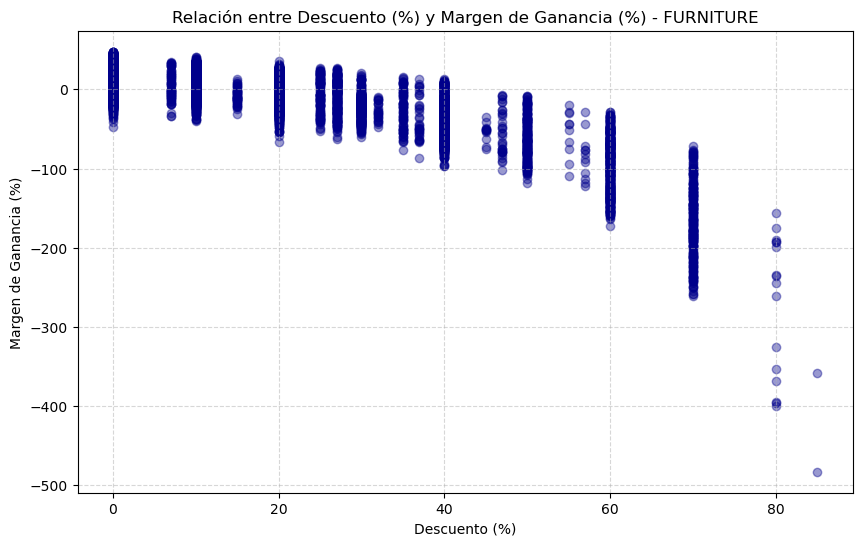

In [132]:
# Scatterplot relacion entre descuento y margen de ganancia - Caterogria Furniture.

df_furniture = df_limpio[df_limpio['Category'] == 'Furniture']

plt.figure(figsize=(10,6))
plt.scatter(
    df_furniture['Discount']*100,
    df_furniture['Profit Margin'],
    alpha=0.4,
    color='darkblue'
)
plt.title('Relación entre Descuento (%) y Margen de Ganancia (%) - FURNITURE')
plt.xlabel('Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

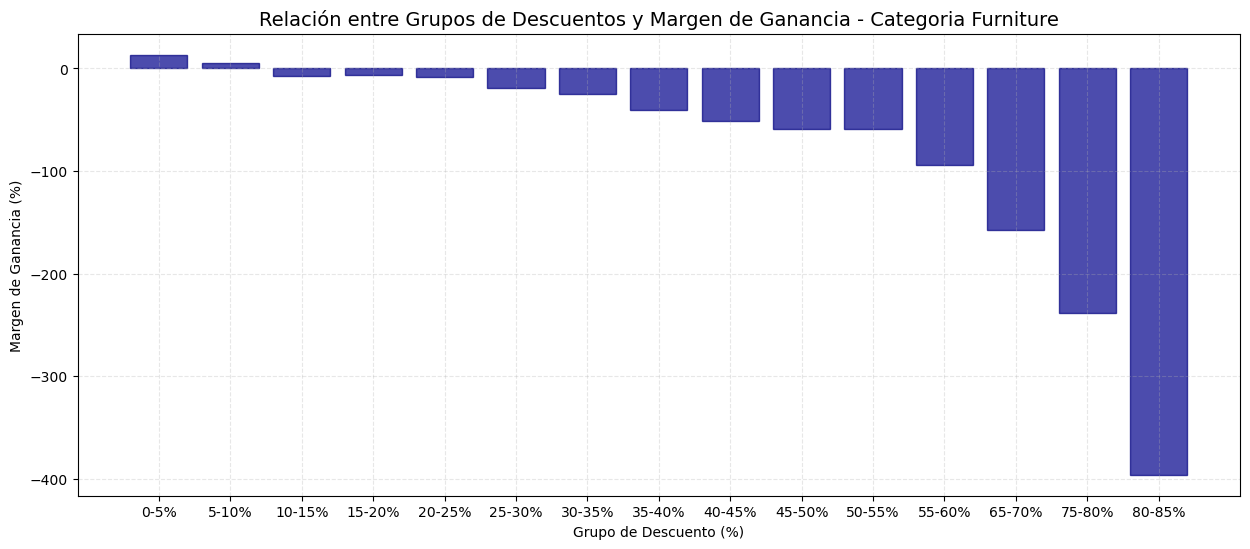

In [133]:
# Relacion entre los Grupos de Descuento y Margen de Ganancia - Categoría Furniture.

plt.figure(figsize=(15,6))
plt.bar(
    descuentos_furniture['Discount Group'],
    descuentos_furniture['Profit Margin'],
    alpha=0.7,
    color='darkblue',
    edgecolor='navy'
)
plt.title('Relación entre Grupos de Descuentos y Margen de Ganancia - Categoria Furniture', fontsize=14)
plt.xlabel('Grupo de Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [134]:
# Analizamos la categoria OFFICE SUPPLIES:

descuentos_supplies = analisis_categorias_descuentos[analisis_categorias_descuentos['Category']== 'Office Supplies']

descuentos_supplies

,Category,Discount Group,Transacciones,Porcentaje,Net Profit,Sales,Quantity,Profit Margin
15,Office Supplies,0-5%,19216,61.41,354400.32,2378075.40,65561,14.90
16,Office Supplies,5-10%,2387,7.63,28686.31,554348.52,8911,5.17
17,Office Supplies,10-15%,82,0.26,-1123.85,22149.99,319,-5.07
18,Office Supplies,15-20%,3218,10.28,10838.75,415924.29,12018,2.61
19,Office Supplies,25-30%,98,0.31,-1536.62,8737.90,367,-17.59
20,Office Supplies,35-40%,1685,5.39,-51036.14,145140.02,6259,-35.16
21,Office Supplies,40-45%,277,0.89,-9626.16,19219.10,999,-50.09
22,Office Supplies,45-50%,1644,5.25,-76709.28,127406.99,6278,-60.21
23,Office Supplies,55-60%,1147,3.67,-51215.47,50868.69,2878,-100.68
24,Office Supplies,65-70%,1235,3.95,-61928.27,48657.85,3466,-127.27


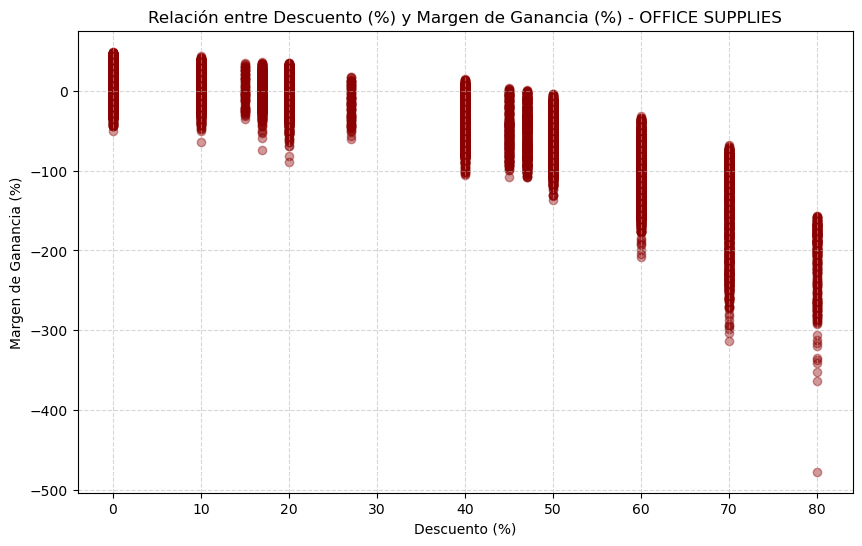

In [135]:
# Scatterplot relacion entre descuento y margen de ganancia - Caterogria Office Supplies.

df_office_supplies = df_limpio[df_limpio['Category'] == 'Office Supplies']

plt.figure(figsize=(10,6))
plt.scatter(
    df_office_supplies['Discount']*100,
    df_office_supplies['Profit Margin'],
    alpha=0.4,
    color='darkred'
)
plt.title('Relación entre Descuento (%) y Margen de Ganancia (%) - OFFICE SUPPLIES')
plt.xlabel('Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

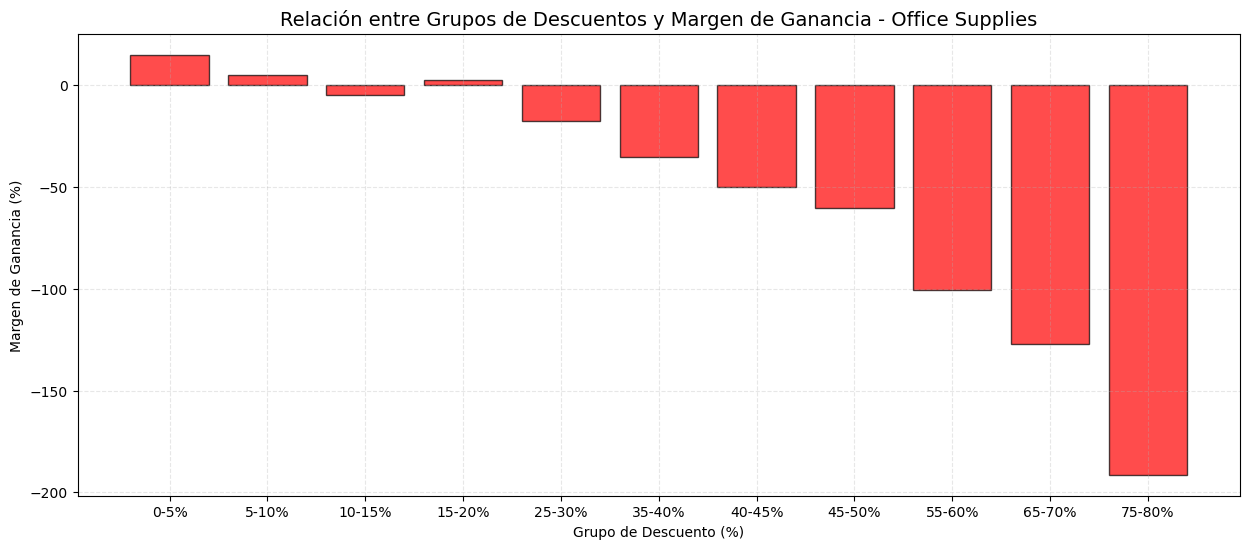

In [136]:
# Relacion entre los Grupos de Descuento y Margen de Ganancia - Categoría Office Supplies.

plt.figure(figsize=(15,6))
plt.bar(
    descuentos_supplies['Discount Group'],
    descuentos_supplies['Profit Margin'],
    alpha=0.7,
    color='red',
    edgecolor='black'
)
plt.title('Relación entre Grupos de Descuentos y Margen de Ganancia - Office Supplies', fontsize=14)
plt.xlabel('Grupo de Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [137]:
# Analizamos la categoria TECHNOLOGY:

descuentos_technology = analisis_categorias_descuentos[analisis_categorias_descuentos['Category']== 'Technology']

descuentos_technology

,Category,Discount Group,Transacciones,Porcentaje,Net Profit,Sales,Quantity,Profit Margin
26,Technology,0-5%,5765,56.85,441036.29,2950846.73,19689,14.95
27,Technology,5-10%,758,7.47,27825.75,471448.13,2902,5.90
28,Technology,10-15%,407,4.01,-4267.29,256321.33,1504,-1.66
29,Technology,15-20%,1123,11.07,12349.56,457003.02,4208,2.70
30,Technology,20-25%,113,1.11,-6203.17,55113.65,411,-11.26
31,Technology,25-30%,5,0.05,-188.31,3756.30,12,-5.01
32,Technology,30-35%,40,0.39,-4906.74,22874.10,150,-21.45
33,Technology,35-40%,690,6.80,-72408.08,221793.82,2422,-32.65
34,Technology,40-45%,141,1.39,-17722.70,39874.50,483,-44.45
35,Technology,45-50%,439,4.33,-85761.98,160380.98,1670,-53.47


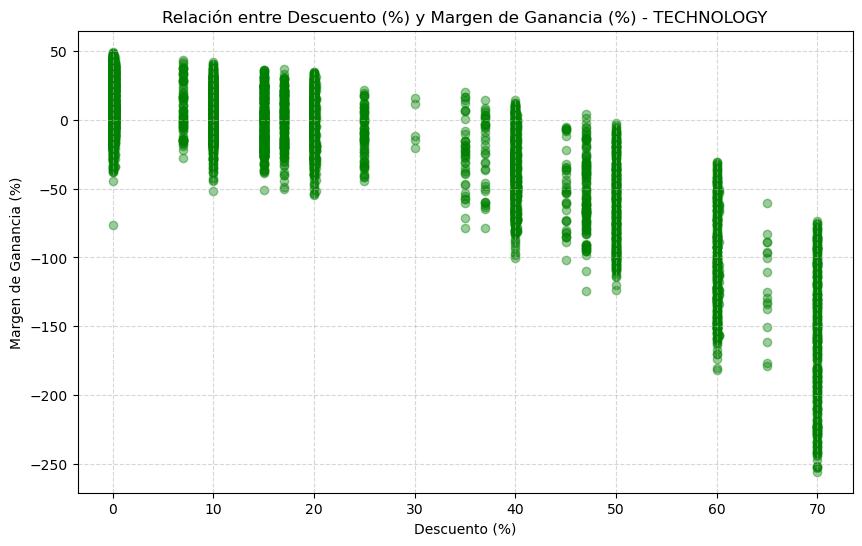

In [138]:
# Scatterplot relacion entre descuento y margen de ganancia - Caterogria Technology.

df_technology = df_limpio[df_limpio['Category'] == 'Technology']

plt.figure(figsize=(10,6))
plt.scatter(
    df_technology['Discount']*100,
    df_technology['Profit Margin'],
    alpha=0.4,
    color='green'
)
plt.title('Relación entre Descuento (%) y Margen de Ganancia (%) - TECHNOLOGY')
plt.xlabel('Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

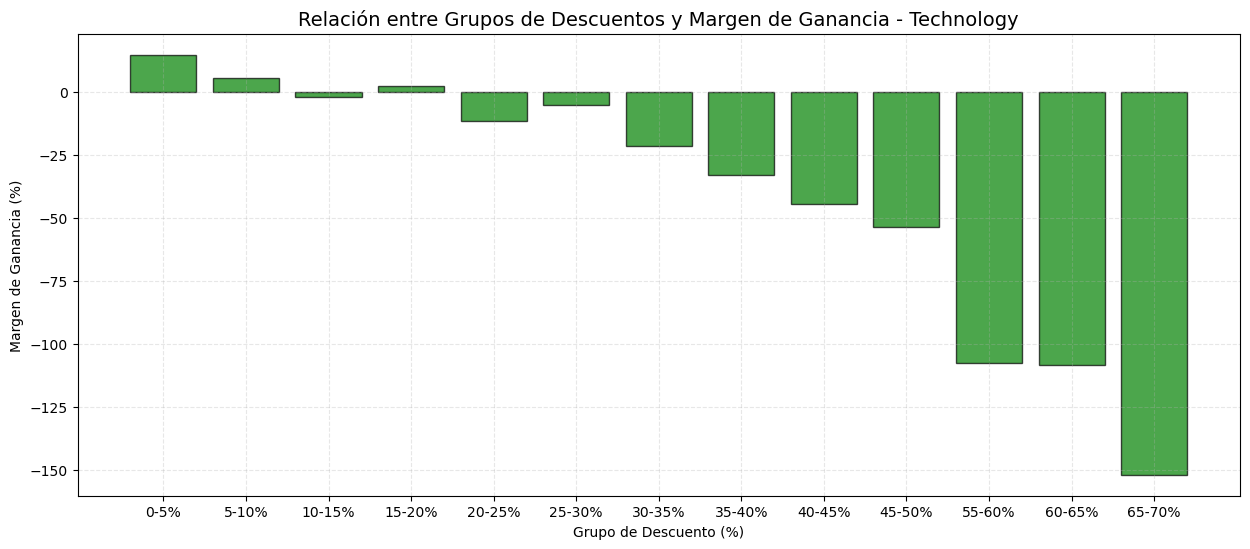

In [139]:
# Relacion entre los Grupos de Descuento y Margen de Ganancia - Categoría Technology.

plt.figure(figsize=(15,6))
plt.bar(
    descuentos_technology['Discount Group'],
    descuentos_technology['Profit Margin'],
    alpha=0.7,
    color='green',
    edgecolor='black'
)
plt.title('Relación entre Grupos de Descuentos y Margen de Ganancia - Technology', fontsize=14)
plt.xlabel('Grupo de Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


# Resumen e Insight Principal

El análisis de los gráficos de dispersión y de barras confirma una **fuerte y consistente correlación negativa** entre el nivel de descuento ofrecido y el margen de ganancia en **todas las categorías**.

**Insight Crítico:**
> **Cualquier descuento aplicado por encima del 15%-20% pone en riesgo la rentabilidad** de todas las categorías, con los descuentos extremos (> 50%) resultando en **pérdidas porcentuales catastróficas** (márgenes por debajo del -100%).

---

## Análisis por Categoría

### Furniture 

| Grupo de Descuento | Margen de Ganancia (%) | Transacciones | Conclusión |
| :--- | :--- | :--- | :--- |
| **0-5%** | **13.38%** | 4489 (45.53%) | Principal generador de ganancias. |
| **10-15%** | **-6.91%** | 52 (0.53%) | **Punto de Quiebre (Break-Even):** Primera pérdida registrada. |
| **75-80%** | **-237.88%** | 16 (0.16%) | **Pérdida Extrema:** La categoría más sensible a descuentos altos. |

**Observaciones Clave:**
* **Vulnerabilidad:** Es la categoría más vulnerable. Entra en pérdidas con descuentos muy bajos (10-15%).
* **Severidad:** Las pérdidas con descuentos altos (75-85%) son las **más profundas** de todo el negocio, indicando que la estructura de costos es inmanejable bajo promociones agresivas.

---

### Office Supplies 

| Grupo de Descuento | Margen de Ganancia (%) | Transacciones | Conclusión |
| :--- | :--- | :--- | :--- |
| **0-5%** | **14.90%** | 19216 (61.41%) | Excelente margen y alto volumen transaccional. |
| **15-20%** | **2.61%** | 3218 (10.28%) | Último grupo con margen positivo. |
| **35-40%** | **-35.16%** | 1685 (5.39%) | Pérdidas significativas a partir de este punto. |
| **75-80%** | **-191.33%** | 300 (0.96%) | Pérdidas muy graves. |

**Observaciones Clave:**
* **Resiliencia Inicial:** Mantiene un margen positivo hasta el grupo **15-20%**, mostrando una **ligera mayor capacidad** para absorber descuentos moderados.
* **Volumen:** La gran mayoría de las transacciones (61.41%) se realizan en el rango de alta rentabilidad (0-5%), lo cual es un indicador de salud financiera.

---

### Technology (Tecnología)

| Grupo de Descuento | Margen de Ganancia (%) | Transacciones | Conclusión |
| :--- | :--- | :--- | :--- |
| **0-5%** | **14.95%** | 5765 (56.85%) | Principal generador de ganancias y volumen. |
| **10-15%** | **-1.66%** | 407 (4.01%) | **Punto de Quiebre (Break-Even):** Primera pérdida registrada. |
| **15-20%** | **2.70%** | 1123 (11.07%) | **Recuperación Puntual:** Vuelve a ser rentable, muy sensible. |
| **65-70%** | **-151.86%** | 304 (3.00%) | Pérdida muy alta y profunda. |

**Observaciones Clave:**
* **Mayor Resistencia:** Muestra la mejor capacidad para mantener el margen positivo en rangos de descuento intermedios, superando a Furniture y Office Supplies en el rango 15-20%.
* **Patrón de Pérdidas:** Las pérdidas se vuelven severas (superiores al -100%) a partir de los rangos de descuento más altos (cercanos o superiores al 60%).
* **Dispersión:** El gráfico de dispersión para Technology  muestra que hay más puntos de venta con ganancias **cercanas a cero** en los rangos de descuento intermedios (20%-40%) que en las otras categorías.

---

## Recomendaciones Estratégicas

### Mitigación de Riesgos (Límite de Descuento)

* **Establecer un Límite Estricto:** **Prohibir o requerir una aprobación de nivel ejecutivo** para cualquier descuento que supere el **20%** en las categorías **Furniture** y **Office Supplies**.
* **Foco en el Descuento Rentable:** Concentrar los esfuerzos de promoción en los grupos **0-5%** y **5-10%**, que son los únicos rangos consistentemente rentables en todas las categorías.

### Estrategia Específica para Furniture

* **Revisión de Costos:** Realizar una auditoría inmediata de los **costos directos** (costo de mercancía, envío, manipulación) de los productos de Furniture. Las pérdidas del -237% y -377% sugieren problemas fundamentales en la estructura de precios/costos.
* **Valor Agregado vs. Precio:** Sustituir los descuentos de precio puro por promociones de **valor agregado** (ej. envío/montaje gratis, financiación sin intereses) para mantener el precio base y proteger el margen.

### Uso Estratégico de Descuentos Altos

* **Liquidación de Inventario:** Restringir el uso de descuentos altos (> 40%) exclusivamente para la **liquidación de inventario obsoleto** o para atraer clientes con alto **Valor de Vida del Cliente (LTV)**.
* **Tecnología (Technology) como Buffer:** Utilizar la ligera mayor resistencia de Technology como un 'buffer' estratégico para campañas promocionales, pero siempre vigilando el umbral del 40%, donde las pérdidas se vuelven muy significativas.

# ANALISIS RELACION DESCUENTOS-SUBCATEGORIAS

In [140]:
df_subcategory.sort_values('Profit_Margin', ascending=True).head(20)

,Sub-Category,category,total_profit,total_sales,total_quantity,Profit_Margin,avg_price_per_unit,profit_per_unit,%_part_total_sales
16,Tables,Furniture,-143946.78,757041.92,3083,-19.01,245.55,-46.69,5.99
11,Machines,Technology,-20281.98,779060.07,4906,-2.60,158.80,-4.13,6.16
5,Chairs,Furniture,-23857.08,1501681.76,12336,-1.59,121.73,-1.93,11.88
14,Storage,Office Supplies,-12377.17,1126812.97,16884,-1.10,66.74,-0.73,8.91
15,Supplies,Office Supplies,-2391.63,242811.13,8482,-0.98,28.63,-0.28,1.92
4,Bookcases,Furniture,6436.45,1466572.24,8310,0.44,176.48,0.77,11.60
9,Furnishings,Furniture,5863.78,385155.97,11163,1.52,34.50,0.53,3.05
13,Phones,Technology,31763.51,1706824.14,11870,1.86,143.79,2.68,13.50
1,Appliances,Office Supplies,33254.84,1010535.52,6026,3.29,167.70,5.52,7.99
8,Fasteners,Office Supplies,3544.22,89495.05,9051,3.96,9.89,0.39,0.71


### Vamos a analizar principalmente las subcategorias con margen de ganancia negativos:

##### - Tables con -19.01% margen de ganancia y 5.99% participacion de las ventas totales.

##### - Machines con -2.60% margen de ganancia y 6.16% participacion de las ventas totales.

##### - Chairs con -1.59% margen de ganancia y 11.88% participacion de las ventas totales.

#### Estas Subcategorias son las principales responsables de deisminuir el margen de ganancia total de la empresa

In [141]:
descuentos_subcategoria = (
        df_limpio
       .groupby(['Sub-Category', 'Discount Group'], observed=True)
       .size()
    .reset_index(name='Transacciones')
)

# Calcular proporción dentro de cada categoría

total_por_subcategoria = descuentos_subcategoria.groupby('Sub-Category')['Transacciones'].transform('sum')
descuentos_subcategoria['Porcentaje'] = (descuentos_subcategoria['Transacciones'] / total_por_subcategoria * 100).round(2)

descuentos_subcategoria.head()


,Sub-Category,Discount Group,Transacciones,Porcentaje
0,Accessories,0-5%,1973,64.16
1,Accessories,5-10%,174,5.66
2,Accessories,15-20%,351,11.41
3,Accessories,35-40%,198,6.44
4,Accessories,40-45%,37,1.20


In [142]:
margen_subcategoria_desc = (df_limpio.groupby(['Sub-Category', 'Discount Group'], observed=True).agg({
          'Net Profit': 'sum',
          'Sales': 'sum',
          'Quantity': 'sum'
      })
      .round(2)
      .reset_index()
)

margen_subcategoria_desc['Profit Margin'] = ((margen_subcategoria_desc['Net Profit'] / margen_subcategoria_desc['Sales']) * 100).round(2)

margen_subcategoria_desc.head()

,Sub-Category,Discount Group,Net Profit,Sales,Quantity,Profit Margin
0,Accessories,0-5%,87918.70,554392.36,6980,15.86
1,Accessories,5-10%,3489.52,53219.89,666,6.56
2,Accessories,15-20%,1060.86,59747.42,1320,1.78
3,Accessories,35-40%,-9301.48,27217.54,699,-34.17
4,Accessories,40-45%,-2734.50,6140.62,142,-44.53


In [143]:
analisis_subcategorias_descuentos = pd.merge(descuentos_subcategoria, margen_subcategoria_desc, how='left', on=['Sub-Category', 'Discount Group'])

analisis_subcategorias_descuentos.head()

,Sub-Category,Discount Group,Transacciones,Porcentaje,Net Profit,Sales,Quantity,Profit Margin
0,Accessories,0-5%,1973,64.16,87918.70,554392.36,6980,15.86
1,Accessories,5-10%,174,5.66,3489.52,53219.89,666,6.56
2,Accessories,15-20%,351,11.41,1060.86,59747.42,1320,1.78
3,Accessories,35-40%,198,6.44,-9301.48,27217.54,699,-34.17
4,Accessories,40-45%,37,1.20,-2734.50,6140.62,142,-44.53


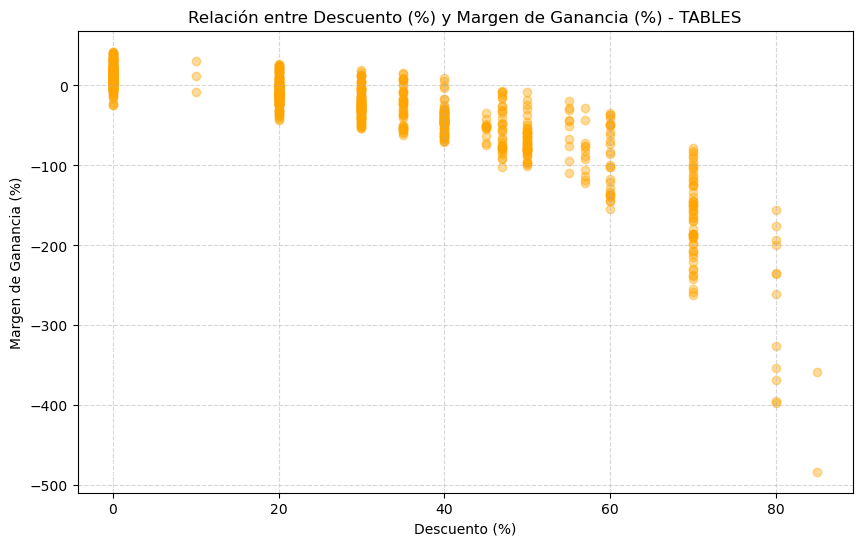

In [144]:
# Scatterplot relacion entre descuento y margen de ganancia de Tables.

df_tables = df_limpio[df_limpio['Sub-Category'] == 'Tables']

plt.figure(figsize=(10,6))
plt.scatter(
    df_tables['Discount']*100,
    df_tables['Profit Margin'],
    alpha=0.4,
    color='orange'
)
plt.title('Relación entre Descuento (%) y Margen de Ganancia (%) - TABLES')
plt.xlabel('Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [145]:
descuentos_tables = analisis_subcategorias_descuentos[analisis_subcategorias_descuentos['Sub-Category'] == 'Tables']

descuentos_tables.head(20)

,Sub-Category,Discount Group,Transacciones,Porcentaje,Net Profit,Sales,Quantity,Profit Margin
146,Tables,0-5%,208,24.16,31626.12,261809.35,716,12.08
147,Tables,5-10%,3,0.35,274.59,3481.41,8,7.89
148,Tables,15-20%,183,21.25,-9314.78,157722.74,688,-5.91
149,Tables,25-30%,116,13.47,-22653.47,104750.29,413,-21.63
150,Tables,30-35%,45,5.23,-14098.38,54160.04,169,-26.03
151,Tables,35-40%,85,9.87,-22957.95,52156.45,313,-44.02
152,Tables,40-45%,13,1.51,-4147.05,8031.40,56,-51.64
153,Tables,45-50%,86,9.99,-31784.99,59009.34,312,-53.86
154,Tables,50-55%,10,1.16,-3748.50,6308.66,36,-59.42
155,Tables,55-60%,40,4.65,-19216.18,22048.01,119,-87.16


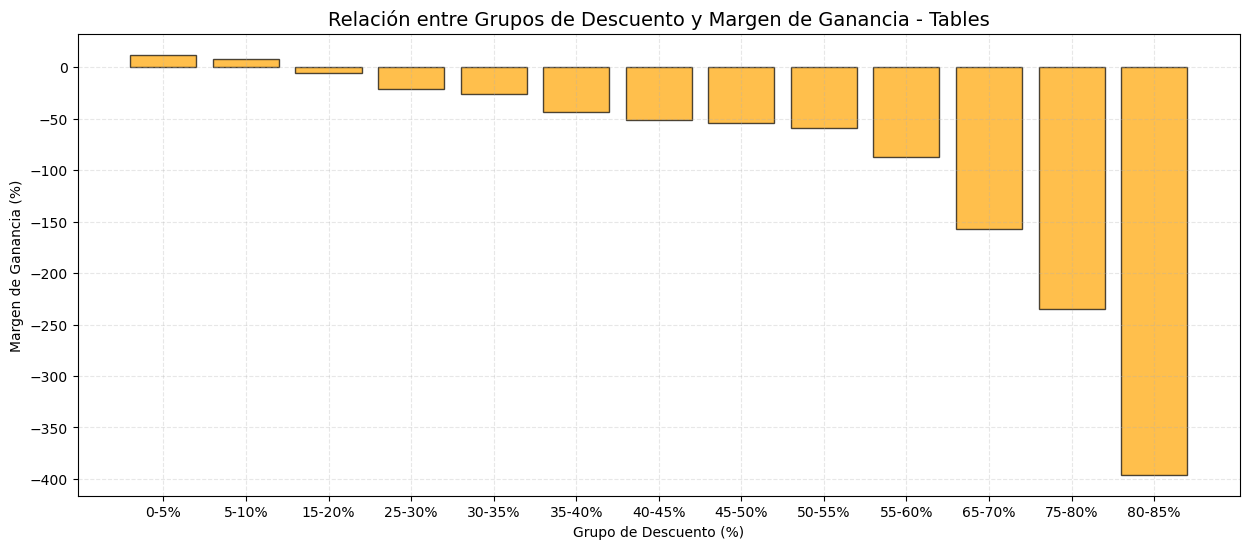

In [146]:
plt.figure(figsize=(15,6))
plt.bar(
    descuentos_tables['Discount Group'],
    descuentos_tables['Profit Margin'],
    alpha=0.7,
    color='orange',
    edgecolor='black'
)
plt.title('Relación entre Grupos de Descuento y Margen de Ganancia - Tables', fontsize=14)
plt.xlabel('Grupo de Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_9196\1400556498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descuentos_tables['Rentabilidad'] = descuentos_tables['Profit Margin'].apply(


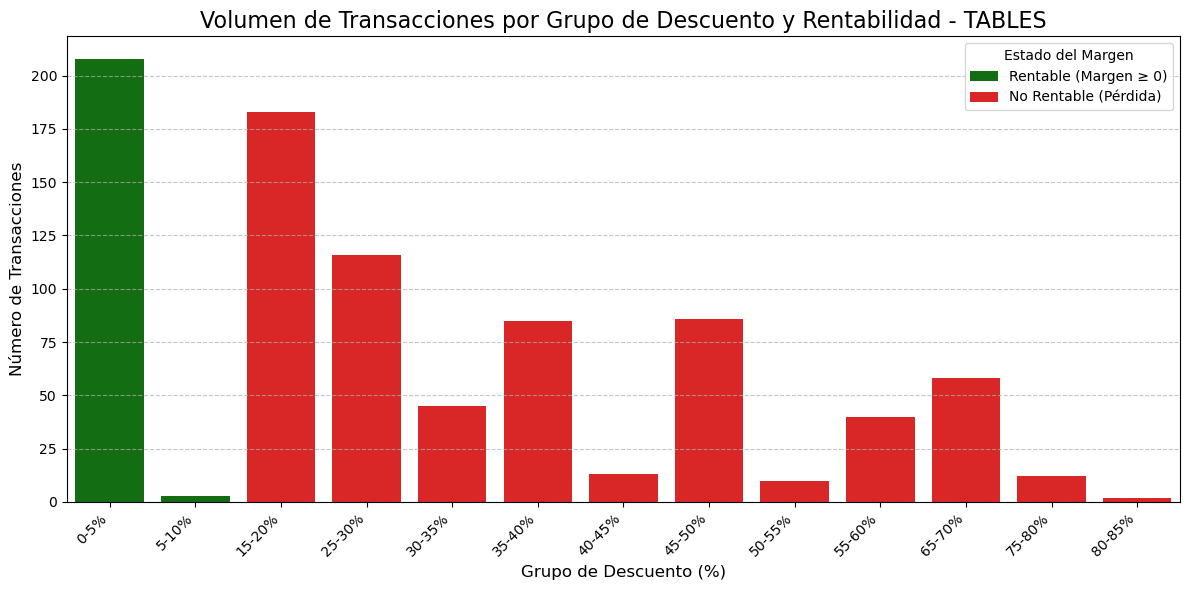

In [147]:
descuentos_tables['Rentabilidad'] = descuentos_tables['Profit Margin'].apply(
       lambda x: 'Rentable (Margen ≥ 0)' if x >= 0 else 'No Rentable (Pérdida)'
)

order = descuentos_tables['Discount Group'].tolist()

plt.figure(figsize=(12, 6))

sns.barplot(
    data=descuentos_tables,
    x='Discount Group',
    y='Transacciones',
    hue='Rentabilidad', 
    order=order,
    palette={'Rentable (Margen ≥ 0)': 'green', 'No Rentable (Pérdida)': 'red'},
    dodge=False,
    saturation=0.7
)

plt.title('Volumen de Transacciones por Grupo de Descuento y Rentabilidad - TABLES', fontsize=16)
plt.xlabel('Grupo de Descuento (%)', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Estado del Margen')
plt.tight_layout()
plt.show()

In [148]:
# Rentabilidad de las ventas de la Subcategoría "Tables"

ventas_negativas_tables = len(df_tables[df_tables['Profit Margin'] < 0])
ventas_positivas_tables = len(df_tables[df_tables['Profit Margin'] >= 0])

print(f"Cantidad de transacciones totales de Tables: {len(df_tables)}")
print(f"Transacciones con Margen Positivo: {ventas_positivas_tables}")
print(f"Transacciones con Margen Negativo: {ventas_negativas_tables}")

Cantidad de transacciones totales de Tables: 861
Transacciones con Margen Positivo: 250
Transacciones con Margen Negativo: 611


### Análisis de la Subcategoría "Tables"

**1. Pérdida Estructural y Foco Operacional**
* **Problema:** "Tables" opera con una **pérdida neta del -19.01%**. El problema es profundo, ya que **7 de cada 10 transacciones (71%)** son no rentables.
* **Métrica Clave:** La pérdida es cuantificable y operativa: **cada mesa vendida cuesta a la empresa $46.69** en promedio (pérdida absoluta por unidad).
* **Acción Prioritaria:** La subcategoría está **destruyendo valor**. El objetivo operativo inmediato debe ser **recuperar esos $46.69** por unidad mediante una revisión urgente de la **estructura de costos** o el **precio de venta base**.

**2. El Descuento como Acelerador de la Pérdida**
* **Hallazgo:** Existe una correlación negativa directa y destructiva: **Cualquier descuento superior al 10% garantiza la pérdida**. Los descuentos altos son financieramente catastróficos.
* **Acción Prioritaria:** **Eliminar inmediatamente descuentos superiores al 30%**. La única rentabilidad significativa se logra en el rango **0-5% de descuento** (Margen +12.08%).

**3. Foco de Fuga de Capital por Volumen**
* **Hallazgo:** El **mayor volumen de transacciones no rentables** se concentra en los rangos de descuento **15-20% y 25-30%**. Estos grupos son el principal foco de fuga de capital por su alto volumen de actividad fallida.
* **Acción Prioritaria:** Investigar la causa raíz que impide la rentabilidad en estos descuentos moderados. Se debe **reducir drásticamente el volumen de ventas en este rango** o **aumentar el precio base** para alcanzar el punto de equilibrio.

**4. Fragilidad del Umbral de Rentabilidad**
* **Hallazgo:** El margen positivo del grupo **5-10%** es **frágil y no escalable** (solo 3 transacciones). Representa el último umbral antes del desplome en pérdidas.
* **Acción Prioritaria:** **Evitar la dependencia en el 5-10% de descuento** como estrategia de venta. La estrategia debe centrarse en el **0-5%** y reposicionar Tables como un producto de valor que se vende a **precio regular**.

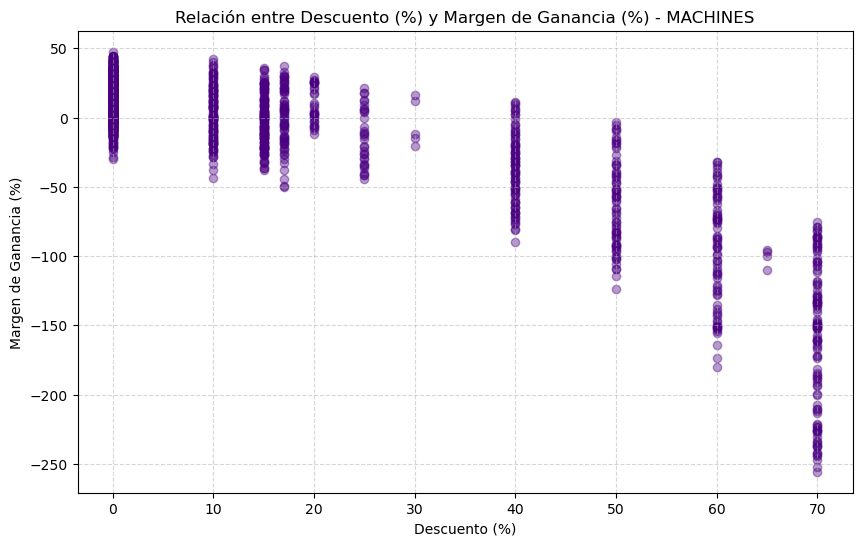

In [149]:
# Scatterplot relacion entre descuento y margen de ganancia de Machines.

df_machines = df_limpio[df_limpio['Sub-Category'] == 'Machines']

plt.figure(figsize=(10,6))
plt.scatter(
    df_machines['Discount']*100,
    df_machines['Profit Margin'],
    alpha=0.4,
    color='indigo'
)
plt.title('Relación entre Descuento (%) y Margen de Ganancia (%) - MACHINES')
plt.xlabel('Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [150]:
descuentos_machines = analisis_subcategorias_descuentos[analisis_subcategorias_descuentos['Sub-Category'] == 'Machines']

descuentos_machines.head(20)

,Sub-Category,Discount Group,Transacciones,Porcentaje,Net Profit,Sales,Quantity,Profit Margin
101,Machines,0-5%,754,50.74,64067.42,413925.66,2426,15.48
102,Machines,5-10%,125,8.41,3008.69,66985.78,442,4.49
103,Machines,10-15%,133,8.95,-3435.31,77136.99,496,-4.45
104,Machines,15-20%,96,6.46,2679.44,70524.24,377,3.80
105,Machines,20-25%,32,2.15,-2299.02,13994.91,120,-16.43
106,Machines,25-30%,5,0.34,-188.31,3756.30,12,-5.01
107,Machines,35-40%,81,5.45,-16097.24,43430.39,280,-37.06
108,Machines,45-50%,69,4.64,-20655.58,53989.21,220,-38.26
109,Machines,55-60%,76,5.11,-9542.02,9440.24,174,-101.08
110,Machines,60-65%,4,0.27,-672.13,665.78,12,-100.95


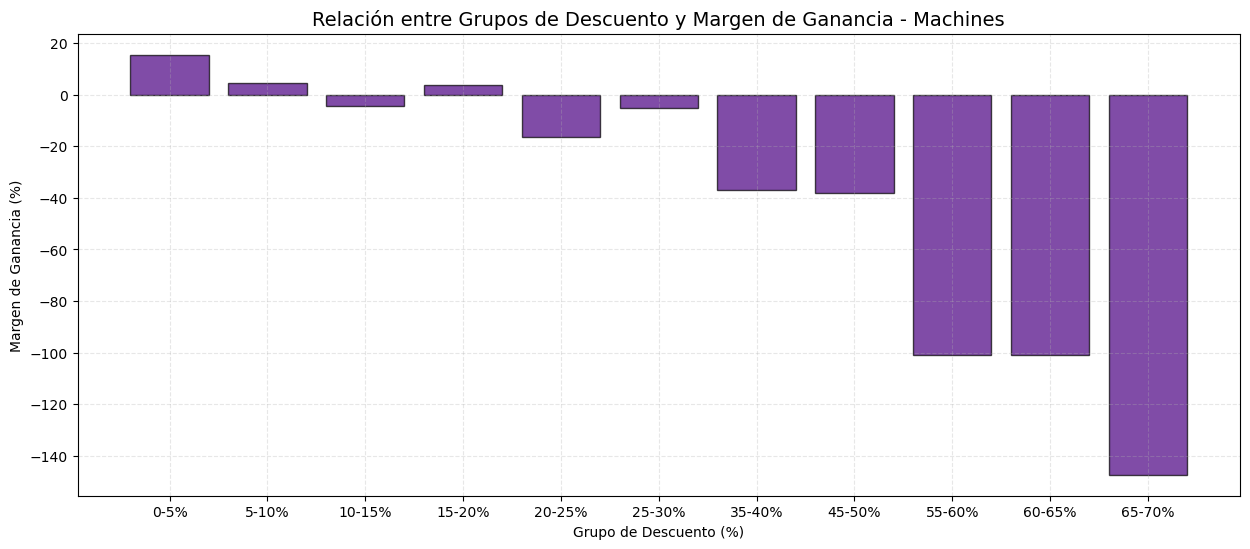

In [151]:
plt.figure(figsize=(15,6))
plt.bar(
    descuentos_machines['Discount Group'],
    descuentos_machines['Profit Margin'],
    alpha=0.7,
    color='indigo',
    edgecolor='black'
)
plt.title('Relación entre Grupos de Descuento y Margen de Ganancia - Machines', fontsize=14)
plt.xlabel('Grupo de Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_9196\797161535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descuentos_machines['Rentabilidad'] = descuentos_machines['Profit Margin'].apply(


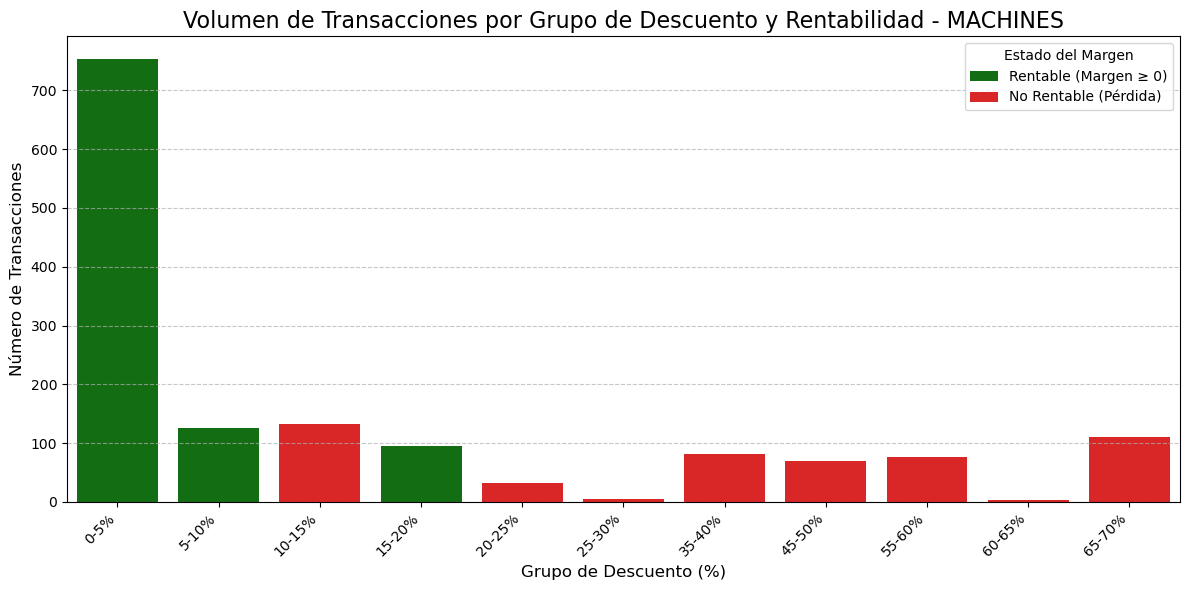

In [152]:
descuentos_machines['Rentabilidad'] = descuentos_machines['Profit Margin'].apply(
       lambda x: 'Rentable (Margen ≥ 0)' if x >= 0 else 'No Rentable (Pérdida)'
)

order = descuentos_machines['Discount Group'].tolist()

plt.figure(figsize=(12, 6))

sns.barplot(
    data=descuentos_machines,
    x='Discount Group',
    y='Transacciones',
    hue='Rentabilidad', 
    order=order,
    palette={'Rentable (Margen ≥ 0)': 'green', 'No Rentable (Pérdida)': 'red'},
    dodge=False,
    saturation=0.7
)

plt.title('Volumen de Transacciones por Grupo de Descuento y Rentabilidad - MACHINES', fontsize=16)
plt.xlabel('Grupo de Descuento (%)', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Estado del Margen')
plt.tight_layout()
plt.show()

In [153]:
# Rentabilidad de las ventas de la Subcategoría "Machines"

ventas_negativas_machines = len(df_machines[df_machines['Profit Margin'] < 0])
ventas_positivas_machines = len(df_machines[df_machines['Profit Margin'] >= 0])

print(f"Cantidad de transacciones totales de Tables: {len(df_machines)}")
print(f"Transacciones con Margen Positivo: {ventas_positivas_machines}")
print(f"Transacciones con Margen Negativo: {ventas_negativas_machines}")

Cantidad de transacciones totales de Tables: 1486
Transacciones con Margen Positivo: 768
Transacciones con Margen Negativo: 718


### Conclusiones Estratégicas: Análisis de la Subcategoría "Machines"

**1. Equilibrio Frágil y Riesgo Alto**
* **Problema:** "Machines" opera con una **pérdida neta muy baja (-2.60%)**, pero este equilibrio es **engañoso y frágil**. Es el resultado de ventas rentables (0-10%) que subsidian pérdidas extremas (65-70%).
* **Métrica Clave:** La pérdida es de solo **-$4.13 por unidad** en promedio.
* **Acción Operativa:** La subcategoría está cerca de la rentabilidad total. Una **reducción de costos o aumento de precio base de solo $5** por unidad, junto con la eliminación de los peores descuentos, aseguraría un margen positivo.

**2. El Motor de Ganancia es el Descuento Mínimo (0-5%)**
* **Hallazgo:** El grupo **0-5% de descuento** es el **salvador** de la subcategoría, representando más del **50% de las transacciones** y generando un margen robusto del **+15.48%**.
* **Acción Prioritaria:** Proteger y **expandir las ventas con descuento mínimo**. Esta es la estrategia de venta comprobada para esta subcategoría.

**3. La Principal Fuga de Capital es la Promoción Extrema**
* **Hallazgo:** El rango de descuento **65-70%** es **financieramente catastrófico** (Margen **-147.35%**) y, a diferencia de otros grupos, tiene un **volumen significativo de transacciones (7.47%)**.
* **Acción Prioritaria:** **Eliminar o suspender inmediatamente el rango de descuento 65-70%**. No compensa el volumen generado con la pérdida extrema.

**4. La Anomalía del Descuento Moderado (15-20%)**
* **Hallazgo:** El grupo **15-20%** es inusualmente **rentable (+3.80%)**, mientras que el grupo inmediatamente anterior (10-15%) genera pérdida.
* **Acción Prioritaria:** Esto sugiere una **diferencia en el mix de productos (SKU)** o una **estructura de costos inferior** para los ítems vendidos en este rango. Se requiere investigación a nivel de SKU para replicar esta ventaja de costos al resto de la subcategoría.

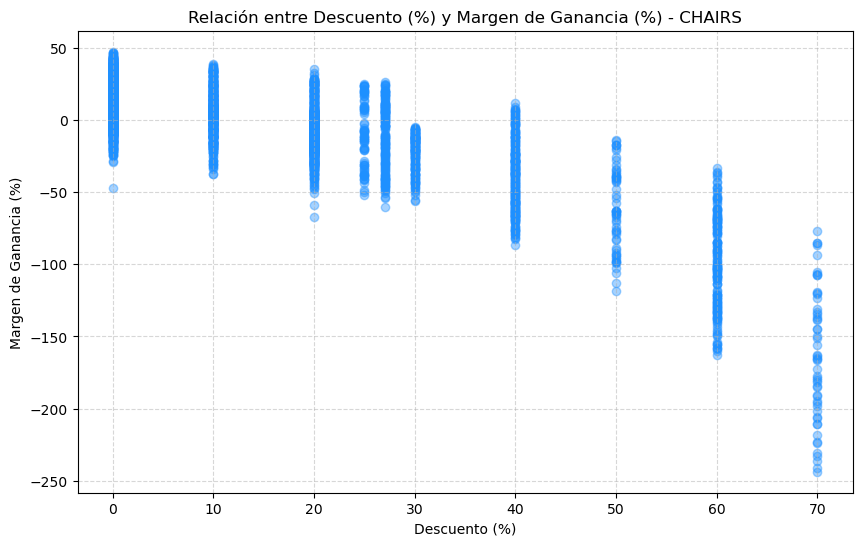

In [154]:
# Scatterplot relacion entre descuento y margen de ganancia de Chairs.

df_chairs = df_limpio[df_limpio['Sub-Category'] == 'Chairs']

plt.figure(figsize=(10,6))
plt.scatter(
    df_chairs['Discount']*100,
    df_chairs['Profit Margin'],
    alpha=0.4,
    color='dodgerblue'
)
plt.title('Relación entre Descuento (%) y Margen de Ganancia (%) - CHAIRS')
plt.xlabel('Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [155]:
descuentos_chairs = analisis_subcategorias_descuentos[analisis_subcategorias_descuentos['Sub-Category'] == 'Chairs']

descuentos_chairs.head(20)

,Sub-Category,Discount Group,Transacciones,Porcentaje,Net Profit,Sales,Quantity,Profit Margin
45,Chairs,0-5%,1336,38.91,81602.63,638797.60,4548,12.77
46,Chairs,5-10%,509,14.82,17760.56,306036.77,1977,5.80
47,Chairs,15-20%,670,19.51,-17775.47,264753.02,2456,-6.71
48,Chairs,20-25%,75,2.18,-3348.86,40593.78,318,-8.25
49,Chairs,25-30%,319,9.29,-23385.93,133918.64,1199,-17.46
50,Chairs,35-40%,244,7.11,-23558.57,58104.50,896,-40.55
51,Chairs,45-50%,60,1.75,-12420.70,19459.39,247,-63.83
52,Chairs,55-60%,167,4.86,-30478.07,31566.26,555,-96.55
53,Chairs,65-70%,54,1.57,-12252.67,8451.79,140,-144.97


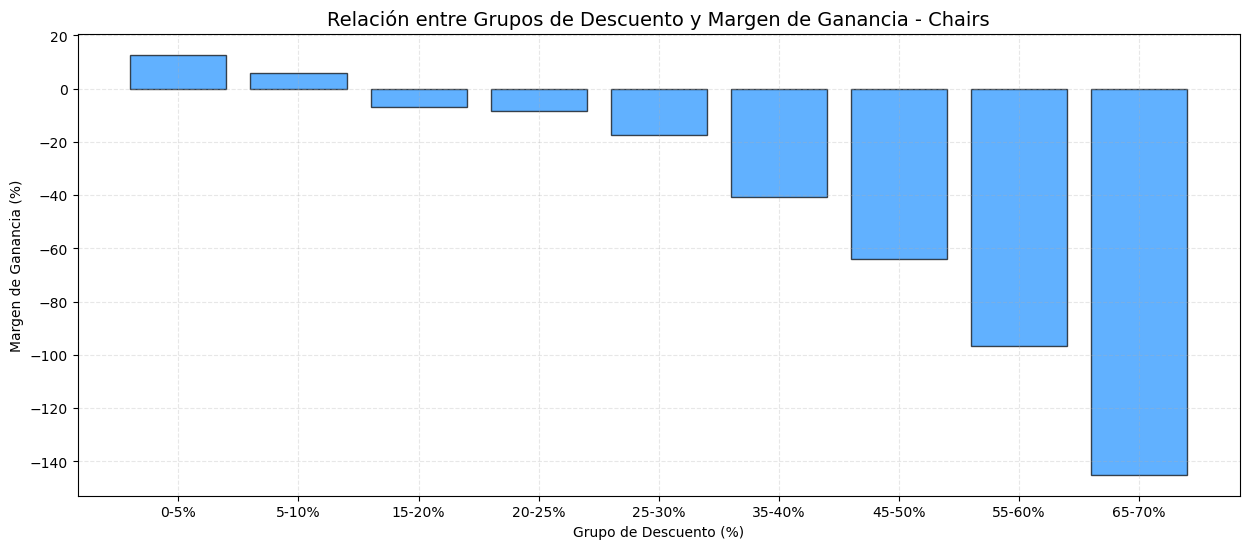

In [156]:
plt.figure(figsize=(15,6))
plt.bar(
    descuentos_chairs['Discount Group'],
    descuentos_chairs['Profit Margin'],
    alpha=0.7,
    color='dodgerblue',
    edgecolor='black'
)
plt.title('Relación entre Grupos de Descuento y Margen de Ganancia - Chairs', fontsize=14)
plt.xlabel('Grupo de Descuento (%)')
plt.ylabel('Margen de Ganancia (%)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_9196\136653898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descuentos_chairs['Rentabilidad'] = descuentos_chairs['Profit Margin'].apply(


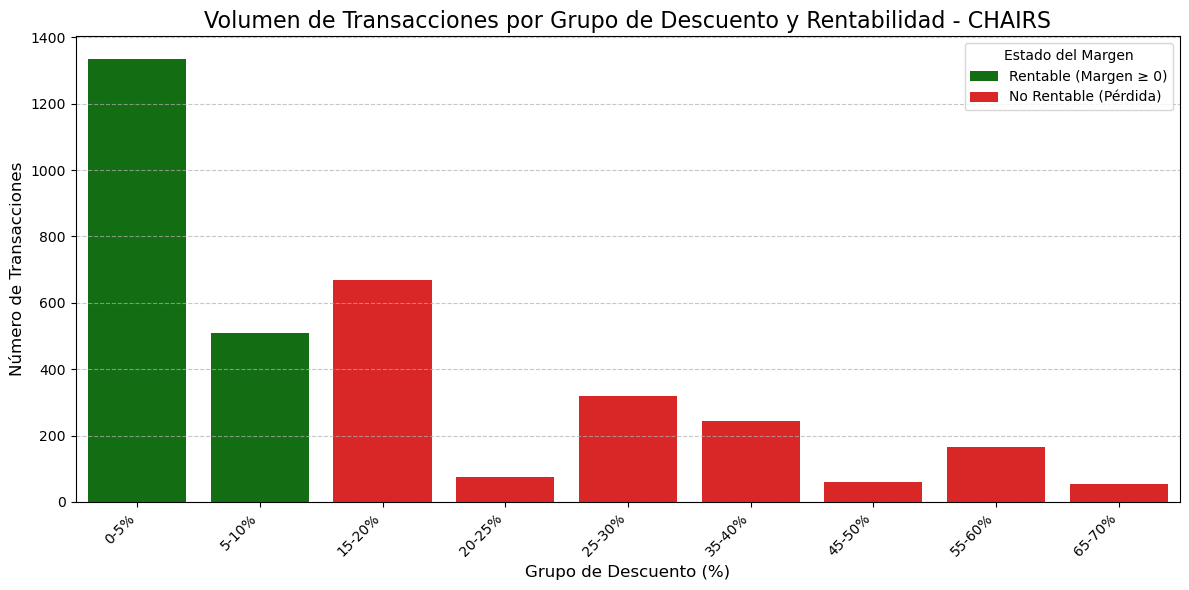

In [157]:
descuentos_chairs['Rentabilidad'] = descuentos_chairs['Profit Margin'].apply(
       lambda x: 'Rentable (Margen ≥ 0)' if x >= 0 else 'No Rentable (Pérdida)'
)

order = descuentos_chairs['Discount Group'].tolist()

plt.figure(figsize=(12, 6))

sns.barplot(
    data=descuentos_chairs,
    x='Discount Group',
    y='Transacciones',
    hue='Rentabilidad', 
    order=order,
    palette={'Rentable (Margen ≥ 0)': 'green', 'No Rentable (Pérdida)': 'red'},
    dodge=False,
    saturation=0.7
)

plt.title('Volumen de Transacciones por Grupo de Descuento y Rentabilidad - CHAIRS', fontsize=16)
plt.xlabel('Grupo de Descuento (%)', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Estado del Margen')
plt.tight_layout()
plt.show()

In [158]:
# Rentabilidad de las ventas de la Subcategoría "Chairs"

ventas_negativas_chairs = len(df_chairs[df_chairs['Profit Margin'] < 0])
ventas_positivas_chairs = len(df_chairs[df_chairs['Profit Margin'] >= 0])

print(f"Cantidad de transacciones totales de Tables: {len(df_chairs)}")
print(f"Transacciones con Margen Positivo: {ventas_positivas_chairs}")
print(f"Transacciones con Margen Negativo: {ventas_negativas_chairs}")

Cantidad de transacciones totales de Tables: 3434
Transacciones con Margen Positivo: 1702
Transacciones con Margen Negativo: 1732


### Análisis de la Subcategoría "Chairs"

**1. Potencial de Rentabilidad Desaprovechado**
* **Problema:** "Chairs" es la subcategoría con **mayor volumen de ventas ($1.5M)** y un margen general que está **casi en equilibrio (-1.59%)**. A pesar de su alta actividad, la subcategoría genera una pérdida de **-$23,857**.
* **Métrica Clave:** La pérdida por unidad es muy baja: **-$1.93** en promedio.
* **Acción Operativa:** Es la subcategoría más cercana a ser una fuente masiva de ganancias. La prioridad debe ser **eliminar las fugas de alto volumen** en descuentos moderados, ya que el margen de $-1.59\%$ puede recuperarse fácilmente.

**2. Descuento Moderado como Principal Fuga de Capital (Volumen)**
* **Hallazgo:** El rango **15-20% de descuento** es el principal punto de dolor. Genera la **mayor cantidad de transacciones no rentables** (casi 700), lo que la convierte en la principal fuente de fuga de capital por **volumen**.
* **Acción Prioritaria:** Establecer el **10% como el límite máximo de descuento permitido**. El grupo **5-10%** es el último umbral rentable. Cualquier descuento a partir del **15%** debe ser **detenido o reestructurado**, ya que es el principal responsable de la pérdida neta.

**3. Dos Tercios de las Ventas son Saludables**
* **Hallazgo:** Las ventas con descuentos bajos (**0-5%** y **5-10%**) representan el **53.73% del volumen total de transacciones** y son fuertemente rentables (Margenes de +12.77% y +5.80% respectivamente).
* **Acción Prioritaria:** Esta subcategoría tiene una **base de clientes y precios saludables** para más de la mitad de sus ventas. La estrategia debe ser **proteger este volumen a precio regular** y evitar la tentación de promover descuentos por encima del 10%.

**4. El Riesgo de Pérdida Extrema existe, pero es Manejable (Volumen)**
* **Hallazgo:** Los descuentos extremos (ej. **65-70%**) generan un margen de pérdida catastrófico (**-144.97%**), similar a "Tables" y "Machines".
* **Acción Operativa:** A diferencia de "Machines", donde este descuento tenía alto volumen, en "Chairs" es de **bajo volumen (1.57%)**. Aun así, **eliminar este descuento** es un *quick win* fácil para mitigar el riesgo y evitar arrastrar el margen general.

In [160]:
df_limpio.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Order Priority,Net Profit,Profit Margin,Shipping Time (days),Order Year,Order Month,Year-Month,Quarter,Year-Quarter,Discount Group
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,High,21.3844,9.633480,2,2014,11,2014-11,4,2014-Q4,0-5%
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Critical,-1212.3950,-32.684440,2,2014,2,2014-02,1,2014-Q1,5-10%
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Medium,4.4810,0.086587,1,2014,10,2014-10,4,2014-Q4,5-10%
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Medium,-1006.7000,-34.803683,2,2014,1,2014-01,1,2014-Q1,5-10%
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Critical,-591.5200,-20.879928,1,2014,11,2014-11,4,2014-Q4,0-5%


In [161]:
total_ventas = df_limpio['Sales'].sum()
total_ordenes = df_limpio['Order ID'].nunique()
ticket_promedio_total = total_ventas / total_ordenes    

print(f"Total Ventas: ${total_ventas:,.2f}")
print(f"Total Órdenes: {total_ordenes:,}")
print(f"Ticket Promedio Total: ${ticket_promedio_total:.2f}")

Total Ventas: $12,642,501.91
Total Órdenes: 25,728
Ticket Promedio Total: $491.39


In [162]:
ticket_global = df_limpio['Sales'].sum() / df_limpio['Order ID'].nunique()

ticket_global

491.39077696983827

In [163]:
# Calcular el Ticket Promedio por mes

ticket_promedio_mensual = df_limpio.groupby(['Order Year', 'Order Month']).agg({
    'Sales': 'sum',
    'Order ID': 'nunique'
}).reset_index()

ticket_promedio_mensual['Ticket_Promedio'] = (
    ticket_promedio_mensual['Sales'] / ticket_promedio_mensual['Order ID']
)

print("Top 10 meses con mayor Ticker Promedio:")
print(ticket_promedio_mensual[['Order Year', 'Order Month', 'Ticket_Promedio']].sort_values('Ticket_Promedio', ascending=False).head(10))

Top 10 meses con mayor Ticker Promedio:
    Order Year  Order Month  Ticket_Promedio
19        2013            8       579.623217
24        2014            1       577.350456
8         2012            9       551.526644
25        2014            2       546.534805
29        2014            6       546.170264
43        2015            8       539.102647
36        2015            1       536.152346
11        2012           12       535.690803
23        2013           12       533.528338
10        2012           11       528.682288


In [164]:
# Ticket Promedio por Categoría

ticket_por_categoria = df_limpio.groupby('Category').agg({
    'Sales': 'sum',
    'Order ID': 'nunique'
}).reset_index()

ticket_por_categoria['Ticket_Promedio'] = (ticket_por_categoria['Sales'] / ticket_por_categoria['Order ID'])

print(ticket_por_categoria[['Category', 'Ticket_Promedio']].sort_values('Ticket_Promedio', ascending=False))

          Category  Ticket_Promedio
2       Technology       562.951768
0        Furniture       499.933337
1  Office Supplies       194.589628


In [165]:
# Ticket Promedio por Segmento de Cliente

ticket_por_segmento = df_limpio.groupby('Segment').agg({
    'Sales': 'sum',
    'Order ID': 'nunique'
}).reset_index()

ticket_por_segmento['Ticket_Promedio'] = (ticket_por_segmento['Sales'] / ticket_por_segmento['Order ID'])

print(ticket_por_segmento[['Segment', 'Ticket_Promedio']].sort_values('Ticket_Promedio', ascending=False))

       Segment  Ticket_Promedio
1    Corporate       495.170575
2  Home Office       490.102901
0     Consumer       489.650848


In [166]:
df_limpio.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Net Profit',
       'Profit Margin', 'Shipping Time (days)', 'Order Year',
       'Order Month', 'Year-Month', 'Quarter', 'Year-Quarter',
       'Discount Group'], dtype=object)

In [167]:
top_10_clientes = df_limpio.groupby('Customer Name')['Sales'].sum().round(2).sort_values(ascending=False).head(10)

print("TOP 10 CLIENTES CON MAS COMPRAS:")
top_10_clientes

TOP 10 CLIENTES CON MAS COMPRAS:


Customer Name
Tom Ashbrook          40488.07
Tamara Chand          37457.33
Greg Tran             35550.95
Christopher Conant    35187.08
Sean Miller           35170.93
Bart Watters          32310.45
Natalie Fritzler      31781.26
Fred Hopkins          30400.67
Jane Waco             30288.45
Hunter Lopez          30243.57
Name: Sales, dtype: float64

In [168]:
top_10_clientes_margen = df_limpio.groupby('Customer Name')['Profit Margin'].mean().round(2).sort_values(ascending=False).head(10)

print("TOP 10 CLIENTES MAS RENTABLES:")
top_10_clientes_margen 

TOP 10 CLIENTES MAS RENTABLES:


Customer Name
Brian Dahlen        14.35
Rick Duston         12.58
Bill Shonely        12.07
Julie Prescott      11.72
Nora Paige          10.38
Yoseph Carroll      10.25
Sandra Glassco       9.98
Rob Dowd             9.83
Katherine Ducich     9.80
Nat Gilpin           9.28
Name: Profit Margin, dtype: float64

In [169]:
# Vamos a clasificar los clientes en tres grupos segun el total de ventas($) : 1) Top ; 2) Medio ; 3) Bajo.

ventas_clientes = df_limpio.groupby('Customer ID')['Sales'].sum().reset_index()

p80 = ventas_clientes['Sales'].quantile(0.80)
p20 = ventas_clientes['Sales'].quantile(0.20)

def segmentar_cliente(venta):
    if venta >= p80:
        return 'Top'
    elif venta <= p20:
        return 'Bajo'
    else:
        return 'Medio'

ventas_clientes['Tipo Cliente'] = ventas_clientes['Sales'].apply(segmentar_cliente)

ventas_clientes.head()

,Customer ID,Sales,Tipo Cliente
0,AA-10315102,544.656,Medio
1,AA-10315120,2713.410,Top
2,AA-10315139,2955.798,Top
3,AA-103151402,4780.552,Top
4,AA-103151404,753.508,Medio


In [170]:
clientes_tipo = ventas_clientes.groupby('Tipo Cliente')['Customer ID'].count().reset_index()

clientes_tipo

,Tipo Cliente,Customer ID
0,Bajo,3483
1,Medio,10449
2,Top,3483


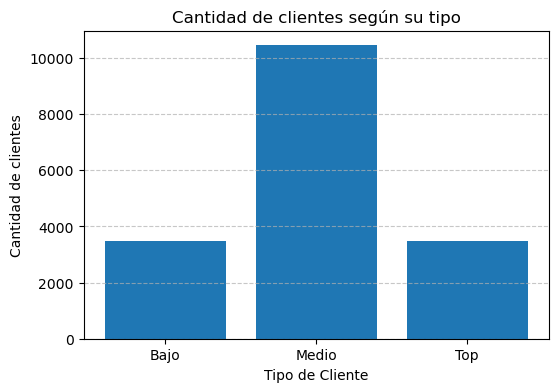

In [171]:
plt.figure(figsize=(6,4))
plt.bar(clientes_tipo['Tipo Cliente'], clientes_tipo['Customer ID'])
plt.title('Cantidad de clientes según su tipo')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [172]:
# Vamos a calcular porcentaje de ventas por Tipo Cliente.

ventas_tipo_cliente = ventas_clientes.groupby('Tipo Cliente')['Sales'].sum().reset_index()
total_ventas = ventas_tipo_cliente['Sales'].sum()
ventas_tipo_cliente['Porcentaje'] = ((ventas_tipo_cliente['Sales'] / total_ventas) * 100).round(2)

ventas_tipo_cliente

,Tipo Cliente,Sales,Porcentaje
0,Bajo,1.190807e+05,0.94
1,Medio,4.318374e+06,34.16
2,Top,8.205047e+06,64.90


In [173]:
ventas_clientes_filtrado = ventas_clientes[['Customer ID', 'Tipo Cliente']]

df_limpio = pd.merge(df_limpio, ventas_clientes_filtrado, how='left', on='Customer ID')

df_limpio.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Net Profit,Profit Margin,Shipping Time (days),Order Year,Order Month,Year-Month,Quarter,Year-Quarter,Discount Group,Tipo Cliente
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,21.3844,9.633480,2,2014,11,2014-11,4,2014-Q4,0-5%,Medio
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,-1212.3950,-32.684440,2,2014,2,2014-02,1,2014-Q1,5-10%,Top
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,4.4810,0.086587,1,2014,10,2014-10,4,2014-Q4,5-10%,Top
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,-1006.7000,-34.803683,2,2014,1,2014-01,1,2014-Q1,5-10%,Top
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,-591.5200,-20.879928,1,2014,11,2014-11,4,2014-Q4,0-5%,Top


In [174]:
# Calculamos cantidad de transacciones de los clientes TOP

df_top = df_limpio[df_limpio['Tipo Cliente'] == 'Top'].copy()

print(f"Total de transacciones de clientes TOP: {len(df_top)}")

Total de transacciones de clientes TOP: 18836


In [175]:
# Calculamos % de ventas de clientes TOP en cada categoria

ventas_por_categoria_top = df_top.groupby('Category')['Sales'].sum().reset_index()

total_ventas_top = ventas_por_categoria_top['Sales'].sum()

ventas_por_categoria_top['Contribucion %'] = (
    (ventas_por_categoria_top['Sales'] / total_ventas_top) * 100
).round(2)

ranking_top_compras = ventas_por_categoria_top.sort_values(
    by='Contribucion %', 
    ascending=False
)

print(f" Ventas Totales Clientes Tipo TOP: {total_ventas_top.round(2)}")
print("\nRanking de Categorías de Productos más Comprados por Clientes 'Top':")
print(ranking_top_compras[['Category', 'Contribucion %']])

 Ventas Totales Clientes Tipo TOP: 8205046.78

Ranking de Categorías de Productos más Comprados por Clientes 'Top':
          Category  Contribucion %
2       Technology           40.14
0        Furniture           34.36
1  Office Supplies           25.50


In [176]:
# Calculamos cantidad de transacciones de los clientes MEDIO

df_medio = df_limpio[df_limpio['Tipo Cliente'] == 'Medio'].copy()

print(f"Total de transacciones de clientes TOP: {len(df_medio)}")

Total de transacciones de clientes TOP: 28153


In [177]:
# Calculamos % de ventas de clientes MEDIO en cada categoria

ventas_por_categoria_medio = df_medio.groupby('Category')['Sales'].sum().reset_index()

total_ventas_medio = ventas_por_categoria_medio['Sales'].sum()

ventas_por_categoria_medio['Contribucion %'] = (
    (ventas_por_categoria_medio['Sales'] / total_ventas_medio) * 100
).round(2)

ranking_medio_compras = ventas_por_categoria_medio.sort_values(
    by='Contribucion %', 
    ascending=False
)

print(f" Ventas Totales Clientes Tipo MEDIO: {total_ventas_medio.round(2)}")
print("\nRanking de Categorías de Productos más Comprados por Clientes 'Medio':")
print(ranking_medio_compras[['Category', 'Contribucion %']])

 Ventas Totales Clientes Tipo MEDIO: 4318374.39

Ranking de Categorías de Productos más Comprados por Clientes 'Medio':
          Category  Contribucion %
1  Office Supplies           37.03
2       Technology           33.38
0        Furniture           29.59


In [178]:
# Calculamos cantidad de transacciones de los clientes BAJO

df_bajo = df_limpio[df_limpio['Tipo Cliente'] == 'Bajo'].copy()

print(f"Total de transacciones de clientes BAJO: {len(df_bajo)}")

Total de transacciones de clientes BAJO: 4301


In [179]:
# Calculamos % de ventas de clientes BAJO en cada categoria

ventas_por_categoria_bajo = df_bajo.groupby('Category')['Sales'].sum().reset_index()

total_ventas_bajo = ventas_por_categoria_bajo['Sales'].sum()

ventas_por_categoria_bajo['Contribucion %'] = (
    (ventas_por_categoria_bajo['Sales'] / total_ventas_bajo) * 100
).round(2)

ranking_bajo_compras = ventas_por_categoria_bajo.sort_values(
    by='Contribucion %', 
    ascending=False
)

print(f" Ventas Totales Clientes Tipo BAJO: {total_ventas_bajo.round(2)}")
print("\nRanking de Categorías de Productos más Comprados por Clientes 'Bajo':")
print(ranking_bajo_compras[['Category', 'Contribucion %']])

 Ventas Totales Clientes Tipo BAJO: 119080.74

Ranking de Categorías de Productos más Comprados por Clientes 'Bajo':
          Category  Contribucion %
1  Office Supplies           80.87
0        Furniture           11.09
2       Technology            8.04


In [180]:
df_limpio.groupby('Tipo Cliente')['Sales'].sum().round(2).reset_index()

,Tipo Cliente,Sales
0,Bajo,119080.74
1,Medio,4318374.39
2,Top,8205046.78


In [181]:
clientes_profit = df_limpio.groupby('Tipo Cliente').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Net Profit', 'sum')
).round(2).reset_index()

clientes_profit['Profit Margin'] = ((clientes_profit['total_profit'] / clientes_profit['total_sales']) * 100).round(2)

clientes_profit.head()

,Tipo Cliente,total_sales,total_profit,Profit Margin
0,Bajo,119080.74,-21668.02,-18.20
1,Medio,4318374.39,-194597.54,-4.51
2,Top,8205046.78,325637.15,3.97


In [ ]:
# CLIENTES NO RENTABLES -> calcular % de clientes no rentables sobre total de clientes.

clientes_no_rentables = df_limpio[df_limpio['Profit Margin'] < 0].groupby('Customer ID').agg({
    'Sales': 'sum',
    'Net Profit': 'sum',
    'Profit Margin': 'mean',
    'Order ID': 'count'
}).sort_values('Net Profit')

clientes_no_rentables

,Sales,Net Profit,Profit Margin,Order ID
Customer ID,,,,
CS-125051406,4956.573,-7409.6400,-117.558799,2
DM-3345134,4638.720,-5526.9600,-119.522302,5
GT-146351408,8167.420,-4532.6294,-33.538646,2
LF-171851402,2680.692,-4022.8290,-136.294911,7
SR-204251404,2592.573,-3558.2422,-102.003784,4
...,...,...,...,...
KT-6465137,6.840,-0.0100,-0.146199,1
AI-1085539,14.100,-0.0090,-0.063830,1
CK-125951408,26.850,-0.0085,-0.031657,1


In [ ]:
# Analizar la rentabilidad por "mercado" (?) -> capaz se puede sumar algo corto al sector de los paises.


rentabilidad_mercado = df_limpio.groupby('Market')['Profit Margin'].mean().round(2).reset_index()

rentabilidad_mercado.head(10)

,Market,Profit Margin
0,Africa,-27.71
1,Asia Pacific,-13.87
2,Europe,0.99
3,LATAM,-5.60
4,USCA,-1.54
